In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()
import xlrd
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
pd.options.display.max_columns=100
from IPython.core.pylabtools import figsize
import warnings
warnings.filterwarnings('ignore')

# We  study the data of generator only

In [2]:
Clusters=pd.read_excel("All cluster_translate.xlsx",sheetname="Gen Only")
Clusters.head()

Cluster T number      IHS ID              SITE Name GE N°  \
0   BANYO    T0222  IHS_NGD_231  SAMBOLABO [ T0222  ]  GE_1   
1   BANYO    T0222  IHS_NGD_231  SAMBOLABO [ T0222  ]  GE_1   
2   BANYO  OST_092  IHS_NGD_096  TARAM-FH [ OST_092 ]  GE_1   
3   BANYO    T0812  IHS_NGD_092   DARASALAM [ T0812 ]  GE_1   
4   BANYO    T0812  IHS_NGD_092   DARASALAM [ T0812 ]  GE_1   

   ACCESS TICKET NUMBER EFFECTIVE DATE OF VISIT PREVIOUS DATE OF VISIT  \
0              226379.0              2018-01-25             2017-12-29   
1              200000.0              2017-12-29             2017-12-20   
2              250443.0              2018-03-24             2018-03-14   
3              250440.0              2018-03-24             2018-03-16   
4              250440.0              2018-03-16             2018-03-07   

   NUMBER OF DAYS  TYPE OF GENERATOR GENERATOR 1 CAPACITY (KVA)  \
0              27  EARTH TECHNOLOGIE                         10   
1               9  EARTH TECHNOLOGIE                         10   
2              10            YOUNESS                         20   
3               8            YOUNESS                         20   
4               9            YOUNESS                         20   

   CURRENT HOUR METER GE1  PREVIOUS HOUR METER G1 SERVICE (YES/NO)  \
0                    1021                     624              YES   
1                     624                     409                0   
2                   11485                   11243              YES   
3                   15952                   15761              YES   
4                   15761                   15545              YES   

   OIL REMOVED  OIL ADDED GEN 1\nAIR FILTER\nReferences  \
0          4.0        5.0                             0   
1          0.0        0.0                             0   
2          9.0       10.0                             0   
3          9.0       10.0                             0   
4          9.0       10.0                             0   

  GEN 1\nOIL FILTER\nReferences GEN 1\nFUEL FILTER\nReferences  \
0                             0                              0   
1                             0                              0   
2                       2654403                       26561117   
3                        254403                       26561117   
4                        254403                       26561117   

  GEN 1\nFAN BELT\nReferences  PREVIOUS FUEL QTE  QTE FUEL FOUND  \
0                           0              780.0           124.0   
1                           0              700.0           380.0   
2                           0              761.0           152.0   
3                           0              810.0           314.0   
4                           0              798.0           260.0   

   QTE FUEL ADDED  TOTALE QTE LEFT  CONSUMPTION HIS  RUNNING TIME  \
0           400.0            524.0            674.9         397.0   
1           400.0            780.0            365.5         215.0   
2           600.0            752.0            580.8         242.0   
3           500.0            814.0            458.4         191.0   
4           550.0            810.0            518.4         216.0   

   CONSUMPTION RATE TYPE OF PASSAGE  ARRIVAL TIME ON THE SITE   \
0               1.7    AUD, PM & REF                  10:00:00   
1               1.7         PM & REF                  14:00:00   
2               2.4    AUD, PM & REF                  09:00:00   
3               2.4    AUD, PM & REF                  12:30:00   
4               2.4         PM & REF                  12:30:00   

  DEPARTURE TIME ON THE SITE POWER TYPE  TX Indoor / Outdoor  \
0                   13:20:00    Gen_Only                   0   
1                   16:00:00    Gen_Only                   0   
2                   11:00:00    Gen Only              INDOOR   
3                   14:30:00    Gen Only             OUTDOOR   
4                   14:30:00    Gen Only             OUTDOOR 

In [3]:
Clusters.shape[0]

2784

In [4]:
Clusters['CONSUMPTION HIS'].sum()

797899.7899999984

In [5]:
len(list(set(Clusters['SITE Name'])))

163

In [6]:
#Let's see the column data types and non-missing values
Clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2784 entries, 0 to 2783
Data columns (total 38 columns):
Cluster                         2784 non-null object
T number                        2784 non-null object
IHS ID                          2784 non-null object
SITE Name                       2784 non-null object
GE N°                           2762 non-null object
ACCESS TICKET NUMBER            2762 non-null float64
EFFECTIVE DATE OF VISIT         2784 non-null datetime64[ns]
PREVIOUS DATE OF VISIT          2784 non-null datetime64[ns]
NUMBER OF DAYS                  2784 non-null int64
TYPE OF GENERATOR               2784 non-null object
GENERATOR 1 CAPACITY (KVA)      2784 non-null object
CURRENT HOUR METER GE1          2784 non-null int64
PREVIOUS HOUR METER G1          2784 non-null int64
SERVICE (YES/NO)                1583 non-null object
OIL REMOVED                     2007 non-null float64
OIL ADDED                       2014 non-null float64
GEN 1
AIR FILTER
References  

In [7]:
Clusters.describe()

ACCESS TICKET NUMBER  NUMBER OF DAYS  CURRENT HOUR METER GE1  \
count           2762.000000     2784.000000             2784.000000   
mean          212918.004345        8.012931            11874.531968   
std            23499.235088        4.030406             8700.880888   
min                0.000000        0.000000                0.000000   
25%           194386.000000        5.000000             4231.500000   
50%           214017.500000        9.000000            10405.500000   
75%           232219.000000       10.000000            18058.750000   
max           279131.000000       49.000000            39762.000000   

       PREVIOUS HOUR METER G1  OIL REMOVED    OIL ADDED  PREVIOUS FUEL QTE  \
count             2784.000000  2007.000000  2014.000000        2751.000000   
mean             11718.689296     2.988042     3.797418         594.245409   
std               8702.363151     3.026446     3.566510         313.672751   
min                  0.000000     0.000000     0.000000           0.000000   
25%               4077.000000     0.000000     0.000000         410.000000   
50%              10232.500000     2.000000     3.000000         552.000000   
75%              17898.250000     5.000000     6.000000         715.000000   
max              39559.000000    20.000000    20.000000        2530.000000   

       QTE FUEL FOUND  QTE FUEL ADDED  TOTALE QTE LEFT  CONSUMPTION HIS  \
count     2751.000000     2751.000000      2781.000000      2755.000000   
mean       278.415180      318.499455       590.914117       289.618799   
std        261.245065      212.839757       319.257432       182.192338   
min          0.000000        0.000000         0.000000         0.000000   
25%        116.000000      200.000000       410.000000       159.050000   
50%        218.000000      300.000000       550.000000       266.000000   
75%        366.000000      500.000000       715.000000       414.640000   
max       2222.000000     1200.000000      2530.000000      1315.600000   

       RUNNING TIME  CONSUMPTION RATE     Eneo Index  Total DC (Amps)  \
count   2773.000000       2780.000000    1365.000000      2701.000000   
mean     162.727010          1.865129     222.898901        48.775635   
std       96.694488          0.578631    3860.998751        40.197544   
min        0.000000          0.000000       0.000000         0.000000   
25%       90.000000          1.570000       0.000000        29.000000   
50%      168.000000          1.900000       0.000000        45.000000   
75%      239.000000          2.400000       0.000000        65.000000   
max      816.000000          3.500000  134024.000000       911.000000   

        Ph2 (Amps)   Ph3 (Amps)  
count  2052.000000  1815.000000  
mean      4.821832     4.268815  
std       6.572019     5.535426  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       3.000000     0.000000  
75%       9.000000     8.000000  
max      80.000000    52.000000

# Missing Values
We are going to check the percentage of missing value in each column. So we  define the following function that gives us a dataframe to preview the missing values and the % of missing values in each column

In [8]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_values_table(Clusters)

Your selected dataframe has 38 columns.
There are 26 columns that have missing values.


Missing Values  % of Total Values
Eneo Index                                1419               51.0
Eneo Meter Number                         1405               50.5
GEN 1\nFAN BELT\nReferences               1369               49.2
GEN 1\nAIR FILTER\nReferences             1328               47.7
SERVICE (YES/NO)                          1201               43.1
GEN 1\nFUEL FILTER\nReferences            1112               39.9
GEN 1\nOIL FILTER\nReferences             1073               38.5
Ph3 (Amps)                                 969               34.8
OIL REMOVED                                777               27.9
OIL ADDED                                  770               27.7
Ph2 (Amps)                                 732               26.3
Ph1 (Amps)                                 685               24.6
Total DC (Amps)                             83                3.0
ARRIVAL TIME ON THE SITE                    70                2.5
DEPARTURE TIME ON THE SITE                  69                2.5
TYPE OF PASSAGE                             49                1.8
QTE FUEL ADDED                              33                1.2
QTE FUEL FOUND                              33                1.2
PREVIOUS FUEL QTE                           33                1.2
CONSUMPTION HIS                             29                1.0
TX Indoor / Outdoor                         28                1.0
ACCESS TICKET NUMBER                        22                0.8
GE N°                                       22                0.8
RUNNING TIME                                11                0.4
CONSUMPTION RATE                             4                0.1
TOTALE QTE LEFT                              3                0.1

In [10]:
# We pick the columns with > 50% missing
missing_df = missing_values_table(Clusters);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 38 columns.
There are 26 columns that have missing values.
We will remove 2 columns.


In [11]:
# Drop the columns
Clusters =Clusters.drop(list(missing_columns), axis=1)

# Data visualizations
* Histograms

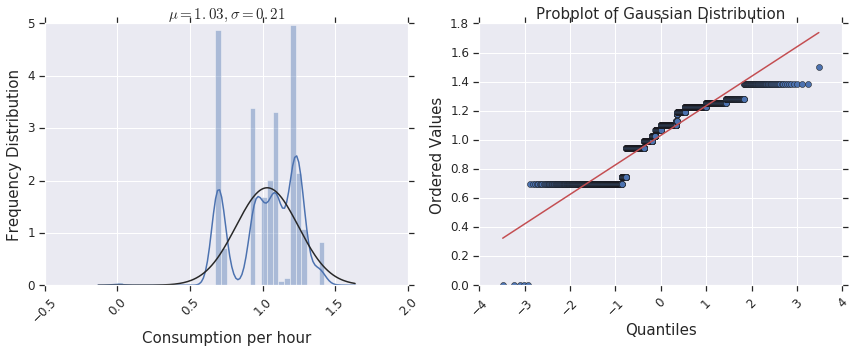

In [12]:
cc = Clusters['CONSUMPTION RATE'].dropna()
kk = np.log1p(cc.copy()) #log1p()
import matplotlib.ticker as mtick
from scipy import stats
from scipy.stats import skew,norm
import seaborn; seaborn.set()
%matplotlib inline

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
# kernel density plotsome scatter
ax1 = sns.distplot(kk,fit=norm, kde=True, norm_hist=True);
(mu, sigma) = norm.fit(kk);
ax1.set_title(r'$\mu = %0.2f, \sigma = %0.2f$' %(mu, sigma), fontsize=15)
ax1.set_ylabel(r'Frequency Distribution',fontsize=15)
#ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax1.set_xlabel(r'Consumption per hour',fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=None)
#plt.text(x=500, y= 2.5e-03, s=r'$\rm skew = %0.2f, kurt = %0.2f$' %(kk.skew(),
#                                                               kk.kurt()), fontdict=None, withdash=False, fontsize=15)

ax = fig.add_subplot(122)
res = stats.probplot(kk, plot=plt)
ax.set_title(r'Probplot of Gaussian Distribution',fontsize=15)
ax.set_ylabel(r'Ordered Values', fontsize=15)
ax.set_xlabel(r'Quantiles', fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=None)
plt.tight_layout()


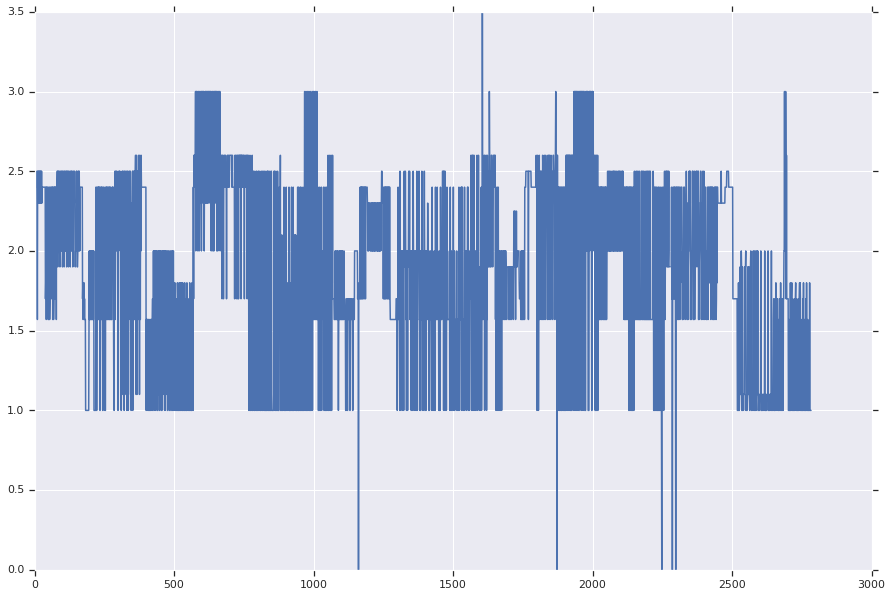

In [13]:
plt.figure(figsize=(15,10))
plt.plot(Clusters['CONSUMPTION RATE'])

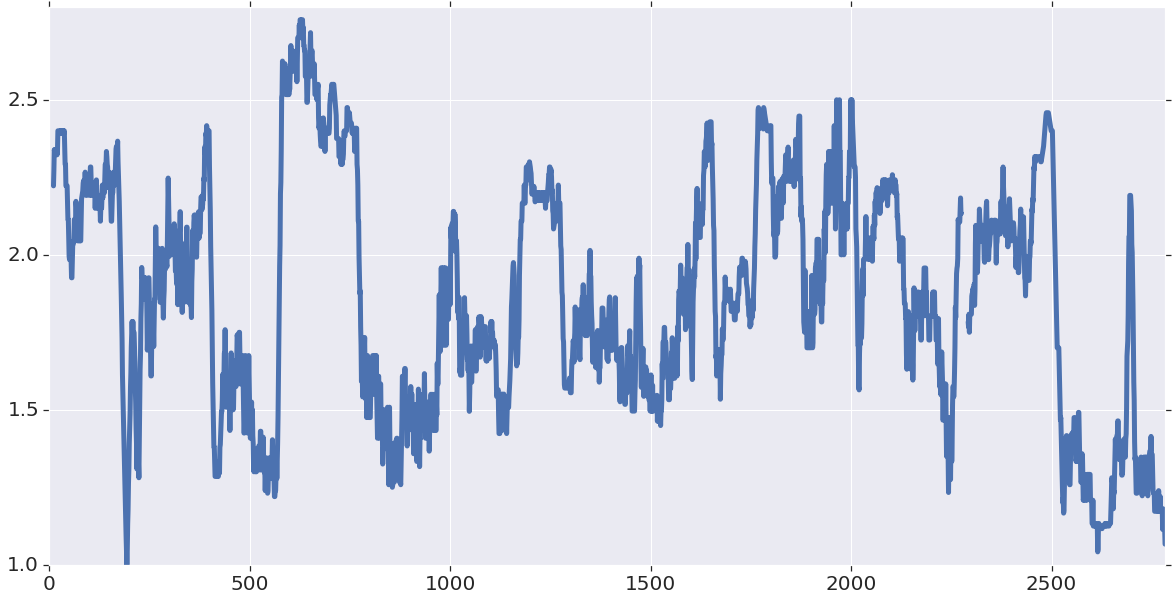

In [14]:
# #  RUNNING TIME
# plt.scatter(Clusters[' RUNNING TIME'],Clusters['CONSUMPTION RATE'])
PI = Clusters['CONSUMPTION RATE']
PI.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
#plt.xlabel('', fontsize=20);
#plt.title('')

(array([ 0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6]),
 <a list of 10 Text yticklabel objects>)

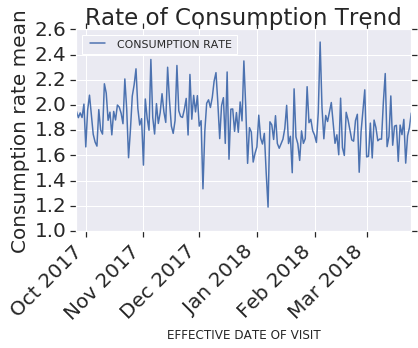

In [15]:
#plt.figure(figsize=(17,12))
#plt.subplot(121)
Clusters.pivot_table('CONSUMPTION RATE', index='EFFECTIVE DATE OF VISIT', aggfunc='mean').plot()
plt.ylabel('Consumption rate mean',size=20)
plt.rcParams['axes.labelsize'] =17
plt.title("Rate of Consumption Trend",size=23)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
#plt.subplot(122)

(array([ 0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6]),
 <a list of 10 Text yticklabel objects>)

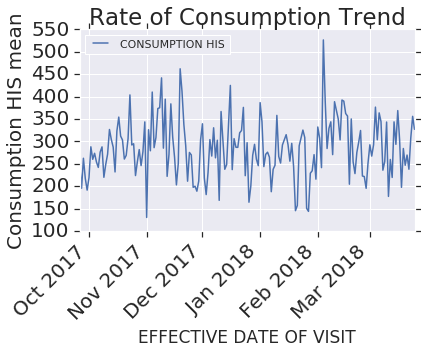

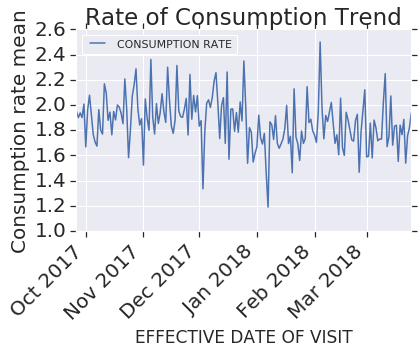

In [16]:
#plt.subplot(121)
Clusters.pivot_table('CONSUMPTION HIS', index='EFFECTIVE DATE OF VISIT', aggfunc='mean').plot()
plt.ylabel('Consumption HIS mean',size=20)
plt.rcParams['axes.labelsize'] =17
plt.title("Rate of Consumption Trend",size=23)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
#plt.subplot(122)
Clusters.pivot_table('CONSUMPTION RATE', index='EFFECTIVE DATE OF VISIT', aggfunc='mean').plot()
plt.ylabel('Consumption rate mean',size=20)
plt.rcParams['axes.labelsize'] =17
plt.title("Rate of Consumption Trend",size=23)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)

# From the above graph observe that the rate of consumption have influence consumption HIS

(array([  50.,  100.,  150.,  200.,  250.,  300.]),
 <a list of 6 Text yticklabel objects>)

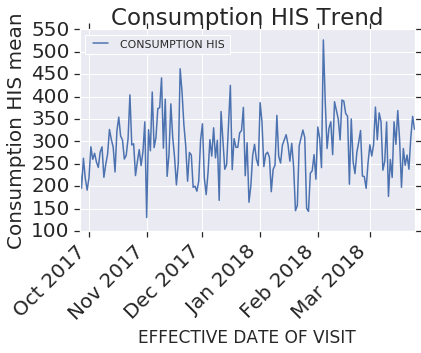

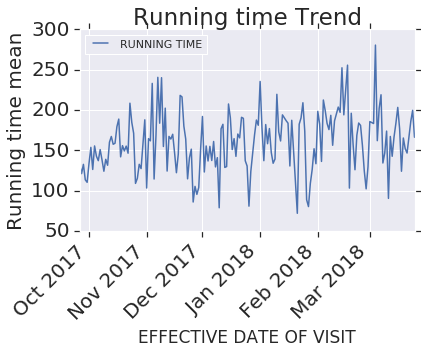

In [17]:
Clusters.pivot_table('CONSUMPTION HIS', index='EFFECTIVE DATE OF VISIT', aggfunc='mean').plot()
plt.ylabel('Consumption HIS mean',size=20)
plt.rcParams['axes.labelsize'] =17
plt.title("Consumption HIS Trend",size=23)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
Clusters.pivot_table('RUNNING TIME', index='EFFECTIVE DATE OF VISIT', aggfunc='mean').plot()
plt.ylabel('Running time mean',size=20)
plt.rcParams['axes.labelsize'] =17
plt.title("Running time Trend",size=23)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)

# From this two figure we can we realise that each peak in running imply  a peak hence the running time directly impact consumption HIS

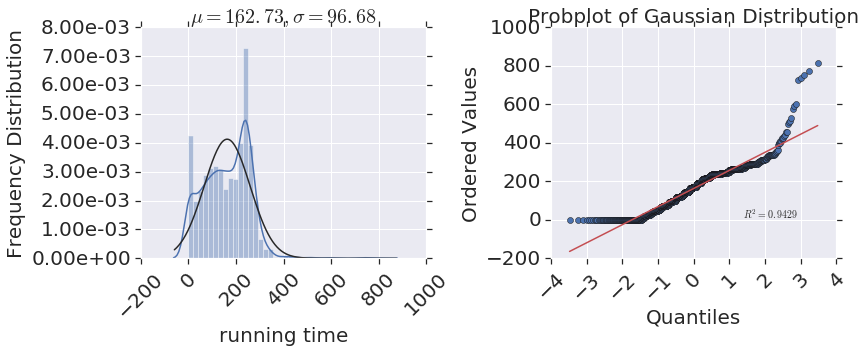

In [18]:
kk = Clusters['RUNNING TIME'].dropna()
import matplotlib.ticker as mtick
from scipy import stats
from scipy.stats import skew,norm
import seaborn; seaborn.set()
%matplotlib inline

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
# kernel density plotsome scatter
ax1 = sns.distplot(kk,fit=norm, kde=True, norm_hist=True);
(mu, sigma) = norm.fit(kk);
ax1.set_title(r'$\mu = %0.2f, \sigma = %0.2f$' %(mu, sigma), fontsize=20)
ax1.set_ylabel(r'Frequency Distribution',fontsize=20)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax1.set_xlabel(r'running time',fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
# plt.text(x=500, y= 2.5e-03, s=r'$\rm skew = %0.2f, kurt = %0.2f$' %(kk.skew(),
#                                                                 kk.kurt()), fontdict=None, withdash=False, fontsize=15)

ax = fig.add_subplot(122)
res = stats.probplot(kk, plot=plt,rvalue=True)
ax.set_title(r'Probplot of Gaussian Distribution',fontsize=20)
ax.set_ylabel(r'Ordered Values', fontsize=20)
ax.set_xlabel(r'Quantiles', fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
plt.tight_layout()

Remove the zero in the data because the are not helping

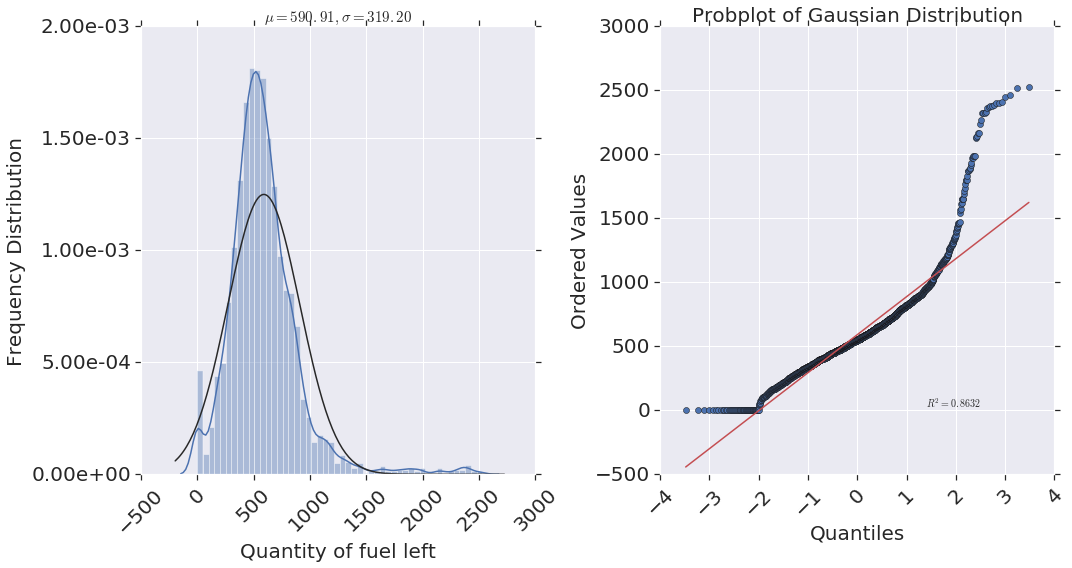

In [19]:
kk = Clusters['TOTALE QTE LEFT'].dropna()
import matplotlib.ticker as mtick
from scipy import stats
from scipy.stats import skew,norm
import seaborn; seaborn.set()
%matplotlib inline
#plt.subplot(2,2,3)
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)
# kernel density plotsome scatter
ax1 = sns.distplot(kk,fit=norm, kde=True, norm_hist=True);
(mu, sigma) = norm.fit(kk);
ax1.set_title(r'$\mu = %0.2f, \sigma = %0.2f$' %(mu, sigma), fontsize=15)
ax1.set_ylabel(r'Frequency Distribution',fontsize=20)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax1.set_xlabel(r'Quantity of fuel left',fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
# plt.text(x=500, y= 2.5e-03, s=r'$\rm skew = %0.2f, kurt = %0.2f$' %(kk.skew(),
#                                                                 kk.kurt()), fontdict=None, withdash=False, fontsize=15)
#plt.subplot(2,2,4)
ax = fig.add_subplot(122)
res = stats.probplot(kk, plot=plt,rvalue=True)
ax.set_title(r'Probplot of Gaussian Distribution',fontsize=20)
ax.set_ylabel(r'Ordered Values', fontsize=20)
ax.set_xlabel(r'Quantiles', fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
plt.tight_layout()




The distribution of the total quantity of fuel left seems to bo normaly distributed. But to some this feature containt some data that are not import for the study this may be due to some error  

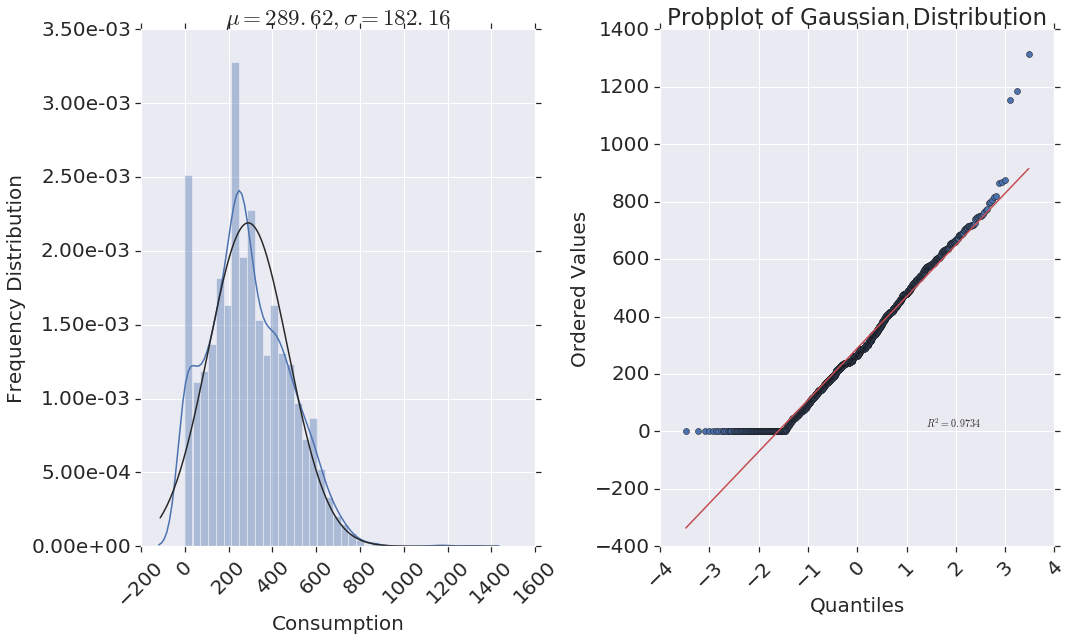

In [20]:


kk = Clusters['CONSUMPTION HIS'].dropna()
import matplotlib.ticker as mtick
from scipy import stats
from scipy.stats import skew,norm
import seaborn; seaborn.set()
%matplotlib inline

fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(121)
# kernel density plotsome scatter
ax1 = sns.distplot(kk,fit=norm, kde=True, norm_hist=True);
(mu, sigma) = norm.fit(kk);
ax1.set_title(r'$\mu = %0.2f, \sigma = %0.2f$' %(mu, sigma), fontsize=23)
ax1.set_ylabel(r'Frequency Distribution',fontsize=20)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax1.set_xlabel(r'Consumption',fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
#plt.text(x=500, y= 2.5e-03, s=r'$\rm skew = %0.2f, kurt = %0.2f$' %(kk.skew(),
 #                                                               kk.kurt()), fontdict=None, withdash=False, fontsize=15)

ax = fig.add_subplot(122)
res = stats.probplot(kk, plot=plt,rvalue=True)
ax.set_title(r'Probplot of Gaussian Distribution',fontsize=23)
ax.set_ylabel(r'Ordered Values', fontsize=20)
ax.set_xlabel(r'Quantiles', fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
plt.tight_layout()


Consumption IHS containt three values that are very far from others this need to examine see the origin or cause of this 

# Time series

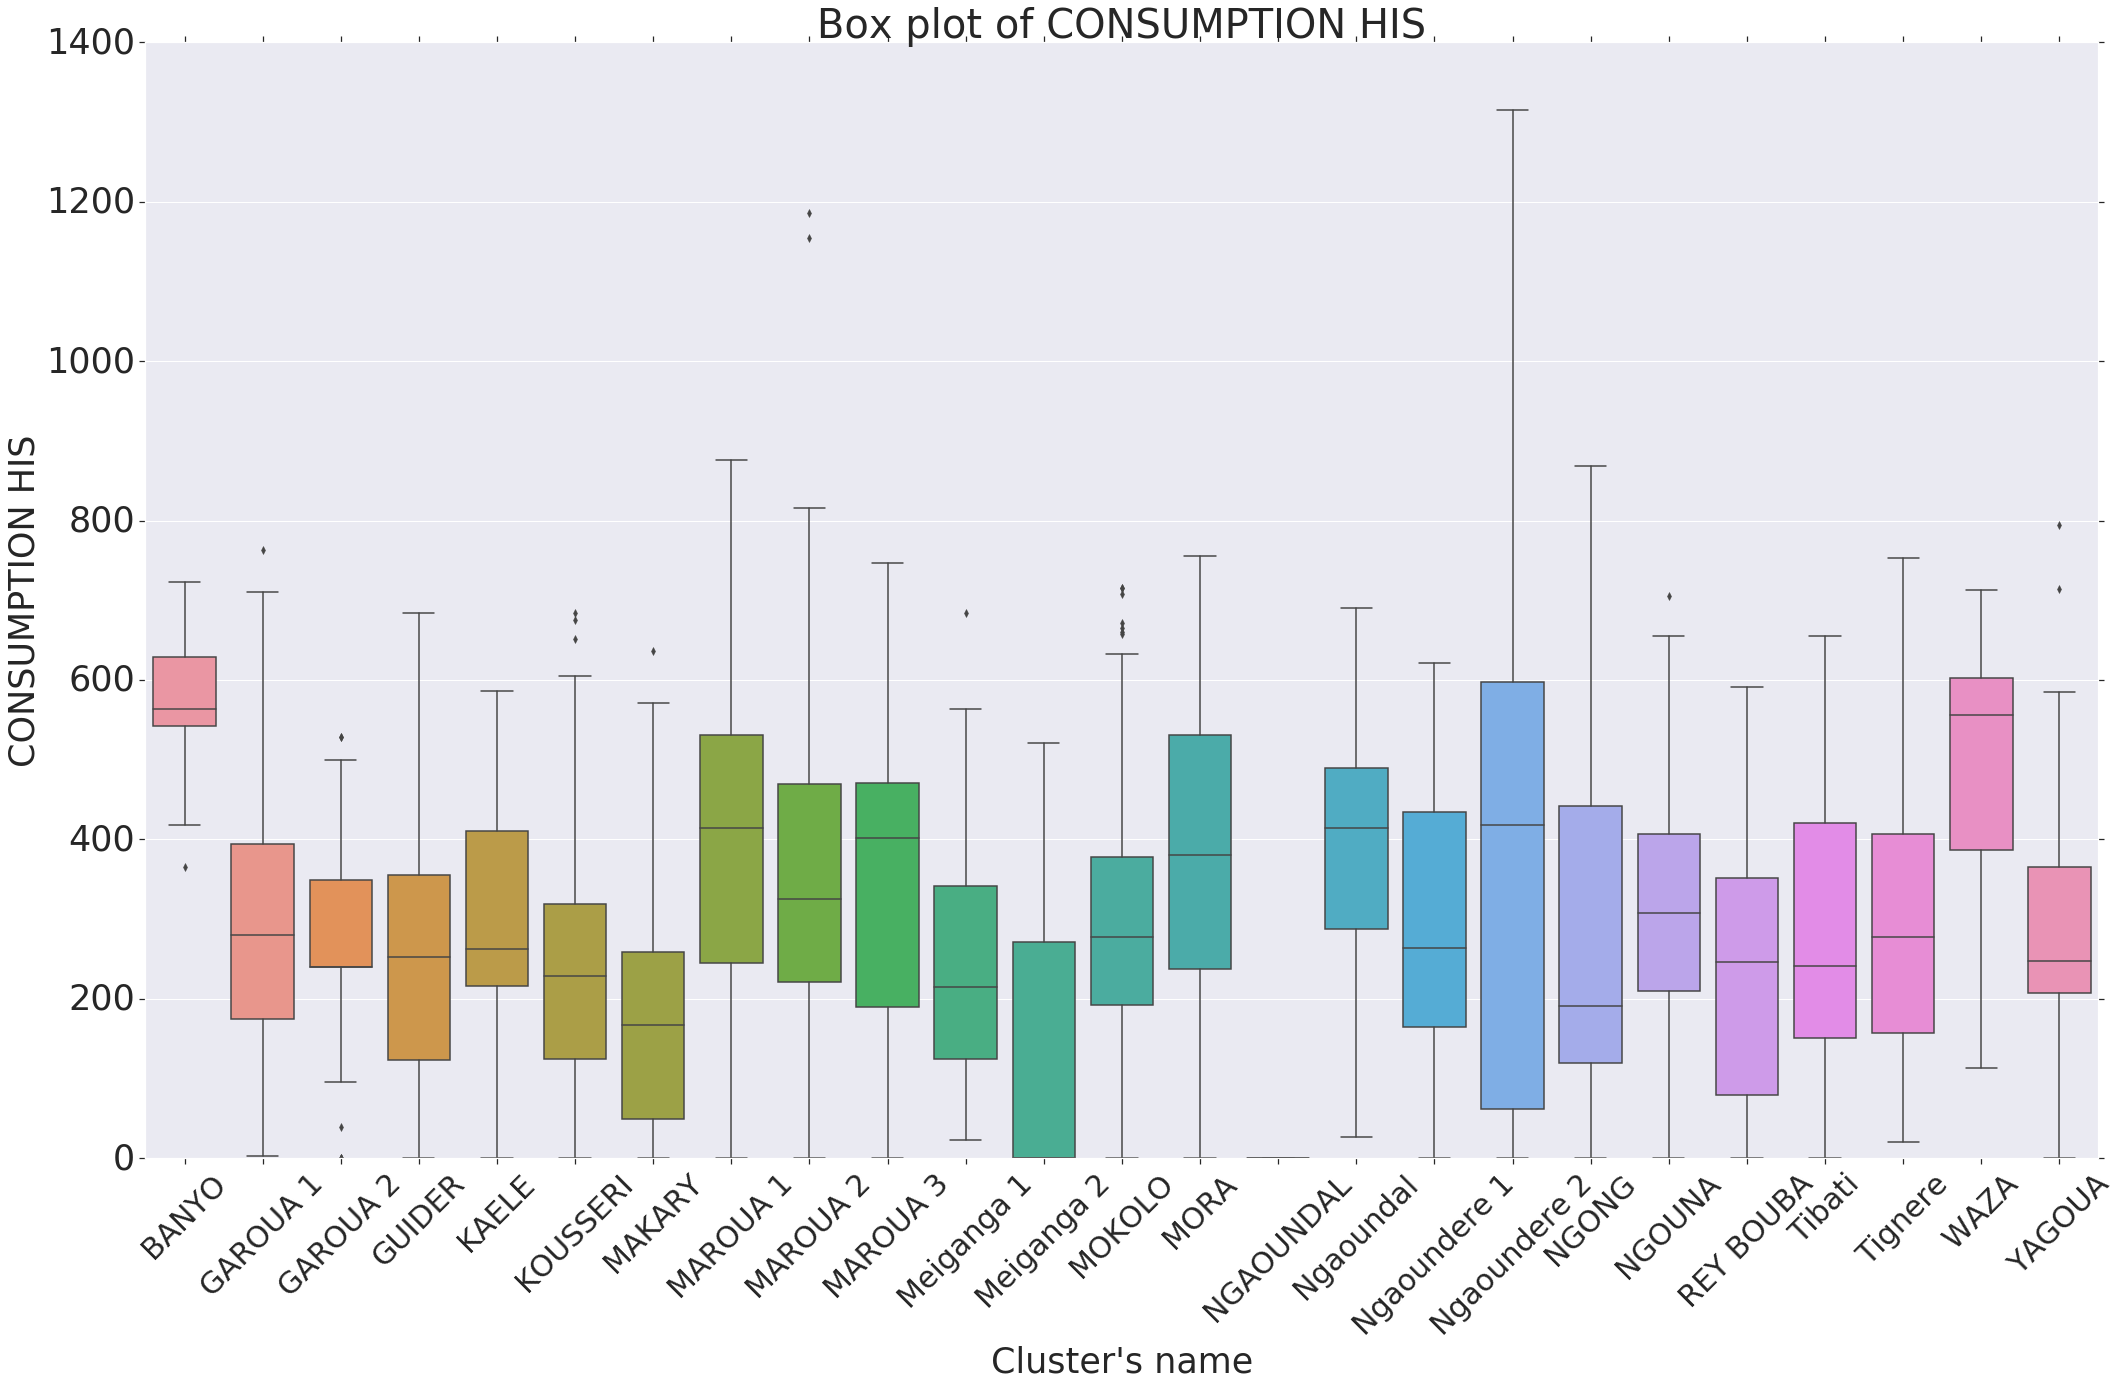

In [21]:
plt.figure(figsize=(35,20))
sns.boxplot(y="CONSUMPTION HIS", x="Cluster", data=Clusters)
plt.xticks(fontsize=30, rotation=45)      
plt.yticks(fontsize=35, rotation=None)       # to increase the values the y axis
plt.title('Box plot of CONSUMPTION HIS',size=40)
plt.ylabel('CONSUMPTION HIS', size=35)
plt.xlabel("Cluster's name", size=35)











* Banyo and Waza clusters have the highest median(above 500) so sites in those two clusters are those which consume most fuel. Ngaoundal cluster has lowest median(less than 100) which allow us to conclude that sites there consume least.

* Ngaoundal and Maroua1 have the same median of CONSUMPTION HIS so it seems like sites in both clusters fall in the same consumption categories. Same thing for the site in Mokolo and Tignere clusters.


* Ngaoundere2 has the most spread in its box plot this clearly states that this cluster has widest variety of fuel consumption among all cluster.

* Maroua1, Maroua3 and Mora have the same box plot's spread so fuel consumption of sites in those clusters almost have the same variety. Same aspect in Ngong and Ngaoundere1 clusters.

* We observe that median in Ngaoundere1, Banyo, Yagaoua, Maroua2, Meiganga Ngong and Kaele are towards lower half of thier box plot hence it is right skewed (positive skew) which means that most of the sites are on the lower side of fuel consumption.


* We also observe that median in Ngaoundere2, Rey bouba, Waza, Maroua1, Maroua3 and  Ngaoundal are towards upper half of thier box plot therefore it is left skewed (negative skew) which means that most of the sites of those clusters are on higher side of fuel consumption.


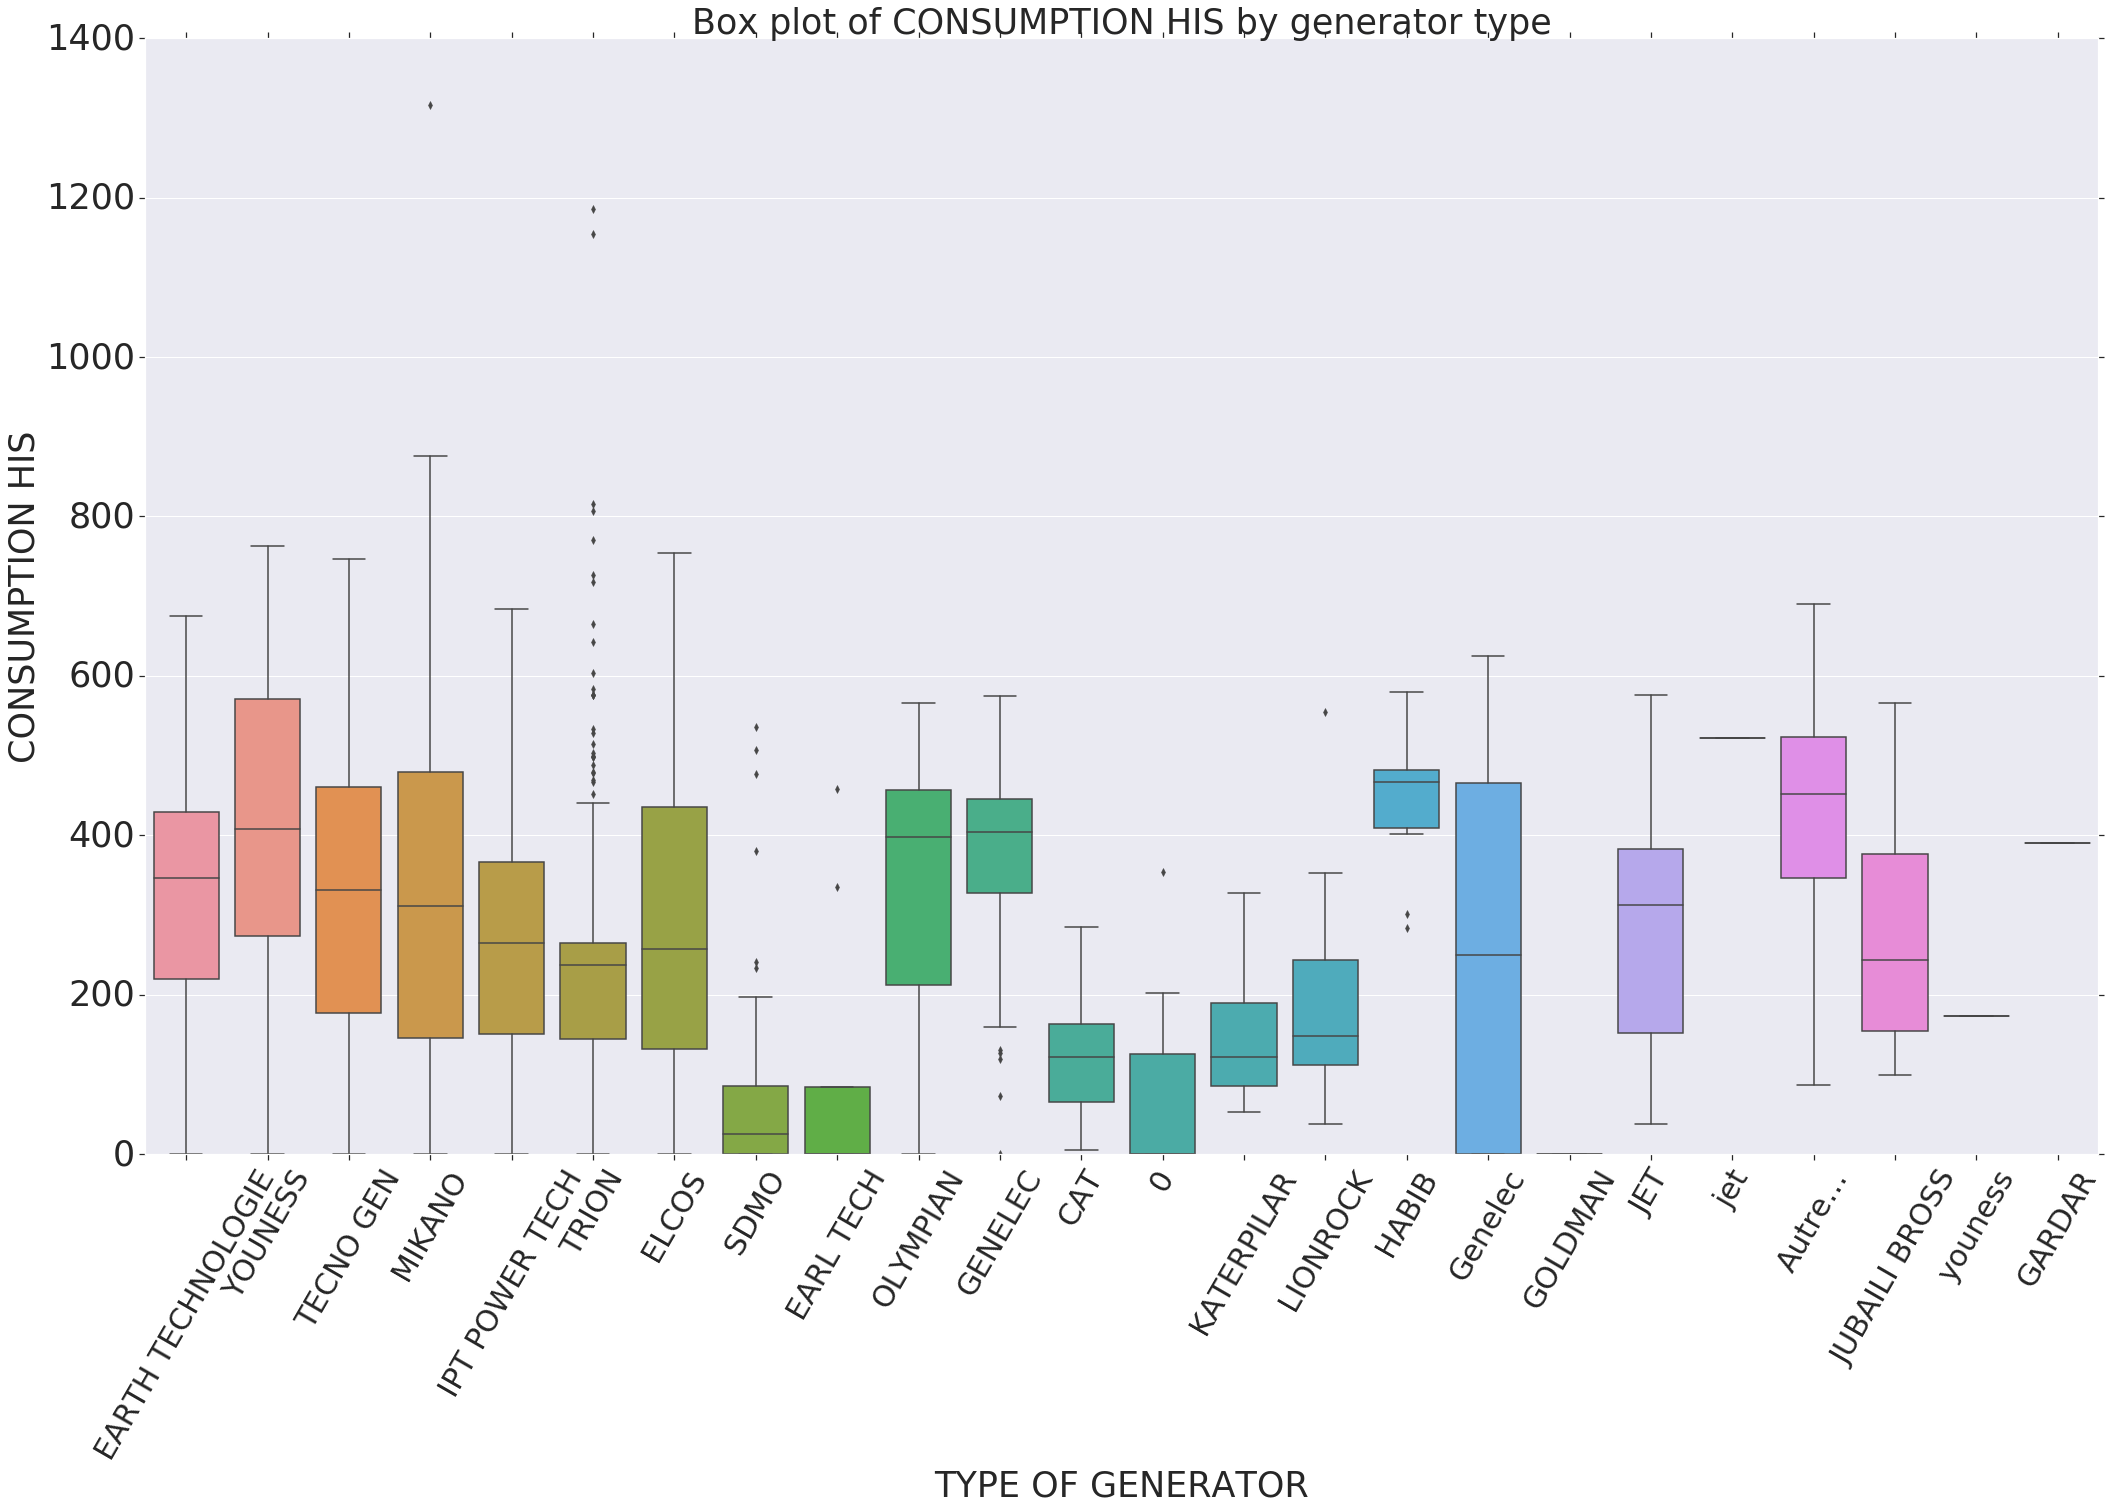

In [22]:
plt.figure(figsize=(35,20))
sns.boxplot(y="CONSUMPTION HIS", x="TYPE OF GENERATOR", data=Clusters)
plt.xticks(fontsize=30, rotation=60)
plt.yticks(fontsize=35, rotation=None)
plt.title('Box plot of CONSUMPTION HIS by generator type',size=35)
plt.ylabel('CONSUMPTION HIS', size=35)
plt.xlabel("TYPE OF GENERATOR", size=35)

Some boxplot shape like "SDMO, EARL TECH, jet, youness and GARDAR" show some anomalyties that need to be take out.

In [23]:
Mean_fuel_cons_at_each_speed=Clusters.groupby(['CONSUMPTION RATE'])['CONSUMPTION HIS'].mean()
rate=list(set(Clusters['CONSUMPTION RATE'].dropna().values))


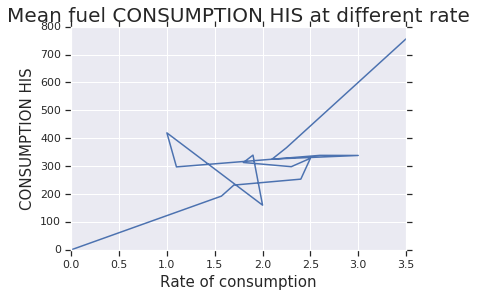

In [24]:
plt.plot(rate,Mean_fuel_cons_at_each_speed)
plt.title('Mean fuel CONSUMPTION HIS at different rate',size=20)
plt.xlabel('Rate of consumption',size=15)
plt.ylabel('CONSUMPTION HIS',size=15)

# Now we can try to check out some origin of those outliers 

In [25]:
day1=Clusters[Clusters['NUMBER OF DAYS']==1]
day1_greater24h=day1[day1['RUNNING TIME']>24] 
day1_greater24h.head(10)

Cluster T number      IHS ID                   SITE Name GE N°  \
153     GAROUA 1    T0231  IHS_GAR_344            DEMSA [ T0231 ]  GE_1   
247       GUIDER    T0157  IHS_GAR_048           FIGUIL [ T0157 ]  GE_1   
288       GUIDER    T1402  IHS_GAR_069            DOUMO [ T1402 ]  GE_1   
290       GUIDER    T0258  IHS_GAR_057           BIDZAR [ T0258 ]  GE_1   
627     KOUSSERI    T2803  IHS_KSR_118  KOUSSERI PARPAR [ T2803 ]  GE_1   
650     KOUSSERI    T2895  IHS_BMD_201  KOUSSERI ARAZAI [ T2895 ]  GE_1   
825       MAKARY    T2885  IHS_KSR_107             TIKA [ T2885 ]  GE_1   
840       MAKARY    T2893  IHS_KSR_102            MADA  [ T2893 ]  GE_1   
848       MAKARY    T2885  IHS_KSR_107             TIKA [ T2885 ]  GE_1   
1232  Meiganga 1    T1408  IHS_GAR_115            DEMBO [ T1408 ]  GE_1   

      ACCESS TICKET NUMBER EFFECTIVE DATE OF VISIT PREVIOUS DATE OF VISIT  \
153               176937.0              2017-10-02             2017-10-01   
247               240771.0              2018-02-28             2018-02-27   
288               211833.0              2017-12-20             2017-12-19   
290               211742.0              2017-12-19             2017-12-18   
627               188935.0              2017-10-29             2017-10-28   
650               181545.0              2017-10-13             2017-10-12   
825               189300.0              2017-10-30             2017-10-29   
840               181708.0              2017-10-13             2017-10-12   
848               179717.0              2017-10-09             2017-10-08   
1232              180697.0              2017-10-11             2017-10-10   

      NUMBER OF DAYS  TYPE OF GENERATOR GENERATOR 1 CAPACITY (KVA)  \
153                1          TECNO GEN                         13   
247                1              ELCOS                         20   
288                1             MIKANO                         20   
290                1  EARTH TECHNOLOGIE                         20   
627                1              ELCOS                         22   
650                1             MIKANO                         22   
825                1              ELCOS                         20   
840                1              TRION                    6,5 x 2   
848                1              ELCOS                         20   
1232               1             MIKANO                         20   

      CURRENT HOUR METER GE1  PREVIOUS HOUR METER G1 SERVICE (YES/NO)  \
153                      744                     705              NaN   
247                    22999                   22972               NO   
288                    23397                   23370              YES   
290                     4484                    4458              NaN   
627                    21905                   21880              NaN   
650                    15310                   15280              NaN   
825                    36717                   36687              NaN   
840                      840                     812              NaN   
848                    36241                   36215              NaN   
1232                    4997                    4963              NaN   

      OIL REMOVED  OIL ADDED GEN 1\nAIR FILTER\nReferences  \
153           NaN        NaN                           NaN   
247           0.0        0.0                             0   
288           5.0        9.0                   lutascav296   
290           NaN        NaN                           NaN   
627           0.0        0.0                           NaN   
650           NaN        NaN                           NaN   
825           0.0        1.0                           NaN   
840           NaN        NaN                           NaN   
848           NaN        NaN                           NaN   
1232          NaN        NaN                           NaN   

     GEN 1\nOIL FILTER\nReferences GEN 1\nFUEL FILTER\nReferences  \
153     

The above table show that there are some running time of the generator ( RUNNING TIME) are above 24 hours in one day.

# Here we assume that a generator can't work more than 24hours in one day

In [26]:
import time
start_time = time.time()
ind=[]   # index of abnormal running time in a day
Clusters["Normal_running_time"]=0  #we create and initialise the new column with 0
import numpy as np
for x in np.arange(Clusters.shape[0]):
    if Clusters['NUMBER OF DAYS'][x]!=0:
        Clusters["Normal_running_time"][x]=Clusters['RUNNING TIME'][x]/Clusters['NUMBER OF DAYS'][x]
        if Clusters["Normal_running_time"][x]>24:         #check if running time is normal
            ind.append(x)                # collect the index and put in ind
            Clusters["Normal_running_time"][x]=24*Clusters['NUMBER OF DAYS'][x] #we assign the normal running time
        else:
            Clusters["Normal_running_time"][x]=Clusters['RUNNING TIME'][x]            
print("--This code take %s minute(s) to run--" % ((time.time() - start_time)/60))

--This code take 4.393600356578827 minute(s) to run--








* We need a vector way to handle this code in other to optimize it complexity

In [27]:
Clusters[Clusters['NUMBER OF DAYS']==1].head(10)

Cluster T number      IHS ID              SITE Name GE N°  \
87   GAROUA 1  NRD_124  IHS_GAR_333  OURO BE  [ NRD_124 ]  GE_1   
107  GAROUA 1    T0389  IHS_GAR_047     BASCHEO [ T0389 ]  GE_1   
111  GAROUA 1  NRD_124  IHS_GAR_333  OURO BE  [ NRD_124 ]  GE_1   
129  GAROUA 1    T0389  IHS_GAR_047     BASCHEO [ T0389 ]  GE_1   
140  GAROUA 1    T0389  IHS_GAR_047     BASCHEO [ T0389 ]  GE_1   
141  GAROUA 1    T0389  IHS_GAR_047     BASCHEO [ T0389 ]  GE_2   
148  GAROUA 1  NRD_124  IHS_GAR_333  OURO BE  [ NRD_124 ]  GE_1   
150  GAROUA 1    T0296  IHS_GAR_034    DJALINGO [ T0296 ]  GE_1   
151  GAROUA 1    T0296  IHS_GAR_034    DJALINGO [ T0296 ]  GE_2   
153  GAROUA 1    T0231  IHS_GAR_344       DEMSA [ T0231 ]  GE_1   

     ACCESS TICKET NUMBER EFFECTIVE DATE OF VISIT PREVIOUS DATE OF VISIT  \
87               211262.0              2017-12-19             2017-12-18   
107              199819.0              2017-11-22             2017-11-21   
111              197622.0              2017-11-19             2017-11-18   
129              185446.0              2017-10-21             2017-10-20   
140              180486.0              2017-10-11             2017-10-10   
141              180486.0              2017-10-11             2017-10-10   
148              178764.0              2017-10-06             2017-10-05   
150              177454.0              2017-10-03             2017-10-02   
151              177454.0              2017-10-03             2017-10-02   
153              176937.0              2017-10-02             2017-10-01   

     NUMBER OF DAYS TYPE OF GENERATOR GENERATOR 1 CAPACITY (KVA)  \
87                1    IPT POWER TECH                          9   
107               1            MIKANO                         20   
111               1    IPT POWER TECH                          9   
129               1            MIKANO                         20   
140               1            MIKANO                         20   
141               1            MIKANO                         20   
148               1    IPT POWER TECH                          9   
150               1           YOUNESS                         20   
151               1            MIKANO                         20   
153               1         TECNO GEN                         13   

     CURRENT HOUR METER GE1  PREVIOUS HOUR METER G1 SERVICE (YES/NO)  \
87                    15296                   15278              YES   
107                   18563                   18542              NaN   
111                   14573                   14550              NaN   
129                   17806                   17782              NaN   
140                   17562                   17541              NaN   
141                   23469                   23468              NaN   
148                   13528                   13504              NaN   
150                   11758                   11736              NaN   
151                    1329                    1328              NaN   
153                     744                     705              NaN   

     OIL REMOVED  OIL ADDED GEN 1\nAIR FILTER\nReferences  \
87           3.0        4.0                   lutascav296   
107          NaN        NaN                           NaN   
111          NaN        NaN                           NaN   
129          NaN        NaN                           NaN   
140          NaN        NaN                           NaN   
141          NaN        NaN                           NaN   
148          NaN        NaN                           NaN   
150          NaN        NaN                           NaN   
151          NaN        NaN                           NaN   
153          NaN        NaN                           NaN   

    GEN 1\nOIL FILTER\nReferences GEN 1\nFUEL FILTER\nReferences  \
87                    lutascav296                    lutascav296   
107                           NaN                            NaN   
111          

In [28]:
Clusters["extra_running_time"]=Clusters['RUNNING TIME']-Clusters['Normal_running_time']

In [29]:
Clusters["extra_running_time"].sum()

3535.0

* So there is an extra time of 3535 hours in hole data sheet of generator only power type

In [30]:
Clusters["extra_cons_HIS"]=Clusters["extra_running_time"]*Clusters["CONSUMPTION RATE"]

In [31]:
Total_extra_HIS=Clusters["extra_cons_HIS"].sum()
print(Total_extra_HIS)

6598.349999999996











# From the excess running time of the generator, we have an extra CONSUMPTION HIS of 6598.34L

# Now we create a new column of the normal CONSUMPTION HIS by taking in account our assumption on the running time

In [32]:
Clusters['Normal_cons_HIS']=Clusters['CONSUMPTION RATE']*Clusters['Normal_running_time']

In [33]:
Clusters['Fuel_per_period']=Clusters['PREVIOUS FUEL QTE']-Clusters['QTE FUEL FOUND']

In [34]:
Gen_off=Clusters[Clusters['RUNNING TIME']==0].copy()
data=Gen_off[Gen_off['Fuel_per_period']!=0]
data

Cluster T number      IHS ID                   SITE Name GE N°  \
199    GAROUA 2    T1653  IHS_GAR_345           NAKONG [ T1653 ]  GE_1   
201    GAROUA 2    T1653  IHS_GAR_345           NAKONG [ T1653 ]  GE_1   
202    GAROUA 2    T1653  IHS_GAR_345           NAKONG [ T1653 ]  GE_1   
484       KAELE    T1957  IHS_MAR_369           KOLARA [ T1957 ]  GE_1   
492       KAELE    T1957  IHS_MAR_369           KOLARA [ T1957 ]  GE_1   
500       KAELE    T1957  IHS_MAR_369           KOLARA [ T1957 ]  GE_1   
595    KOUSSERI    T0355  IHS_GAR_052           MALTAM [ T0355 ]  GE-1   
604    KOUSSERI    T0355  IHS_GAR_052           MALTAM [ T0355 ]  GE-1   
610    KOUSSERI    T0355  IHS_GAR_052           MALTAM [ T0355 ]  GE_1   
614    KOUSSERI    T0355  IHS_GAR_052           MALTAM [ T0355 ]  GE_1   
618    KOUSSERI    T0355  IHS_GAR_052           MALTAM [ T0355 ]  GE_1   
629    KOUSSERI    T0355  IHS_GAR_052           MALTAM [ T0355 ]  GE_1   
635    KOUSSERI    T0355  IHS_GAR_052           MALTAM [ T0355 ]  GE_1   
642    KOUSSERI    T0355  IHS_GAR_052           MALTAM [ T0355 ]  GE_1   
647    KOUSSERI    T0355  IHS_GAR_052           MALTAM [ T0355 ]  GE_1   
710    KOUSSERI    T0355  IHS_GAR_052           MALTAM [ T0355 ]  GE_1   
712    KOUSSERI    T0355  IHS_GAR_052           MALTAM [ T0355 ]  GE_1   
713    KOUSSERI    T0355  IHS_GAR_052           MALTAM [ T0355 ]  GE_1   
714    KOUSSERI    T0355  IHS_GAR_052           MALTAM [ T0355 ]  GE_1   
716    KOUSSERI    T0355  IHS_GAR_052           MALTAM [ T0355 ]  GE_1   
772      MAKARY    T2893  IHS_KSR_102            MADA  [ T2893 ]  GE-1   
776      MAKARY    T2885  IHS_KSR_107             TIKA [ T2885 ]  GE-1   
777      MAKARY    T2894  IHS_KSR_101           TANNE  [ T2894 ]  GE-1   
780      MAKARY    T2893  IHS_KSR_102            MADA  [ T2893 ]  GE-1   
784      MAKARY    T2885  IHS_KSR_107             TIKA [ T2885 ]  GE-1   
787      MAKARY    T2885  IHS_KSR_107             TIKA [ T2885 ]  GE-1   
788      MAKARY    T2894  IHS_KSR_101           TANNE  [ T2894 ]  GE-1   
791      MAKARY    T2893  IHS_KSR_102            MADA  [ T2893 ]  GE-1   
794      MAKARY    T2885  IHS_KSR_107             TIKA [ T2885 ]  GE-1   
797      MAKARY    T2885  IHS_KSR_107             TIKA [ T2885 ]  GE-1   
...         ...      ...          ...                        ...   ...   
1994      NGONG  NRD_030  IHS_GAR_046        DJARAKO [ NRD_030 ]  GE_1   
1999      NGONG  NRD_030  IHS_GAR_046        DJARAKO [ NRD_030 ]  GE_1   
2115     NGOUNA  NRD_107  IHS_GAR_312      BADANKALI [ NRD_107 ]  GE_1   
2145  REY BOUBA    T2076  IHS_GAR_340         WAKASSAO [ T2076 ]  GE_1   
2148  REY BOUBA    T2076  IHS_GAR_340         WAKASSAO [ T2076 ]  GE_1   
2194  REY BOUBA    T3559  IHS_GAR_339    MAAN BAIBOUUM [ T3559 ]  GE_1   
2208  REY BOUBA    T3559  IHS_GAR_339    MAAN BAIBOUUM [ T3559 ]  GE_1   
2213  REY BOUBA    T3559  IHS_GAR_339    MAAN BAIBOUUM [ T3559 ]  GE_1   
2220  REY BOUBA    T2076  IHS_GAR_340         WAKASSAO [ T2076 ]  GE_1   
2224  REY BOUBA    T2076  IHS_GAR_340         WAKASSAO [ T2076 ]  GE_1   
2229  REY BOUBA    T2076  IHS_GAR_340         WAKASSAO [ T2076 ]  GE_1   
2536     YAGOUA    T2148  IHS_MAR_216          TOULOUM [ T2148 ]  GE-1   
2551     YAGOUA    T2148  IHS_MAR_216          TOULOUM [ T2148 ]  GE-1   
2552     YAGOUA    T1958  IHS_MAR_370            KORRE [ T1958 ]  GE-1   
2563     YAGOUA    T1958  IHS_MAR_370            KORRE [ T1958 ]  GE-1   
2582     YAGOUA    T1958  IHS_MAR_370            KORRE [ T1958 ]  GE_1   
2611     YAGOUA    T1965  IHS_MAR_372  MASSA KOUDWETTA [ T1965 ]  GE_1   
2623     YAGOUA    T1965  IHS_MAR_372  MASSA KOUDWETTA [ T1965 ]  GE_1   
2634     YAGOUA    T1965  IHS_MAR_372  MASSA KOUDWETTA [ T1965 ]  GE_1   
2653     YAGOUA    T1965  IHS_MAR_372  MASSA KOUDWETTA [ T1965 ]  GE_1   
2666     YAGOUA    T1965  IHS_MAR_372  MASSA KOUDWETTA [ T1965 ]  GE_1   
2679     YAGOUA    T1965  IHS_MAR_372  MASSA KOUDWETTA [ T1965 ]  GE_1   
2705     YAG

In [35]:
Gen_off.shape

(184, 41)

In [36]:
Fuel_steal=data["Fuel_per_period"].sum()
print(Fuel_steal)

46339.96


* From the above table we realise that during some visit's period generator did not work but fuel left in the tank was consume. Therefore feul from the tank was used for something else (may be stealing) and not generator. 
# During this period 6 months around 46340 L of fuel that was in the thank did no go to the generator.

In [37]:
print(Total_extra_HIS+Fuel_steal)

52938.31


# In total around 52938.31 L of fuel was not use by the generator during this Period of 6 months

# In other to make a good prediction of fuel consumption we are going to remove all the observations where the generator where off

In [38]:
Clusters=Clusters.drop(ind,axis=0)    #drop the index of the abnormal observation running time

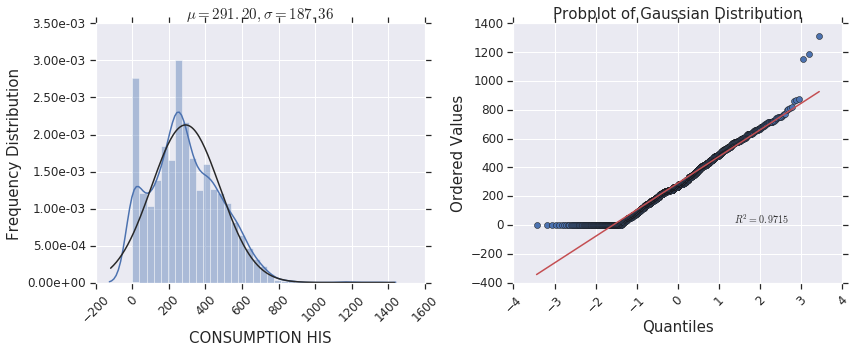

In [39]:
kk = Clusters['CONSUMPTION HIS'].dropna()
import matplotlib.ticker as mtick
from scipy import stats
from scipy.stats import skew,norm
import seaborn; seaborn.set()
%matplotlib inline

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
# kernel density plotsome scatter
ax1 = sns.distplot(kk,fit=norm, kde=True, norm_hist=True);
(mu, sigma) = norm.fit(kk);
ax1.set_title(r'$\mu = %0.2f, \sigma = %0.2f$' %(mu, sigma), fontsize=15)
ax1.set_ylabel(r'Frequency Distribution',fontsize=15)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax1.set_xlabel(r'CONSUMPTION HIS',fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=None)
#plt.text(x=500, y= 2.5e-03, s=r'$\rm skew = %0.2f, kurt = %0.2f$' %(kk.skew(),
 #                                                               kk.kurt()), fontdict=None, withdash=False, fontsize=15)

ax = fig.add_subplot(122)
res = stats.probplot(kk, plot=plt,rvalue=True)
ax.set_title(r'Probplot of Gaussian Distribution',fontsize=15)
ax.set_ylabel(r'Ordered Values', fontsize=15)
ax.set_xlabel(r'Quantiles', fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=None)
plt.tight_layout()

In [40]:
delette2=Clusters[Clusters['CONSUMPTION HIS']>1000].index.values
delette3=Clusters[Clusters['CONSUMPTION HIS']==0].index.values

In [41]:
Clusters=Clusters.drop(delette2,axis=0)
Clusters=Clusters.drop(delette3,axis=0)

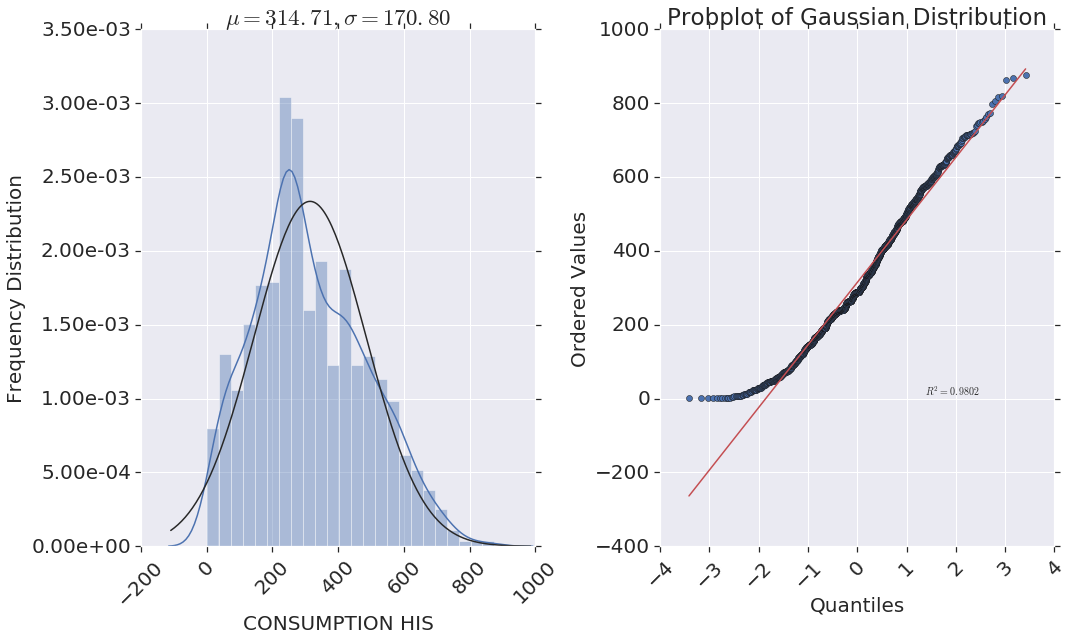

In [42]:
kk = Clusters['CONSUMPTION HIS'].dropna()
import matplotlib.ticker as mtick
from scipy import stats
from scipy.stats import skew,norm
import seaborn; seaborn.set()
%matplotlib inline

fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(121)
# kernel density plotsome scatter
ax1 = sns.distplot(kk,fit=norm, kde=True, norm_hist=True);
(mu, sigma) = norm.fit(kk);
ax1.set_title(r'$\mu = %0.2f, \sigma = %0.2f$' %(mu, sigma), fontsize=23)
ax1.set_ylabel(r'Frequency Distribution',fontsize=20)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax1.set_xlabel(r'CONSUMPTION HIS',fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
#plt.text(x=500, y= 2.5e-03, s=r'$\rm skew = %0.2f, kurt = %0.2f$' %(kk.skew(),
 #                                                               kk.kurt()), fontdict=None, withdash=False, fontsize=15)

ax = fig.add_subplot(122)
res = stats.probplot(kk, plot=plt,rvalue=True)
ax.set_title(r'Probplot of Gaussian Distribution',fontsize=23)
ax.set_ylabel(r'Ordered Values', fontsize=20)
ax.set_xlabel(r'Quantiles', fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
plt.tight_layout()

From the figure above consumption HIS follow the gaussian distribution

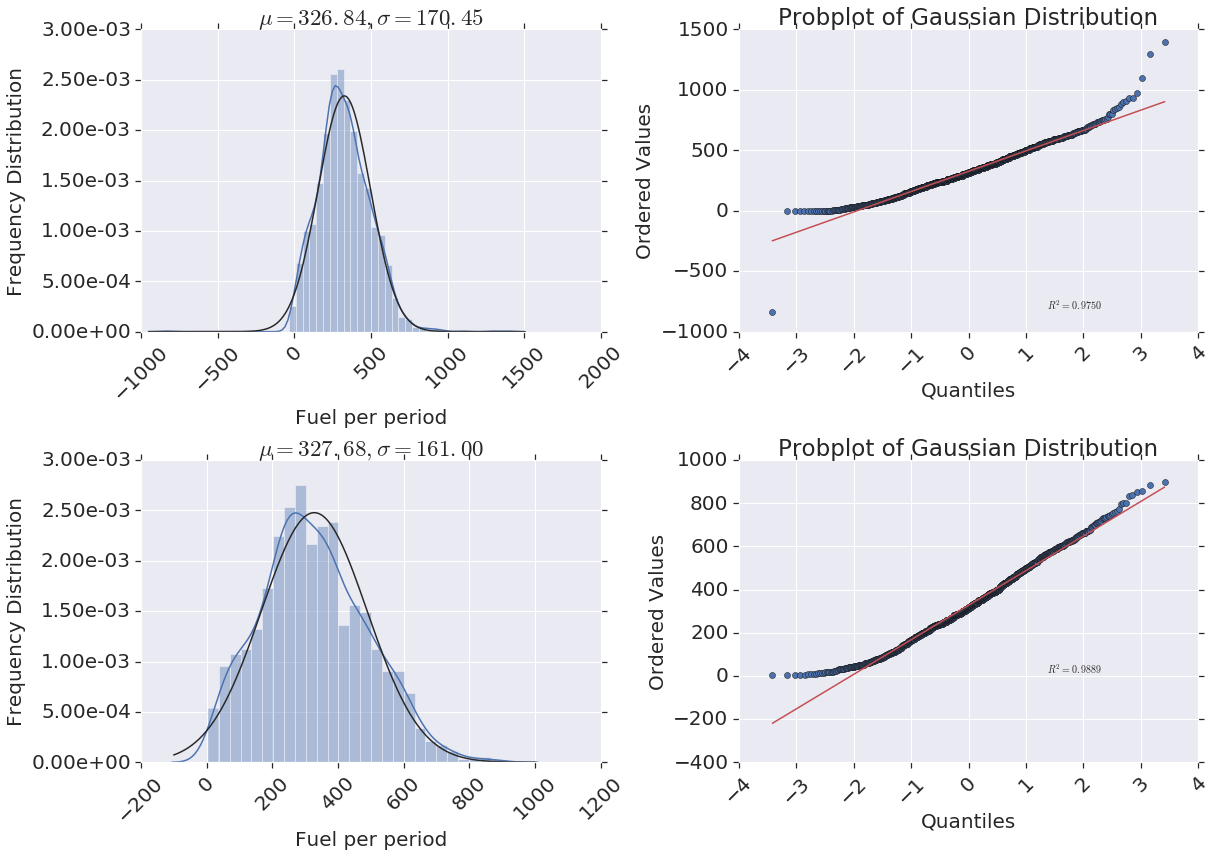

In [43]:

kk = Clusters['Fuel_per_period'].dropna()
import matplotlib.ticker as mtick
from scipy import stats
from scipy.stats import skew,norm
import seaborn; seaborn.set()
%matplotlib inline

fig = plt.figure(figsize=(17,12))
ax = fig.add_subplot(221)
# kernel density plotsome scatter
ax1 = sns.distplot(kk,fit=norm, kde=True, norm_hist=True);
(mu, sigma) = norm.fit(kk);
ax1.set_title(r'$\mu = %0.2f, \sigma = %0.2f$' %(mu, sigma), fontsize=23)
ax1.set_ylabel(r'Frequency Distribution',fontsize=20)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax1.set_xlabel(r'Fuel per period',fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
#plt.text(x=500, y= 2.5e-03, s=r'$\rm skew = %0.2f, kurt = %0.2f$' %(kk.skew(),
 #                                                               kk.kurt()), fontdict=None, withdash=False, fontsize=15)

ax = fig.add_subplot(222)
res = stats.probplot(kk, plot=plt,rvalue=True)
ax.set_title(r'Probplot of Gaussian Distribution',fontsize=23)
ax.set_ylabel(r'Ordered Values', fontsize=20)
ax.set_xlabel(r'Quantiles', fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
plt.tight_layout()

# In the following we clean the abnomality 
above900=Clusters[Clusters['Fuel_per_period']>900].index.values
neg=Clusters[Clusters['Fuel_per_period']<-500].index.values
zer=Clusters[Clusters['Fuel_per_period']==0].index.values
Clusters=Clusters.drop(above900,axis=0)
Clusters=Clusters.drop(neg,axis=0)
Clusters=Clusters.drop(zer,axis=0)
kk1 = Clusters['Fuel_per_period'].dropna()
#fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(223)
# kernel density plotsome scatter
ax1 = sns.distplot(kk1,fit=norm, kde=True, norm_hist=True);
(mu, sigma) = norm.fit(kk1);
ax1.set_title(r'$\mu = %0.2f, \sigma = %0.2f$' %(mu, sigma), fontsize=23)
ax1.set_ylabel(r'Frequency Distribution',fontsize=20)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax1.set_xlabel(r'Fuel per period',fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
#plt.text(x=500, y= 2.5e-03, s=r'$\rm skew = %0.2f, kurt = %0.2f$' %(kk.skew(),
 #                                                               kk.kurt()), fontdict=None, withdash=False, fontsize=15)

ax = fig.add_subplot(224)
res = stats.probplot(kk1, plot=plt,rvalue=True)
ax.set_title(r'Probplot of Gaussian Distribution',fontsize=23)
ax.set_ylabel(r'Ordered Values', fontsize=20)
ax.set_xlabel(r'Quantiles', fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
plt.tight_layout()



In [44]:
Clusters[Clusters['CONSUMPTION HIS']==0]

Empty DataFrame
Columns: [Cluster, T number, IHS ID , SITE Name, GE N°, ACCESS TICKET NUMBER, EFFECTIVE DATE OF VISIT, PREVIOUS DATE OF VISIT, NUMBER OF DAYS, TYPE OF GENERATOR, GENERATOR 1 CAPACITY (KVA), CURRENT HOUR METER GE1, PREVIOUS HOUR METER G1, SERVICE (YES/NO), OIL REMOVED, OIL ADDED, GEN 1
AIR FILTER
References, GEN 1
OIL FILTER
References, GEN 1
FUEL FILTER
References, GEN 1
FAN BELT
References, PREVIOUS FUEL QTE, QTE FUEL FOUND, QTE FUEL ADDED, TOTALE QTE LEFT, CONSUMPTION HIS, RUNNING TIME, CONSUMPTION RATE, TYPE OF PASSAGE , ARRIVAL TIME ON THE SITE , DEPARTURE TIME ON THE SITE, POWER TYPE , TX Indoor / Outdoor, Total DC (Amps), Ph1 (Amps), Ph2 (Amps), Ph3 (Amps), Normal_running_time, extra_running_time, extra_cons_HIS, Normal_cons_HIS, Fuel_per_period]
Index: []

In [45]:
Clusters[Clusters['RUNNING TIME']==0]

Empty DataFrame
Columns: [Cluster, T number, IHS ID , SITE Name, GE N°, ACCESS TICKET NUMBER, EFFECTIVE DATE OF VISIT, PREVIOUS DATE OF VISIT, NUMBER OF DAYS, TYPE OF GENERATOR, GENERATOR 1 CAPACITY (KVA), CURRENT HOUR METER GE1, PREVIOUS HOUR METER G1, SERVICE (YES/NO), OIL REMOVED, OIL ADDED, GEN 1
AIR FILTER
References, GEN 1
OIL FILTER
References, GEN 1
FUEL FILTER
References, GEN 1
FAN BELT
References, PREVIOUS FUEL QTE, QTE FUEL FOUND, QTE FUEL ADDED, TOTALE QTE LEFT, CONSUMPTION HIS, RUNNING TIME, CONSUMPTION RATE, TYPE OF PASSAGE , ARRIVAL TIME ON THE SITE , DEPARTURE TIME ON THE SITE, POWER TYPE , TX Indoor / Outdoor, Total DC (Amps), Ph1 (Amps), Ph2 (Amps), Ph3 (Amps), Normal_running_time, extra_running_time, extra_cons_HIS, Normal_cons_HIS, Fuel_per_period]
Index: []

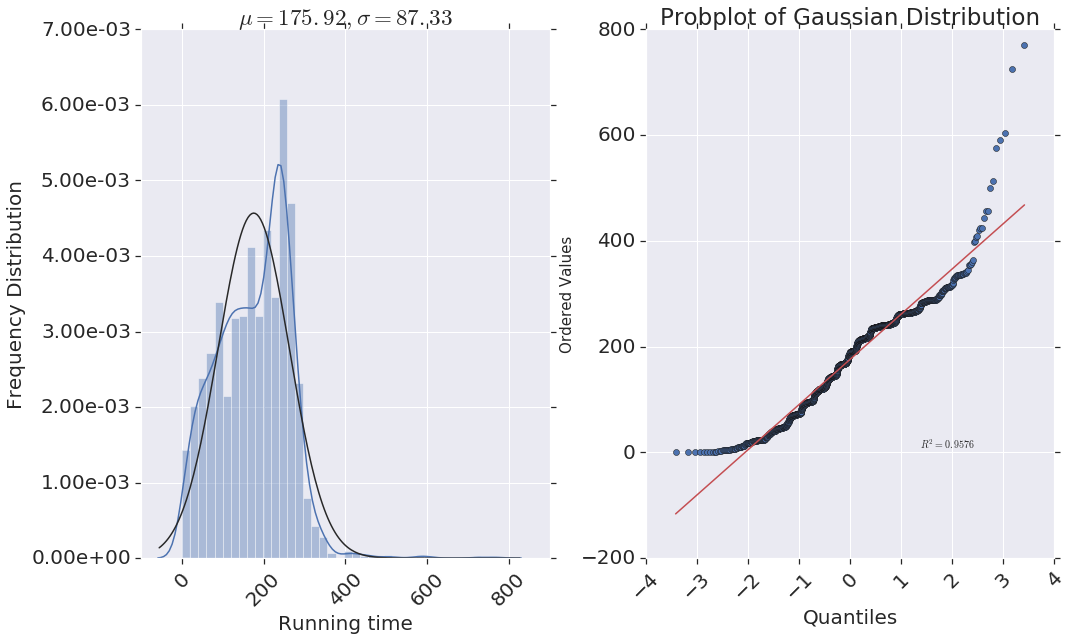

In [46]:

kk = Clusters['RUNNING TIME'].dropna()
import matplotlib.ticker as mtick
from scipy import stats
from scipy.stats import skew,norm
import seaborn; seaborn.set()
%matplotlib inline

fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(121)
# kernel density plotsome scatter
ax1 = sns.distplot(kk,fit=norm, kde=True, norm_hist=True);
(mu, sigma) = norm.fit(kk);
ax1.set_title(r'$\mu = %0.2f, \sigma = %0.2f$' %(mu, sigma), fontsize=23)
ax1.set_ylabel(r'Frequency Distribution',fontsize=20)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax1.set_xlabel(r'Running time',fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
#plt.text(x=500, y= 2.5e-03, s=r'$\rm skew = %0.2f, kurt = %0.2f$' %(kk.skew(),
 #                                                               kk.kurt()), fontdict=None, withdash=False, fontsize=15)

ax = fig.add_subplot(122)
res = stats.probplot(kk, plot=plt,rvalue=True)
ax.set_title(r'Probplot of Gaussian Distribution',fontsize=23)
ax.set_ylabel(r'Ordered Values', fontsize=15)
ax.set_xlabel(r'Quantiles', fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
plt.tight_layout()

In [47]:
delette4=Clusters[Clusters['RUNNING TIME']>450].index.values
Clusters=Clusters.drop(delette4,axis=0)  # clean outliers

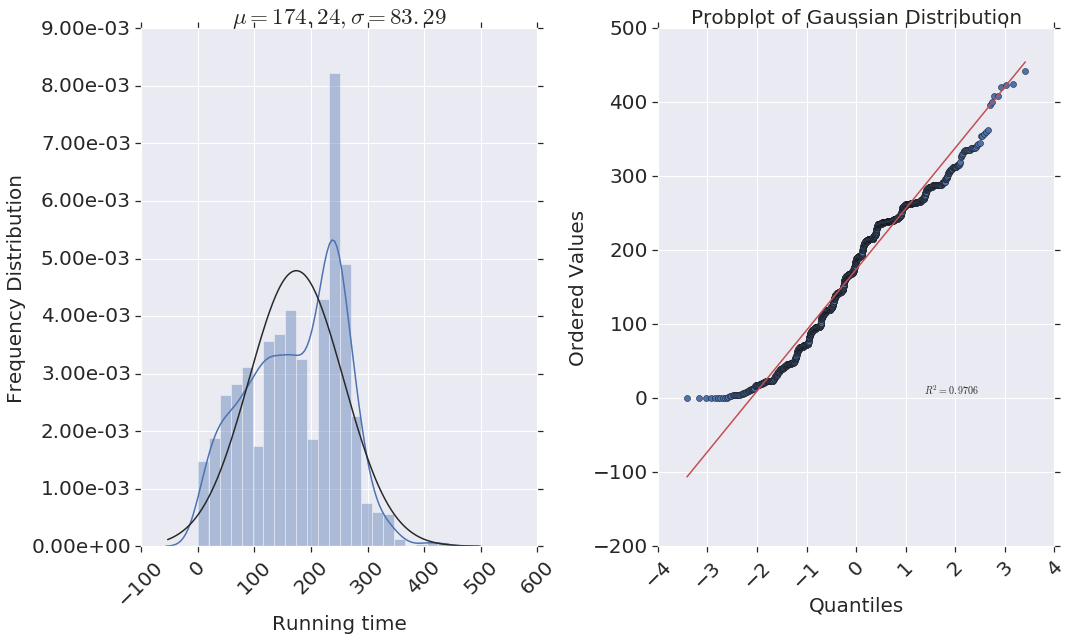

In [48]:

kk = Clusters['RUNNING TIME'].dropna()
import matplotlib.ticker as mtick
from scipy import stats
from scipy.stats import skew,norm
import seaborn; seaborn.set()
%matplotlib inline

fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(121)
# kernel density plotsome scatter
ax1 = sns.distplot(kk,fit=norm, kde=True, norm_hist=True);
(mu, sigma) = norm.fit(kk);
ax1.set_title(r'$\mu = %0.2f, \sigma = %0.2f$' %(mu, sigma), fontsize=23)
ax1.set_ylabel(r'Frequency Distribution',fontsize=20)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax1.set_xlabel(r'Running time',fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
#plt.text(x=500, y= 2.5e-03, s=r'$\rm skew = %0.2f, kurt = %0.2f$' %(kk.skew(),
 #                                                               kk.kurt()), fontdict=None, withdash=False, fontsize=15)

ax = fig.add_subplot(122)
res = stats.probplot(kk, plot=plt,rvalue=True)
ax.set_title(r'Probplot of Gaussian Distribution',fontsize=20)
ax.set_ylabel(r'Ordered Values', fontsize=20)
ax.set_xlabel(r'Quantiles', fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
plt.tight_layout()

In [49]:
 Clusters=Clusters.fillna(Clusters.mean())

In [50]:
df=Clusters.drop(["ACCESS TICKET NUMBER",'PREVIOUS DATE OF VISIT','GE N°','SITE Name',
                  'DEPARTURE TIME ON THE SITE','TX Indoor / Outdoor','Ph1 (Amps)','extra_cons_HIS',
                  'extra_running_time',
                  'Normal_cons_HIS'],axis=1)

In [51]:
# df['log_N_running']=np.log(df['Normal_running_time'])
# df['log_Fuel_per_period']=np.log(df['Fuel_per_period'])
data_all_var=df[['Cluster','NUMBER OF DAYS','TYPE OF GENERATOR','GENERATOR 1 CAPACITY (KVA)',
        'CURRENT HOUR METER GE1','PREVIOUS HOUR METER G1',
                 'OIL REMOVED','OIL ADDED','PREVIOUS FUEL QTE','QTE FUEL FOUND','QTE FUEL ADDED',
       'TOTALE QTE LEFT','CONSUMPTION HIS','RUNNING TIME','CONSUMPTION RATE',
      'Total DC (Amps)', 'Ph2 (Amps)', 'Ph3 (Amps)','Fuel_per_period']]

In [52]:
data_all_var.head()

Cluster  NUMBER OF DAYS  TYPE OF GENERATOR GENERATOR 1 CAPACITY (KVA)  \
0   BANYO              27  EARTH TECHNOLOGIE                         10   
1   BANYO               9  EARTH TECHNOLOGIE                         10   
2   BANYO              10            YOUNESS                         20   
3   BANYO               8            YOUNESS                         20   
4   BANYO               9            YOUNESS                         20   

   CURRENT HOUR METER GE1  PREVIOUS HOUR METER G1  OIL REMOVED  OIL ADDED  \
0                    1021                     624          4.0        5.0   
1                     624                     409          0.0        0.0   
2                   11485                   11243          9.0       10.0   
3                   15952                   15761          9.0       10.0   
4                   15761                   15545          9.0       10.0   

   PREVIOUS FUEL QTE  QTE FUEL FOUND  QTE FUEL ADDED  TOTALE QTE LEFT  \
0              780.0           124.0           400.0            524.0   
1              700.0           380.0           400.0            780.0   
2              761.0           152.0           600.0            752.0   
3              810.0           314.0           500.0            814.0   
4              798.0           260.0           550.0            810.0   

   CONSUMPTION HIS  RUNNING TIME  CONSUMPTION RATE  Total DC (Amps)  \
0            674.9         397.0               1.7             32.0   
1            365.5         215.0               1.7             32.0   
2            580.8         242.0               2.4             62.0   
3            458.4         191.0               2.4             69.0   
4            518.4         216.0               2.4             69.0   

   Ph2 (Amps)  Ph3 (Amps)  Fuel_per_period  
0         9.0         7.0            656.0  
1         9.0         7.0            320.0  
2         7.0        10.0            609.0  
3        10.0        13.0            496.0  
4        10.0        13.0            538.0

In [53]:
je=data_all_var[data_all_var["TYPE OF GENERATOR"]=='jet'].index.values
ga=data_all_var[data_all_var["TYPE OF GENERATOR"]=='GARDAR'].index.values 
data_all_var=data_all_var.drop(je,axis=0) #We remove observation which are not helpful in the study
data_all_var=data_all_var.drop(ga,axis=0)  #We remove observation which are not helpful in the study
data_all_var =data_all_var.replace({"Genelec": "GENELEC"}) 

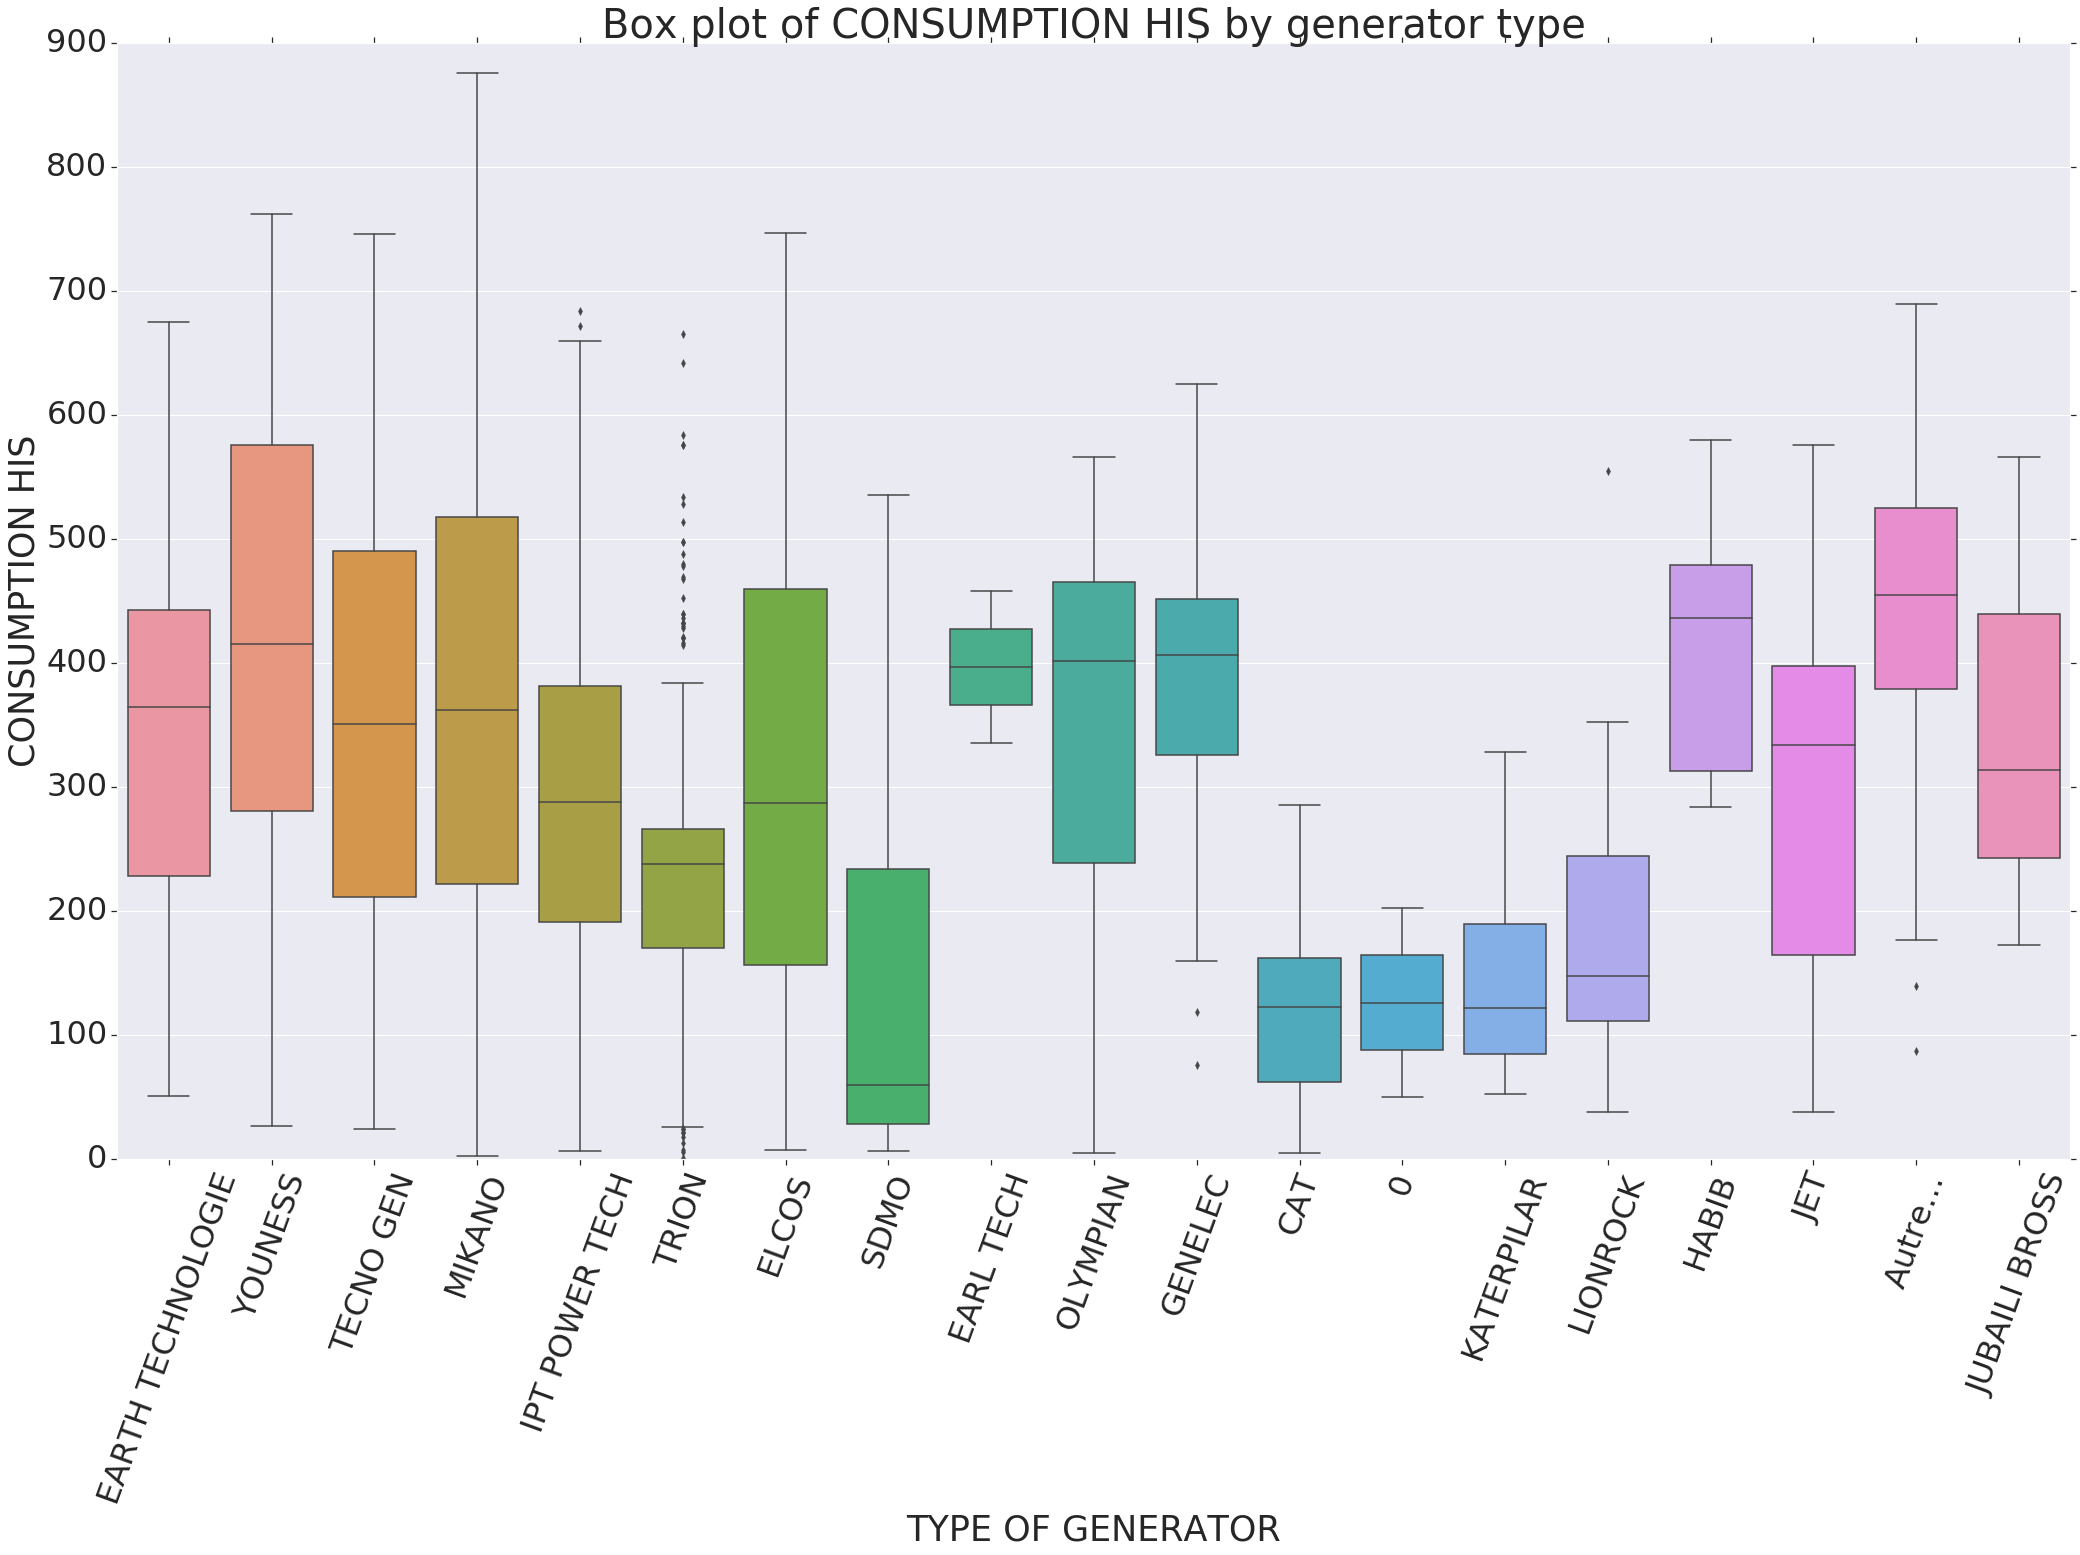

In [54]:
plt.figure(figsize=(35,20))
sns.boxplot(y="CONSUMPTION HIS", x="TYPE OF GENERATOR", data=data_all_var)
plt.xticks(fontsize=32, rotation=70)
plt.yticks(fontsize=32, rotation=None)
plt.title('Box plot of CONSUMPTION HIS by generator type',size=40)
plt.ylabel('CONSUMPTION HIS', size=35)
plt.xlabel("TYPE OF GENERATOR", size=35)


* HABIB, Genelec,and YOUNESS have the highest median (400L of consumption HIS) this are the generator type that consume most fuel in our base station. In the orther hand CAT, KATERPILAR, SDMO and LIONROCK generator  have lowest median(less than 200) which allow us to conclude that those generator type consume least. 

* We observe that median in SDMO, KATERPILAR, JUBAILI BROSS and LIONROCK   are towards lower half of thier box plot hence it is right skewed (positive skew) which means that most of the load of those generator are on the lower side of fuel consumption.


* We also observe that median in JET, HABIB, GENELEC, OLYMPIAN, TRION and EARTH TECHNOLOGIE are towards upper half of thier box plot therefore it is left skewed (negative skew) which means that most of the load of those generator type are on higher side of fuel consumption.

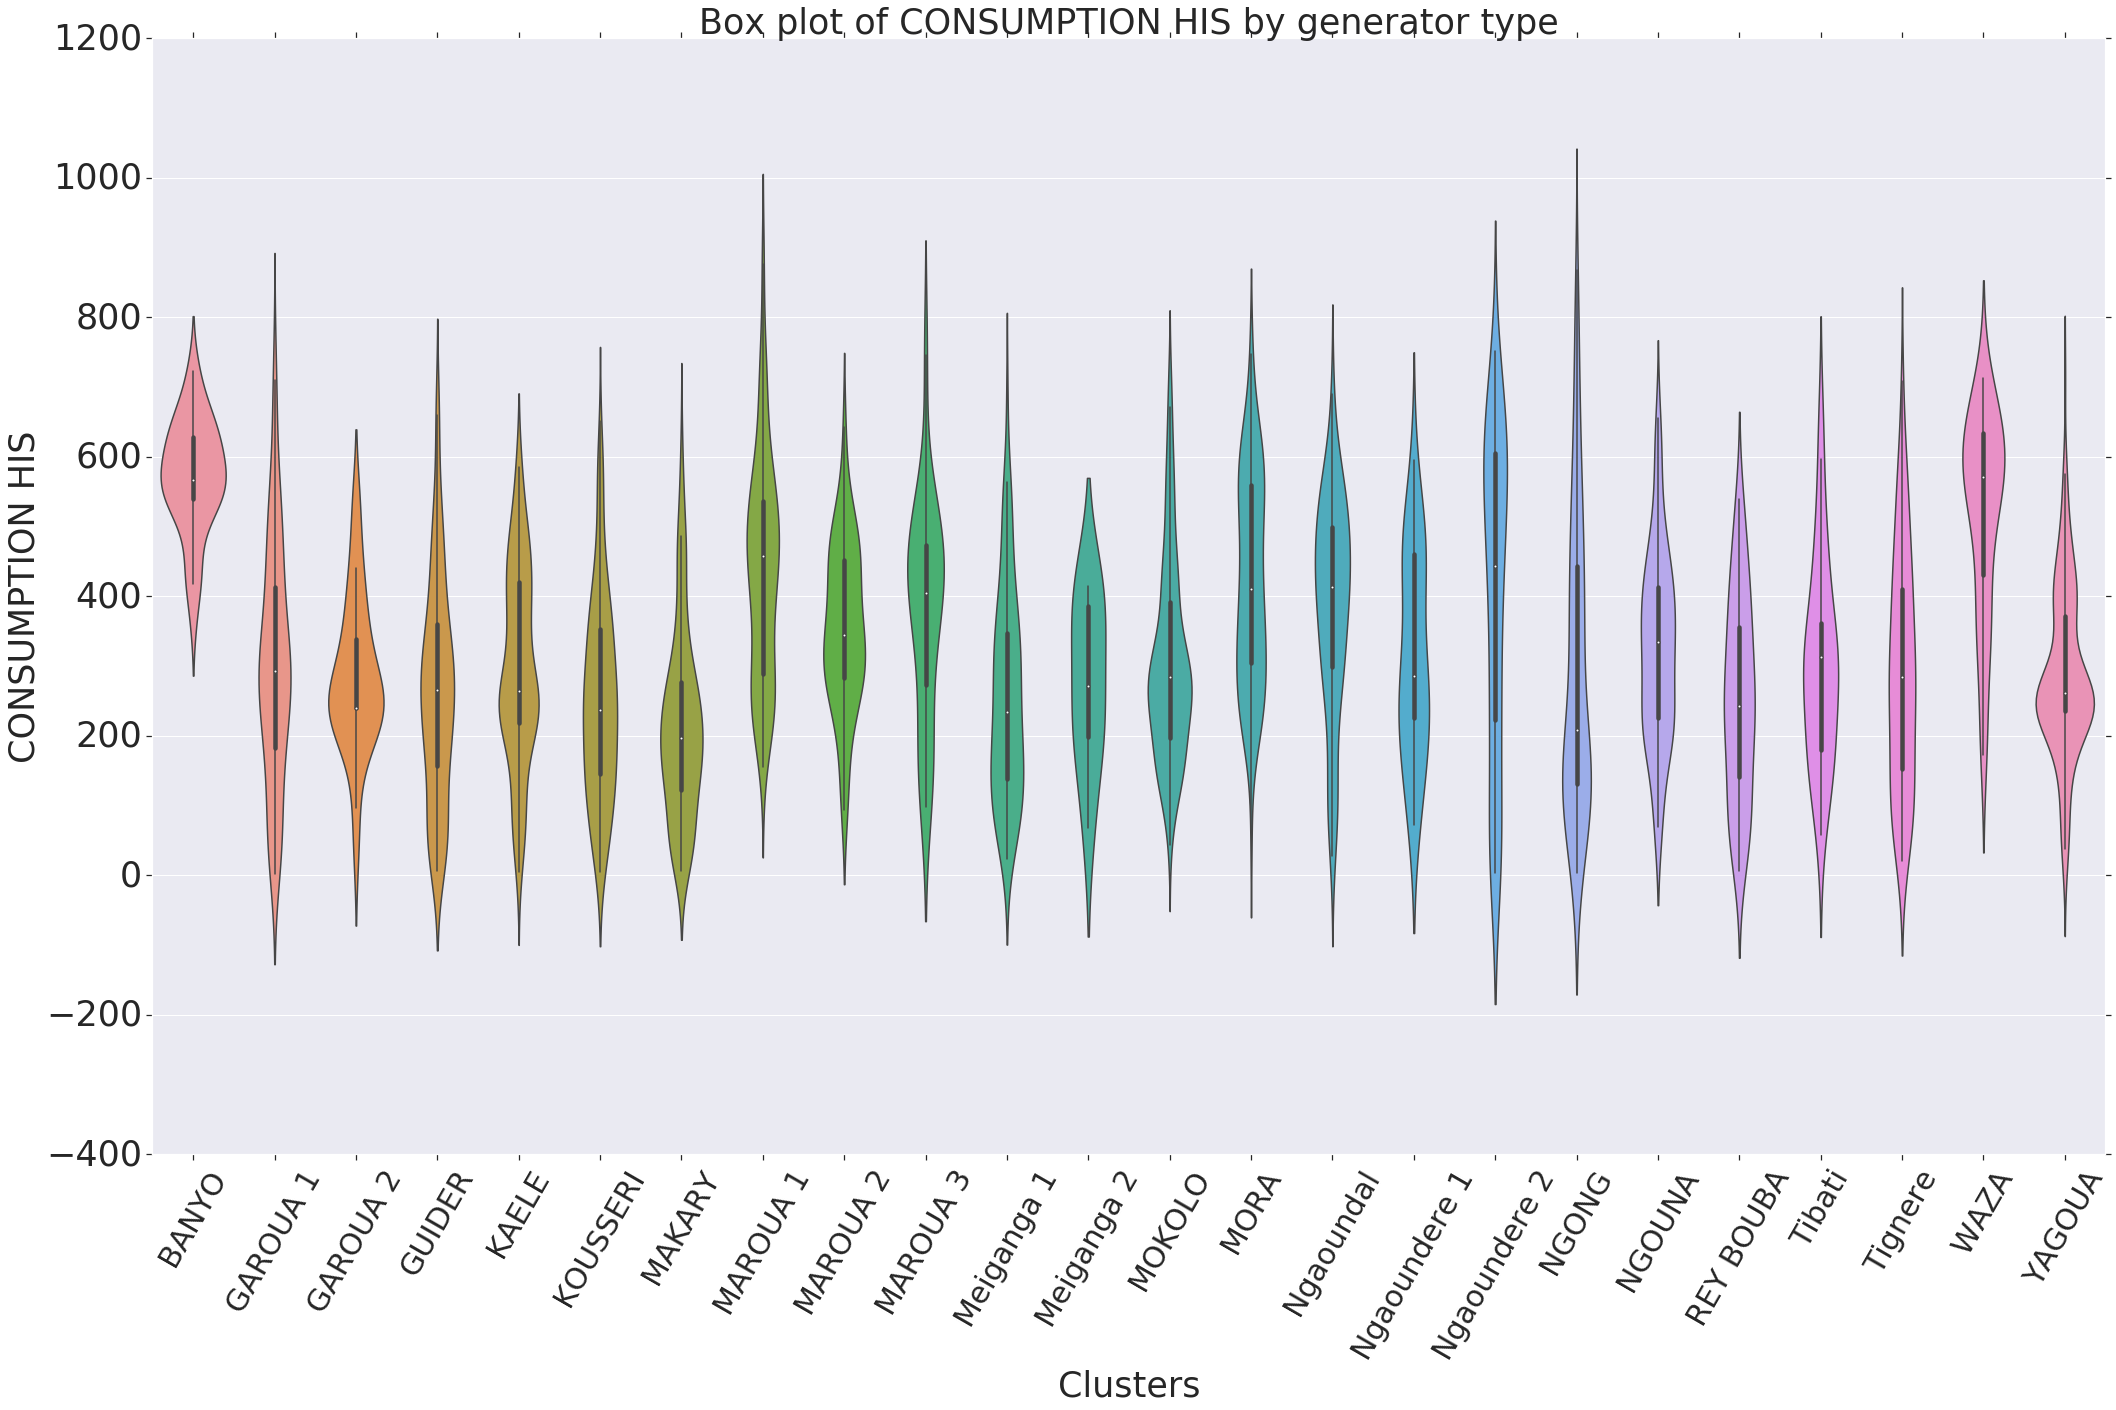

In [55]:
plt.figure(figsize=(35,20))
sns.violinplot(y="CONSUMPTION HIS", x="Cluster", data=Clusters)
plt.xticks(fontsize=30, rotation=60)
plt.yticks(fontsize=35, rotation=None)
plt.title('Box plot of CONSUMPTION HIS by generator type',size=35)
plt.ylabel('CONSUMPTION HIS', size=35)
plt.xlabel("Clusters", size=35)

In [56]:
        
# Select the categorical columns
categorical_subset = data_all_var[['Cluster', 'TYPE OF GENERATOR','GENERATOR 1 CAPACITY (KVA)']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

num=data_all_var.drop(['Cluster', 'TYPE OF GENERATOR','GENERATOR 1 CAPACITY (KVA)'],axis=1)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([num, categorical_subset], axis = 1)


In [57]:
features.head()

NUMBER OF DAYS  CURRENT HOUR METER GE1  PREVIOUS HOUR METER G1  \
0              27                    1021                     624   
1               9                     624                     409   
2              10                   11485                   11243   
3               8                   15952                   15761   
4               9                   15761                   15545   

   OIL REMOVED  OIL ADDED  PREVIOUS FUEL QTE  QTE FUEL FOUND  QTE FUEL ADDED  \
0          4.0        5.0              780.0           124.0           400.0   
1          0.0        0.0              700.0           380.0           400.0   
2          9.0       10.0              761.0           152.0           600.0   
3          9.0       10.0              810.0           314.0           500.0   
4          9.0       10.0              798.0           260.0           550.0   

   TOTALE QTE LEFT  CONSUMPTION HIS  RUNNING TIME  CONSUMPTION RATE  \
0            524.0            674.9         397.0               1.7   
1            780.0            365.5         215.0               1.7   
2            752.0            580.8         242.0               2.4   
3            814.0            458.4         191.0               2.4   
4            810.0            518.4         216.0               2.4   

   Total DC (Amps)  Ph2 (Amps)  Ph3 (Amps)  Fuel_per_period  Cluster_BANYO  \
0             32.0         9.0         7.0            656.0              1   
1             32.0         9.0         7.0            320.0              1   
2             62.0         7.0        10.0            609.0              1   
3             69.0        10.0        13.0            496.0              1   
4             69.0        10.0        13.0            538.0              1   

   Cluster_GAROUA 1  Cluster_GAROUA 2  Cluster_GUIDER  Cluster_KAELE  \
0                 0                 0               0              0   
1                 0                 0               0              0   
2                 0                 0               0              0   
3                 0                 0               0              0   
4                 0                 0               0              0   

   Cluster_KOUSSERI  Cluster_MAKARY  Cluster_MAROUA 1  Cluster_MAROUA 2  \
0                 0               0                 0                 0   
1                 0               0                 0                 0   
2                 0               0                 0                 0   
3                 0               0                 0                 0   
4                 0               0                 0                 0   

   Cluster_MAROUA 3  Cluster_MOKOLO  Cluster_MORA  Cluster_Meiganga 1  \
0                 0               0             0                   0   
1                 0               0             0                   0   
2                 0               0             0                   0   
3                 0               0             0                   0   
4                 0               0             0                   0   

   Cluster_Meiganga 2  Cluster_NGONG  Cluster_NGOUNA  Cluster_Ngaoundal  \
0                   0              0               0                  0   
1                   0              0               0                  0   
2                   0              0               0                  0   
3                   0              0               0                  0   
4                   0              0               0                  0   

   Cluster_Ngaoundere 1  Cluster_Ngaoundere 2  Cluster_REY BOUBA  \
0                     0                     0                  0   
1                     0                     0                  0   
2                     0                     0                  0   
3                     0                     0                  0   
4                     0                     0                  0   

   Cluster_Tibati  Cluster_T

In [58]:
num.head()

NUMBER OF DAYS  CURRENT HOUR METER GE1  PREVIOUS HOUR METER G1  \
0              27                    1021                     624   
1               9                     624                     409   
2              10                   11485                   11243   
3               8                   15952                   15761   
4               9                   15761                   15545   

   OIL REMOVED  OIL ADDED  PREVIOUS FUEL QTE  QTE FUEL FOUND  QTE FUEL ADDED  \
0          4.0        5.0              780.0           124.0           400.0   
1          0.0        0.0              700.0           380.0           400.0   
2          9.0       10.0              761.0           152.0           600.0   
3          9.0       10.0              810.0           314.0           500.0   
4          9.0       10.0              798.0           260.0           550.0   

   TOTALE QTE LEFT  CONSUMPTION HIS  RUNNING TIME  CONSUMPTION RATE  \
0            524.0            674.9         397.0               1.7   
1            780.0            365.5         215.0               1.7   
2            752.0            580.8         242.0               2.4   
3            814.0            458.4         191.0               2.4   
4            810.0            518.4         216.0               2.4   

   Total DC (Amps)  Ph2 (Amps)  Ph3 (Amps)  Fuel_per_period  
0             32.0         9.0         7.0            656.0  
1             32.0         9.0         7.0            320.0  
2             62.0         7.0        10.0            609.0  
3             69.0        10.0        13.0            496.0  
4             69.0        10.0        13.0            538.0

AttributeError: 'numpy.ndarray' object has no attribute 'set_ylabel'

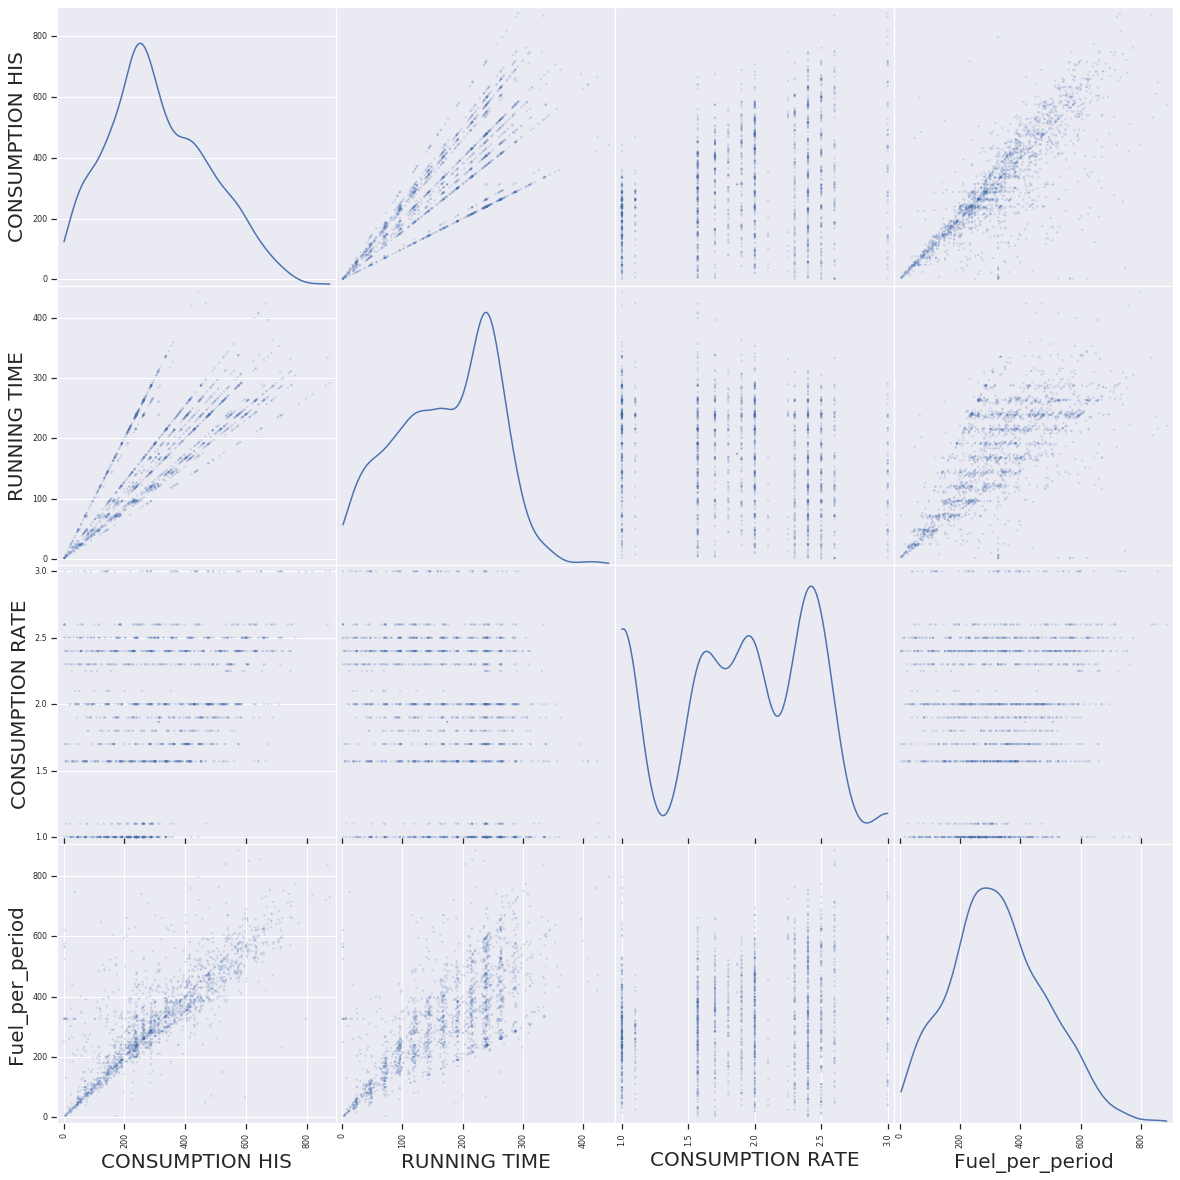

In [59]:
from pandas.plotting import scatter_matrix
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 35
plt.rcParams['ytick.labelsize'] = 35
df=df[['CONSUMPTION HIS',
       'RUNNING TIME','CONSUMPTION RATE','Fuel_per_period']]
ax1=scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal='kde')
# plt.ylabel(size=20)
# plt.xlabel(size=20)
ax1.set_ylabel(fontsize=20)
ax1 = sns.distplot(kk,fit=norm, kde=True, norm_hist=True);
(mu, sigma) = norm.fit(kk);
ax1.set_title(fontsize=23)
ax1.set_ylabel(fontsize=20)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax1.set_xlabel(r'Running time',fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)

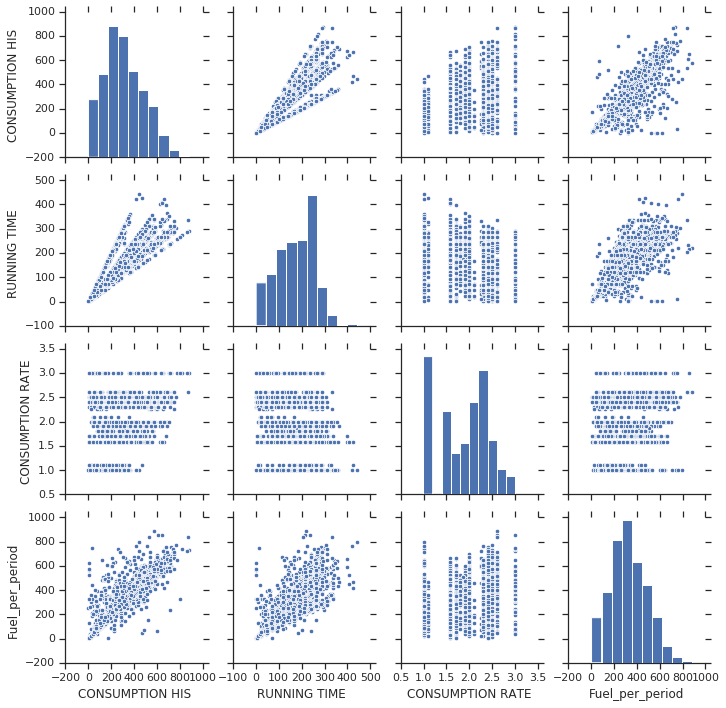

In [60]:
import seaborn as sns
sns.set(style="ticks")

#df = sns.load_dataset("iris")
sns.pairplot(df)

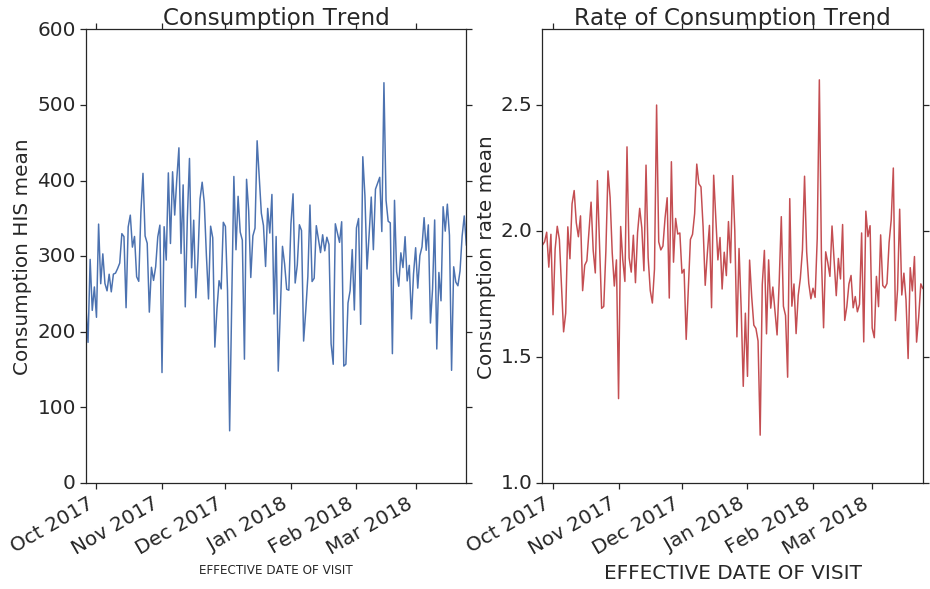

In [61]:
# fig = plt.figure(size=(10,12))
#plt.figure(figsize=(10,4))
#plt.subplot(121)
t1=Clusters.pivot_table('CONSUMPTION HIS', index='EFFECTIVE DATE OF VISIT', aggfunc='mean')

#plt.subplot(122)
t2=Clusters.pivot_table('CONSUMPTION RATE', index='EFFECTIVE DATE OF VISIT', aggfunc='mean')
t1= t1.squeeze()
t2= t2.squeeze()
fig = plt.figure(figsize=(15,9))

ax1 = fig.add_subplot(121)
plt.ylabel('Consumption HIS mean',size=20)
plt.rcParams['axes.labelsize'] =20
plt.title("Consumption Trend",size=23)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
t1.plot()

ax2 = fig.add_subplot(122)

plt.ylabel('Consumption rate mean',size=20)
plt.rcParams['axes.labelsize'] =20
plt.title("Rate of Consumption Trend",size=23)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
t2.plot(color='r')
plt.savefig('Compare_Consumption_and_Consumption_Rate_time1.png')




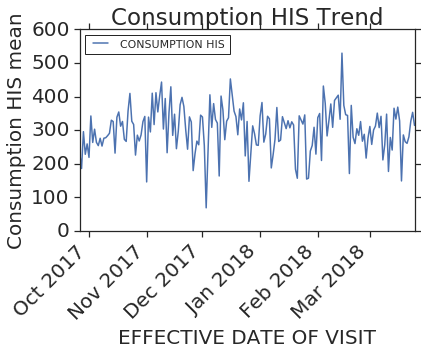

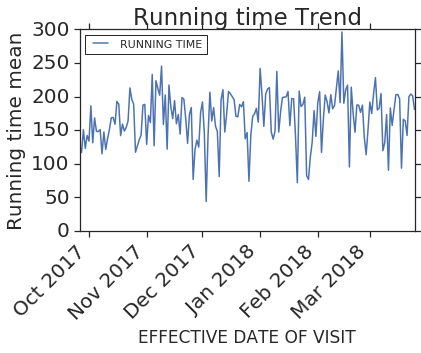

In [62]:
Clusters.pivot_table('CONSUMPTION HIS', index='EFFECTIVE DATE OF VISIT', aggfunc='mean').plot()
plt.ylabel('Consumption HIS mean',size=20)
plt.rcParams['axes.labelsize'] =17
plt.title("Consumption HIS Trend",size=23)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
plt.hold(True)
Clusters.pivot_table('RUNNING TIME', index='EFFECTIVE DATE OF VISIT', aggfunc='mean').plot()
plt.ylabel('Running time mean',size=20)
plt.rcParams['axes.labelsize'] =17
plt.title("Running time Trend",size=23)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
plt.savefig('Compare_Consumption_and_running_time.png')

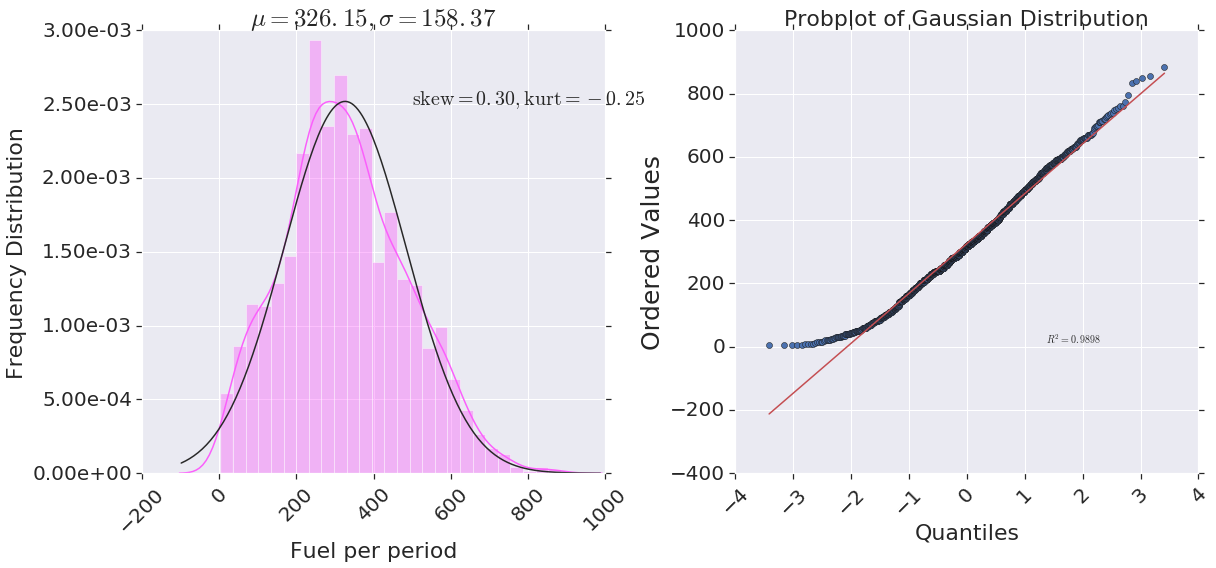

In [63]:
kk = Clusters['Fuel_per_period'].dropna()
import matplotlib.ticker as mtick
from scipy import stats
from scipy.stats import skew,norm
import seaborn; seaborn.set()
%matplotlib inline

fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(121)
# kernel density plotsome scatter
ax1 = sns.distplot(kk,fit=norm, kde=True,color='#fb5ffc', norm_hist=True);
(mu, sigma) = norm.fit(kk);
ax1.set_title(r'$\mu = %0.2f, \sigma = %0.2f$' %(mu, sigma), fontsize=25)
ax1.set_ylabel(r'Frequency Distribution',fontsize=22)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax1.set_xlabel(r'Fuel per period',fontsize=22)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
plt.text(x=500, y= 2.5e-03, s=r'$\rm skew = %0.2f, kurt = %0.2f$' %(kk.skew(), 
                                kk.kurt()), fontdict=None, withdash=False, fontsize=20)

ax = fig.add_subplot(122)
res = stats.probplot(kk, plot=plt,rvalue=True,)
ax.set_title(r'Probplot of Gaussian Distribution',fontsize=22)
ax.set_ylabel(r'Ordered Values', fontsize=25)
ax.set_xlabel(r'Quantiles', fontsize=22)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
plt.tight_layout()
plt.savefig('Distribution_of_Fuel_per_period.png')

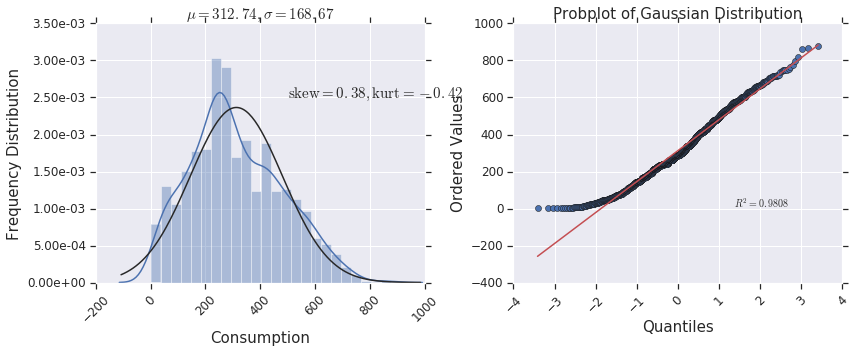

In [64]:
kk = Clusters['CONSUMPTION HIS'].dropna()
import matplotlib.ticker as mtick
from scipy import stats
from scipy.stats import skew,norm
import seaborn; seaborn.set()
%matplotlib inline

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
# kernel density plotsome scatter
ax1 = sns.distplot(kk,fit=norm, kde=True, norm_hist=True);
(mu, sigma) = norm.fit(kk);
ax1.set_title(r'$\mu = %0.2f, \sigma = %0.2f$' %(mu, sigma), fontsize=15)
ax1.set_ylabel(r'Frequency Distribution',fontsize=15)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax1.set_xlabel(r'Consumption',fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=None)
plt.text(x=500, y= 2.5e-03, s=r'$\rm skew = %0.2f, kurt = %0.2f$' %(kk.skew(), 
                                                                kk.kurt()), fontdict=None, withdash=False, fontsize=15)

ax = fig.add_subplot(122)
res = stats.probplot(kk, plot=plt,rvalue=True)
ax.set_title(r'Probplot of Gaussian Distribution',fontsize=15)
ax.set_ylabel(r'Ordered Values', fontsize=15)
ax.set_xlabel(r'Quantiles', fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=None)
plt.tight_layout()


In [65]:
Clusters['CONSUMPTION HIS'].sum()

675826.7939108213

In [66]:
(52938.31/675826.79)*100

7.833118009423686

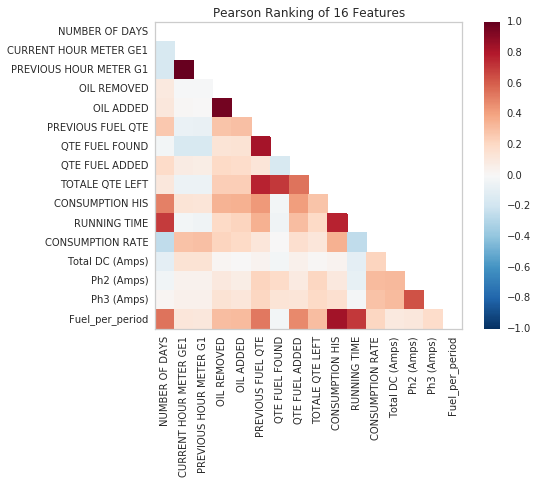

In [67]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(num)
visualizer.poof()

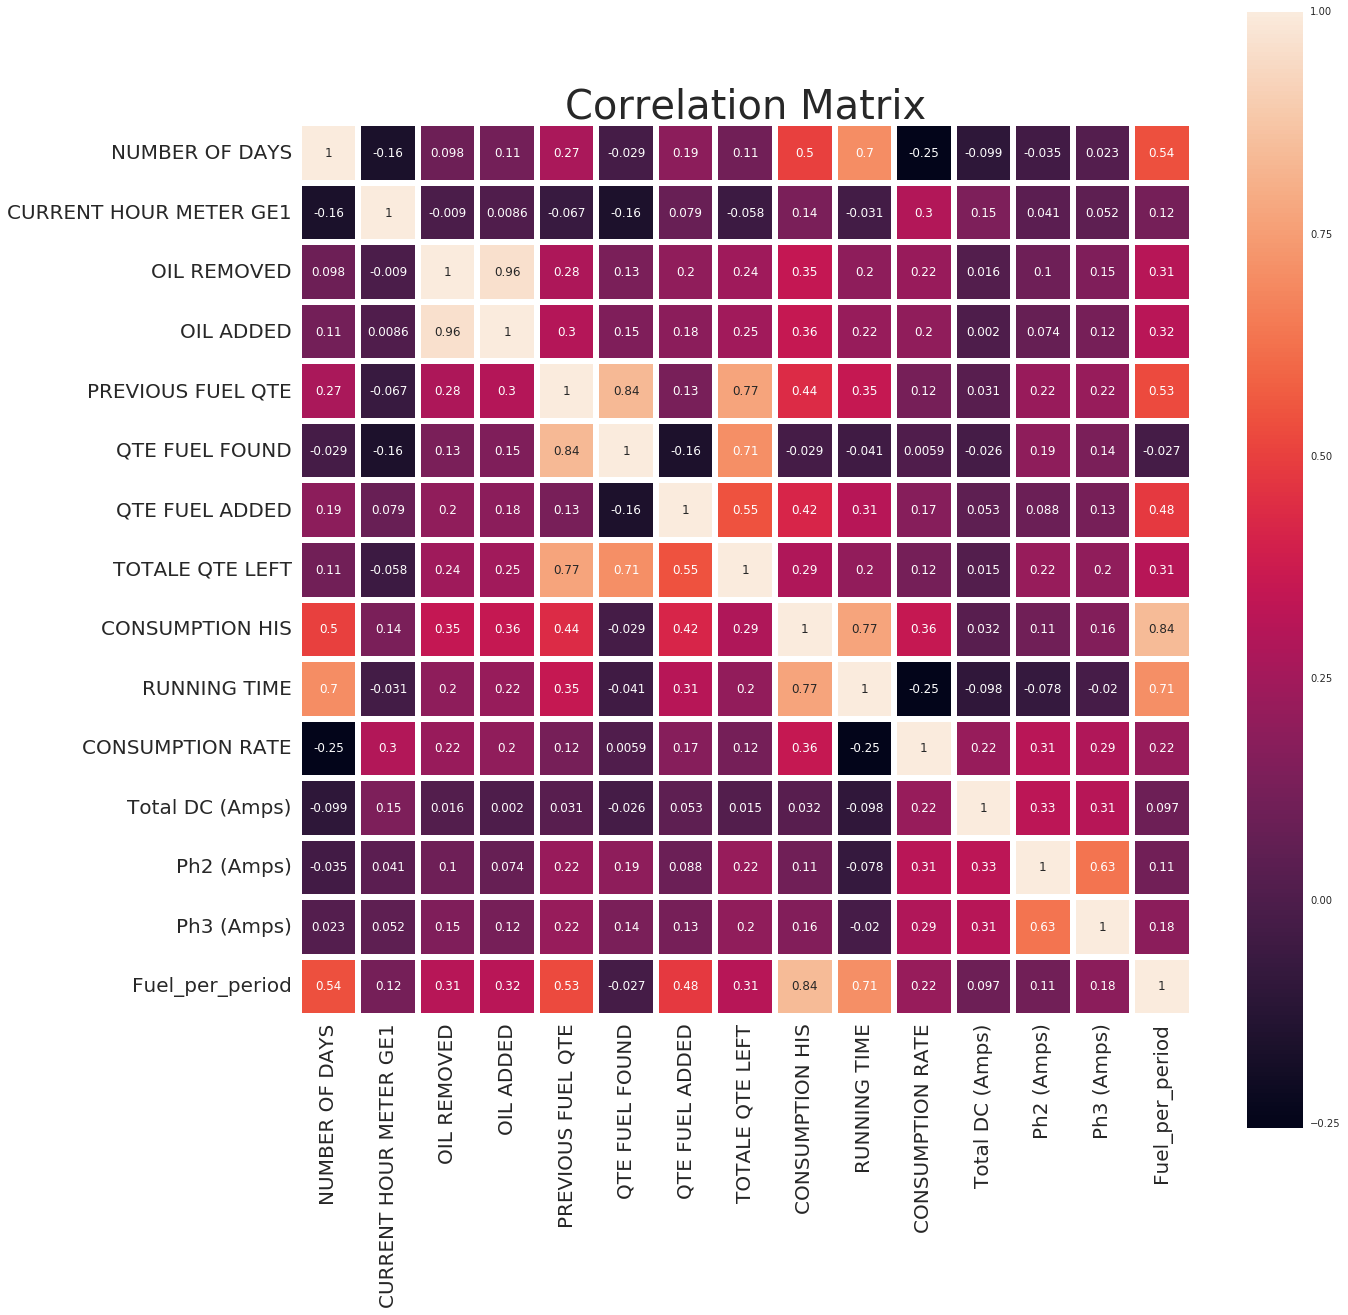

In [68]:
num=num.drop(['PREVIOUS HOUR METER G1'], axis=1)
correlation=num.corr()
plt.figure(figsize = (20,20))  
plt.title("Correlation Matrix", fontsize= 40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20, rotation=None)

sns.heatmap(correlation, vmax=1, square=True,  linewidths=5,annot=True)  
plt.show()

In [69]:
features['CONSUMPTION HIS'].std()

168.7209340814209

# From the Correlation matrix we can see Feul_per_period and RUNNING have an impact on CONSUMPTION HIS

# Features selections

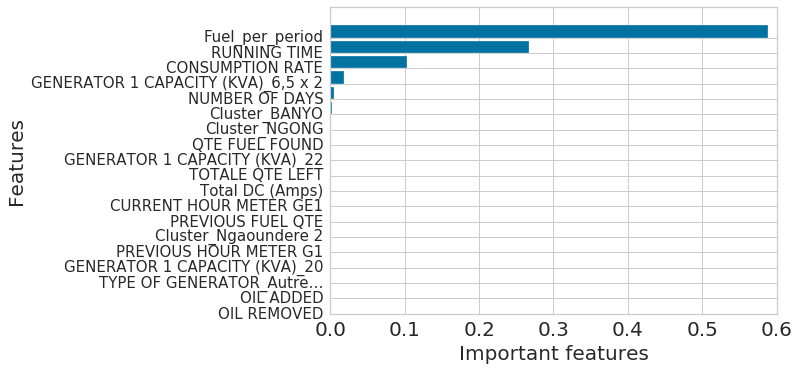

In [70]:
Y=features['CONSUMPTION HIS']
XX=features.drop(['CONSUMPTION HIS'],axis=1)
#XX=XX.drop(['Fuel_per_period'],axis=1)

#Y=data_all_var["Normal_cons_HIS"]
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(XX,Y)
imp_feat, names0 = zip(*sorted(zip(clf.feature_importances_, XX.columns)))
topN=19
imp_feat, names = imp_feat[len(names0)-topN:], names0[len(names0)-topN:]
plt.barh(range(len(names)), imp_feat) #, align = 'center')
plt.xticks(size=20)
plt.yticks(range(len(names)), names,size=15)
plt.xlabel("Important features",size=20)
plt.ylabel("Features",size=20)
plt.show()
plt.savefig('Distribution_of_Fuel_per_period.png')

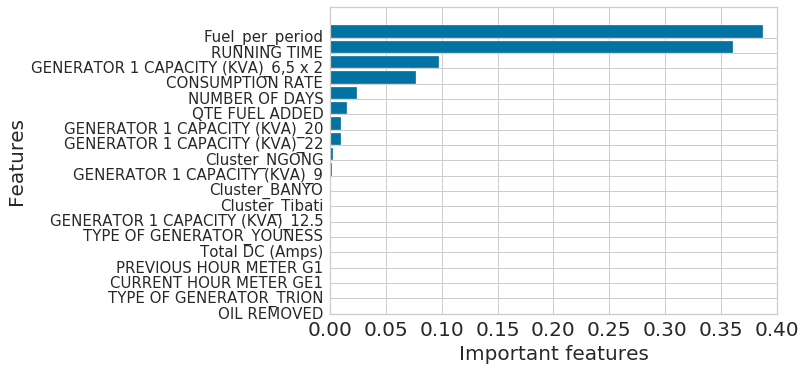

In [71]:
Y=features['CONSUMPTION HIS']
XX=features.drop(['CONSUMPTION HIS'],axis=1)
#XX=XX.drop(['Fuel_per_period'],axis=1)

#Y=data_all_var["Normal_cons_HIS"]
from sklearn.ensemble import ExtraTreesRegressor
clf = ExtraTreesRegressor()
clf.fit(XX,Y)
imp_feat, names0 = zip(*sorted(zip(clf.feature_importances_, XX.columns)))
topN=19
imp_feat, names = imp_feat[len(names0)-topN:], names0[len(names0)-topN:]
plt.barh(range(len(names)), imp_feat) #, align = 'center')
plt.xticks(size=20)
plt.yticks(range(len(names)), names,size=15)
plt.xlabel("Important features",size=20)
plt.ylabel("Features",size=20)
plt.show()
plt.savefig('Distribution_of_Fuel_per_period.png')

# The features selection with random forest show Feul_per_period, RUNNING TIME and CONSUPTION RATE are the most important variable 

In [72]:
Data=features[['Fuel_per_period','RUNNING TIME','CONSUMPTION RATE', 'NUMBER OF DAYS','OIL ADDED',
               'GENERATOR 1 CAPACITY (KVA)_6,5 x 2',]]  #We select only the most important features to
                                                          # train our models

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

In [74]:

X=Data
Y=features['CONSUMPTION HIS']
validation_size = 0.25
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=validation_size, random_state=seed)
# Test options and evaluation metric
num_folds = 10

#Spot-Check Algorithms
models = []
models.append(('LR',LinearRegression()))
models.append(('RF',RandomForestRegressor()))
models.append(('Gbt',GradientBoostingRegressor()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('ETR',ExtraTreesRegressor()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('AdR',AdaBoostRegressor()))
models.append(('MLP',MLPRegressor()))
models.append(('Lasso',Lasso()))
models.append(('El_Net',ElasticNet()))

#models.append(('LogR',LogisticRegression()))

# clf=RandomForestRegressor()
# pred=clf.fit(X_test,Y_test)
# predicted=clf.predict(X_test)
results=[]
names=[]
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)
    #plt.plot(cv_results)

LR: 0.937711 (0.011847)
RF: 0.980957 (0.013626)
Gbt: 0.990007 (0.007196)
KNN: 0.838187 (0.031422)
ETR: 0.990653 (0.007816)
DTR: 0.963877 (0.023051)
AdR: 0.927104 (0.009701)
MLP: 0.884952 (0.024089)
Lasso: 0.937371 (0.012090)
El_Net: 0.867541 (0.027407)


# Metrics using 10-fold cross validations

In [75]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
kfold = KFold(n_splits=10, random_state=42)
mod1=RandomForestRegressor(random_state=42)
mod2=MLPRegressor(random_state=42)
mod3=GradientBoostingRegressor(random_state=42)
mod4=Lasso()
scoring = 'r2'

results1 = cross_val_score(mod1,X, Y, cv=kfold, scoring=scoring)
results2 = cross_val_score(mod2,X, Y, cv=kfold, scoring=scoring)
results3 = cross_val_score(mod3,X, Y, cv=kfold, scoring=scoring)
results4 = cross_val_score(mod4,X, Y, cv=kfold, scoring=scoring)

results11 = cross_val_score(mod1,X, Y, cv=kfold, scoring='mean_absolute_error')
results22 = cross_val_score(mod2,X, Y, cv=kfold, scoring='mean_absolute_error')
results33 = cross_val_score(mod3,X, Y, cv=kfold, scoring='mean_absolute_error')
results44 = cross_val_score(mod4,X, Y, cv=kfold, scoring='mean_absolute_error')


results111 = cross_val_score(mod1,X, Y, cv=kfold, scoring='mean_squared_error')
results222 = cross_val_score(mod2,X, Y, cv=kfold, scoring='mean_squared_error')
results333 = cross_val_score(mod3,X, Y, cv=kfold, scoring='mean_squared_error')
results444 = cross_val_score(mod4,X, Y, cv=kfold, scoring='mean_squared_error')


print("R Squared of RF: %.3f (%.3f)" % (results1.mean(), results1.std()))
print("R Squared of MLP: %.3f (%.3f)" % (results2.mean(), results2.std()))
print("R Squared of GB: %.3f (%.3f)" % (results3.mean(), results3.std()))
print("R Squared of Las: %.3f (%.3f)" % (results4.mean(), results4.std()))

print("MAE of RF: %.3f (%.3f)" % (results11.mean(), results1.std()))
print("MAE of MLP: %.3f (%.3f)" % (results22.mean(), results2.std()))
print("MAE of GB: %.3f (%.3f)" % (results33.mean(), results3.std()))
print("MAE of Las: %.3f (%.3f)" % (results44.mean(), results4.std()))

print("MSE of RF: %.3f (%.3f)" % (results111.mean(), results1.std()))
print("MSE of MLP: %.3f (%.3f)" % (results222.mean(), results2.std()))
print("MSE of GB: %.3f (%.3f)" % (results333.mean(), results3.std()))
print("MSE of Las: %.3f (%.3f)" % (results444.mean(), results4.std()))

/home/gabin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/gabin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/gabin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/gabin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weig

/home/gabin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/gabin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/gabin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/gabin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/hom

R Squared of RF: 0.977 (0.017)
R Squared of MLP: 0.892 (0.026)
R Squared of GB: 0.986 (0.016)
R Squared of Las: 0.931 (0.021)
MAE of RF: -10.949 (0.017)
MAE of MLP: -36.381 (0.026)
MAE of GB: -10.508 (0.016)
MAE of Las: -30.994 (0.021)
MSE of RF: -697.875 (0.017)
MSE of MLP: -3039.192 (0.026)
MSE of GB: -377.225 (0.016)
MSE of Las: -1931.553 (0.021)


/home/gabin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/gabin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/gabin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/gabin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/hom

 # EVALUATION OF PREDICTION ACCURACY

# Metrics for Random Forest Trained


In [76]:
from sklearn.model_selection import train_test_split
#We set a random seed to be 42 to ensure consistent results across runs.
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20, random_state = 42)
RF =RandomForestRegressor(random_state = 42)
RF.fit(X_train,y_train) # we train the model
# Make predictions on test data using the model trained 
predictions = RF.predict(X_test)
# Performance metrics
errors = abs(predictions - y_test)

n=len(y_test)
#we compute the Bias
bias=sum(predictions - y_test)/n

p=sum((predictions - y_test)**2)
y_test_bar=sum(y_test)/len(y_test) 
q=sum((y_test-y_test_bar)**2)
# Nash-stucliffe efficiency 
NSE=1-(p/q)

#Root Mean-Squared Error
RMSE=np.sqrt(p/n)

print('Metrics for Random Forest Trained on the 6 month Data (generator only)')
print('The Bias :',bias)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
print('Root Mean-Squared Error:',RMSE)
print('The Nash-Sutcliffe Efficiency :',NSE)
# Calculate mean absolute percentage error (MAPE)
l=y_test.index.values #to collect the index of y_test
#for i in l:
    #if y_test[i]==0:
#mape = 100 * (errors/ y_test)
mm=errors / y_test
mape = np.mean(mm)
MAPE=100*(mape)
    #else:
    #mape = 100 * (errors[i]/ y_test[i]) 
print('The Mean Absolute Percentage Error:', round(MAPE, 2), '%.' )       
# Calculate and display accuracy
accuracy = 100 -MAPE
print('Accuracy:', round(accuracy, 2), '%.')



Metrics for Random Forest Trained on the 6 month Data (generator only)
The Bias : -1.13323289101
Average absolute error: 7.29 degrees.
Root Mean-Squared Error: 14.8406298446
The Nash-Sutcliffe Efficiency : 0.992157099957
The Mean Absolute Percentage Error: 4.47 %.
Accuracy: 95.53 %.


# Metrics for Gradient Boosting Trained

In [77]:
from sklearn.model_selection import train_test_split
#We set a random seed to be 42 to ensure consistent results across runs.
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state = 42)
GB =GradientBoostingRegressor(random_state = 42)
GB.fit(X_train,y_train) # we train the model
# Make predictions on test data using the model trained 
predictions = GB.predict(X_test)
# Performance metrics
errors = abs(predictions - y_test)

n=len(y_test)
#we compute the Bias
bias=sum(predictions - y_test)/n

p=sum((predictions - y_test)**2)
y_test_bar=sum(y_test)/len(y_test) 
q=sum((y_test-y_test_bar)**2)
# Nash-stucliffe efficiency 
NSE=1-(p/q)

#Root Mean-Squared Error
RMSE=np.sqrt(p/n)

print('Metrics for Gradient Boosting Trained on the 6 month Data (generator only)')
print('The Bias :',bias)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
print('Root Mean-Squared Error:',RMSE)
print('The Nash-Sutcliffe Efficiency :',NSE)
# Calculate mean absolute percentage error (MAPE)
l=y_test.index.values #to collect the index of y_test
#for i in l:
   # if y_test[i]==0:
# mape = 100 * (errors / y_test)
# MAPE=np.mean(mape)
mm=errors / y_test
mape = np.mean(mm)
MAPE=100*(mape)
#    else:
 #       mape = 100 * (errors[i]/ y_test[i]) 
print('The Mean Absolute Percentage Error:', round(MAPE, 2), '%.' )      
# Calculate and display accuracy
accuracy = 100 - MAPE
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Gradient Boosting Trained on the 6 month Data (generator only)
The Bias : -1.10627354195
Average absolute error: 9.19 degrees.
Root Mean-Squared Error: 14.7312128383
The Nash-Sutcliffe Efficiency : 0.99227232191
The Mean Absolute Percentage Error: 4.12 %.
Accuracy: 95.88 %.


# Metrics for Neural Networt  Trained


In [78]:
#from sklearn.model_selection import train_test_split
#We set a random seed to be 42 to ensure consistent results across runs.
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state = 42)
MLP=MLPRegressor(random_state = 42)
MLP.fit(X_train,y_train) # we train the model
# Make predictions on test data using the model trained 
predictions = MLP.predict(X_test)
# Performance metrics
errors = abs(predictions - y_test)

n=len(y_test)
#we compute the Bias
bias=sum(predictions - y_test)/n

p=sum((predictions - y_test)**2)
y_test_bar=sum(y_test)/len(y_test) 
q=sum((y_test-y_test_bar)**2)
# Nash-stucliffe efficiency 
NSE=1-(p/q)

#Root Mean-Squared Error
RMSE=np.sqrt(p/n)

print('Metrics for Neural Network Trained on the 6 month Data (generator only)')
print('The Bias :',bias)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
print('Root Mean-Squared Error:',RMSE)
print('The Nash-Sutcliffe Efficiency :',NSE)

# Calculate mean absolute percentage error (MAPE)
l=y_test.index.values #to collect the index of y_test
#for i in l:
   # if y_test[i]==0:
# mape = 100 * (errors / y_test)
# MAPE=np.mean(mape)
mm=errors / y_test
mape = np.mean(mm)
MAPE=100*(mape)
#    else:
 #       mape = 100 * (errors[i]/ y_test[i]) 
print('The Mean Absolute Percentage Error:', round(MAPE, 2), '%.' )      
# Calculate and display accuracy
accuracy = 100 - MAPE
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Neural Network Trained on the 6 month Data (generator only)
The Bias : 0.462897039732
Average absolute error: 35.4 degrees.
Root Mean-Squared Error: 53.3800256001
The Nash-Sutcliffe Efficiency : 0.898531890388
The Mean Absolute Percentage Error: 15.14 %.
Accuracy: 84.86 %.


# Metrics for Lasso

In [79]:
from sklearn.model_selection import train_test_split
#We set a random seed to be 42 to ensure consistent results across runs.
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state = 42)
Las=Lasso()
Las.fit(X_train,y_train) # we train the model
# Make predictions on test data using the model trained 
predictions = Las.predict(X_test)
# Performance metrics
errors = abs(predictions - y_test)

n=len(y_test)
#we compute the Bias
bias=sum(predictions - y_test)/n

p=sum((predictions - y_test)**2)
y_test_bar=sum(y_test)/len(y_test) 
q=sum((y_test-y_test_bar)**2)
# Nash-stucliffe efficiency 
NSE=1-(p/q)

#Root Mean-Squared Error
RMSE=np.sqrt(p/n)

print('Metrics for Lasso Trained on the 6 month Data (generator only)')
print('The Bias :',bias)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
print('Root Mean-Squared Error:',RMSE)
print('The Nash-Sutcliffe Efficiency :',NSE)

# Calculate mean absolute percentage error (MAPE)
l=y_test.index.values #to collect the index of y_test
#for i in l:
   # if y_test[i]==0:
# mape = 100 * (errors / y_test)
# MAPE=np.mean(mape)

mm=errors / y_test
mape = np.mean(mm)
MAPE=100*(mape)
#    else:
 #       mape = 100 * (errors[i]/ y_test[i]) 
print('The Mean Absolute Percentage Error:', round(MAPE, 2), '%.' )      
# Calculate and display accuracy
accuracy = 100 - MAPE
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Lasso Trained on the 6 month Data (generator only)
The Bias : -1.12107434801
Average absolute error: 29.23 degrees.
Root Mean-Squared Error: 40.8675188716
The Nash-Sutcliffe Efficiency : 0.940525807033
The Mean Absolute Percentage Error: 54.1 %.
Accuracy: 45.9 %.


# Hyperparameter Tuning on our Models

In [80]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In oder to use RandomizedSearchCV, we first create a parameter grid to sample from during fitting:

In [81]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000]}


 The benefit of a random search is the fact that we are not trying every combination, but selecting at random to sample a wide range of values.

# Random Search Training
 We instantiate the random search and focus on main 
 arguments in RandomizedSearchCV which are n_iter, that controls the number of different combinations to try, and cv which is the number of folds to use for cross validation. 

Random forest

In [82]:
import time  
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 10,
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
print("--This code take %s minute(s) to run--" % ((time.time() - start_time)/60))

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[CV] n_estimators=120, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=120, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=120, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=120, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.4s
[CV]  n_estimators=120, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.4s
[CV] n_estimators=120, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=120, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=   7.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.6s


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=   7.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=   6.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=   6.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=   6.7s
[CV] n_estimators=780, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=100

[CV]  n_estimators=450, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, total=   2.0s
[CV] n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   0.9s
[CV] n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   1.0s
[CV] n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=450, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, total=   1.9s
[CV] n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=450, mi

[CV]  n_estimators=120, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True, total=   0.8s
[CV] n_estimators=120, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=890, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=   6.7s
[CV] n_estimators=120, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=890, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=   7.2s
[CV] n_estimators=120, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True, total=   0.8s
[CV] n_estimators=120, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=120, min_

[CV]  n_estimators=780, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   2.9s
[CV] n_estimators=780, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=780, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   2.9s
[CV] n_estimators=340, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=780, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   3.0s
[CV] n_estimators=340, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=780, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   3.0s
[CV] n_estimators=340, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=780, m

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min


[CV]  n_estimators=890, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   5.8s
[CV] n_estimators=890, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=890, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   5.6s
[CV]  n_estimators=890, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   6.3s
[CV] n_estimators=890, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV] n_estimators=230, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=890, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   6.6s
[CV] n_estimators=230, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=230, min_

[CV]  n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=   1.4s
[CV] n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=   1.5s
[CV] n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=   1.2s
[CV] n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=   1.2s
[CV] n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=230, min_samples_

[CV]  n_estimators=670, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=   2.2s
[CV] n_estimators=670, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=670, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=   2.2s
[CV] n_estimators=670, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=670, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=   2.2s
[CV] n_estimators=670, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=670, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=   2.2s
[CV] n_estimators=670, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=670, min_samples_

[CV]  n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.5s
[CV] n_estimators=670, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.5s
[CV]  n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.6s
[CV] n_estimators=670, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False 
[CV] n_estimators=670, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.5s
[CV] n_estimators=670, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=6

[CV]  n_estimators=560, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   1.9s
[CV] n_estimators=560, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=560, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   2.0s
[CV] n_estimators=560, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   6.0s
[CV] n_estimators=560, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=560, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   2.2s
[CV] n_estimators=560, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_sam

[CV]  n_estimators=340, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False, total=   1.5s
[CV] n_estimators=340, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=340, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False, total=   1.7s
[CV] n_estimators=340, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=340, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False, total=   1.5s
[CV] n_estimators=340, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=340, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False, total=   1.6s
[CV] n_estimators=340, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=340

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.4min


[CV]  n_estimators=340, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.2s
[CV] n_estimators=560, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=340, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.1s
[CV] n_estimators=560, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=340, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.1s
[CV] n_estimators=560, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=560, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   1.7s
[CV] n_estimators=560, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=560, min_sa

[CV]  n_estimators=450, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   1.4s
[CV] n_estimators=450, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=450, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   1.4s
[CV] n_estimators=450, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=450, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   1.4s
[CV] n_estimators=450, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=450, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   1.4s
[CV] n_estimators=450, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=450, min_samples_

[CV]  n_estimators=340, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   0.9s
[CV] n_estimators=340, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=340, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   0.9s
[CV] n_estimators=120, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=340, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   1.0s
[CV] n_estimators=120, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   0.3s
[CV] n_estimators=120, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=120, min_samp

[CV]  n_estimators=450, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   1.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   4.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   4.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   4.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min

[CV]  n_estimators=230, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, total=   0.9s
[CV] n_estimators=230, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False 
[CV]  n_estimators=230, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, total=   0.9s
[CV] n_estimators=230, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False 
[CV]  n_estimators=230, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, total=   0.9s
[CV] n_estimators=230, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False 
[CV]  n_estimators=230, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, total=   0.8s
[CV] n_estimators=890, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=23

[CV] n_estimators=450, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=450, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   6.7s
[CV] n_estimators=450, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=450, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   2.8s
[CV] n_estimators=450, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=450, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   2.9s
[CV] n_estimators=450, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=450, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=   2.9s
[CV] n_estimators=450, mi

[CV] n_estimators=780, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=780, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   4.3s
[CV] n_estimators=780, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=780, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   4.2s
[CV] n_estimators=780, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=780, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   4.3s
[CV] n_estimators=780, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=780, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   4.1s
[CV] n_estimators=780, min_samples_s

[CV] n_estimators=670, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=670, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True, total=   2.2s
[CV] n_estimators=670, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=670, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True, total=   2.2s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.0s
[CV] n_estimators=10, min_samples_sp

[CV] n_estimators=560, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=450, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total=   2.9s
[CV] n_estimators=560, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=560, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   3.7s
[CV] n_estimators=560, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=560, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   4.0s
[CV] n_estimators=560, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=560, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   3.8s
[CV] n

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  7.4min


[CV]  n_estimators=780, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   2.9s
[CV] n_estimators=780, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=780, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   2.9s
[CV] n_estimators=780, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=780, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   3.1s
[CV] n_estimators=780, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=780, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   3.4s
[CV] n_estimators=780, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=780, min_

[CV]  n_estimators=670, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True, total=   3.9s
[CV] n_estimators=670, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=670, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True, total=   3.8s
[CV] n_estimators=670, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=670, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True, total=   3.8s
[CV] n_estimators=450, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=670, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True, total=   3.6s
[CV] n_estimators=450, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=670, min_samp

[CV] n_estimators=340, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=340, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.5s
[CV] n_estimators=340, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=340, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.5s
[CV] n_estimators=340, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=670, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total=   2.9s
[CV] n_estimators=340, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=670, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total=   2.8s
[CV] n_estimators=340, min_s

[CV] n_estimators=780, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=780, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total=   5.8s
[CV] n_estimators=780, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=780, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total=   6.0s
[CV] n_estimators=780, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=780, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total=   4.7s
[CV] n_estimators=780, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=780, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total=   4.7s
[CV] n_estimators=780, min_samples_s

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   3.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   3.8s
[CV] n_estimators=450, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   3.8s
[CV] n_estimators=450, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=450, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.6s
[CV] n_estimators=450, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=450, min_

[CV]  n_estimators=230, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total=   1.1s
[CV] n_estimators=230, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=230, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total=   1.2s
[CV] n_estimators=230, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=230, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total=   1.3s
[CV] n_estimators=230, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=230, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total=   1.3s
[CV] n_estimators=230, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=2

[CV] n_estimators=340, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=340, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   1.4s
[CV] n_estimators=340, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=340, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   1.3s
[CV] n_estimators=340, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=340, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   1.4s
[CV] n_estimators=340, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=340, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   1.6s
[CV] n_estimators=230, min_s

[CV] n_estimators=340, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=780, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=   2.9s
[CV] n_estimators=340, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=340, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total=   1.1s
[CV] n_estimators=340, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=340, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total=   1.1s
[CV] n_estimators=340, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=340, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total=   1.1s
[CV] n_estimators=340,

[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   3.6s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   3.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   4.2s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   3.9s
[CV]

[CV] n_estimators=230, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=230, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total=   0.9s
[CV] n_estimators=230, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=230, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total=   0.9s
[CV] n_estimators=120, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=230, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total=   1.0s
[CV] n_estimators=120, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=230, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total=   0.9s
[CV] n_estimators=120, min

[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=450, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=   3.0s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   3.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   3.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   3.8s
[CV] n_estimators=1000, min_

[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 11.6min


[CV]  n_estimators=670, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True, total=   3.9s
[CV] n_estimators=670, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True 
[CV]  n_estimators=670, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True, total=   4.3s
[CV] n_estimators=120, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.4s
[CV] n_estimators=120, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=670, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True, total=   3.8s
[CV] n_estimators=120, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=670, min_samp

[CV]  n_estimators=890, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total=   4.0s
[CV] n_estimators=890, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True 
[CV]  n_estimators=890, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True, total=   6.6s
[CV] n_estimators=890, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True 
[CV]  n_estimators=890, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True, total=   6.6s
[CV] n_estimators=890, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True 
[CV]  n_estimators=890, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True, total=   6.9s
[CV] n_estimators=890, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True 
[CV]  n_estimators=890, min_samples

[CV]  n_estimators=780, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True, total=   3.0s
[CV] n_estimators=780, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=780, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True, total=   3.6s
[CV] n_estimators=780, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=780, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True, total=   3.4s
[CV] n_estimators=780, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=780, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True, total=   3.4s
[CV] n_estimators=340, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=780, min_sample

[CV]  n_estimators=120, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False, total=   0.5s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=False 
[CV]  n_estimators=120, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False, total=   0.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=False 
[CV]  n_estimators=120, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False, total=   0.6s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=False, total=   4.2s
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=False, total=   3.8

[CV] n_estimators=780, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=780, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   3.5s
[CV] n_estimators=780, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=780, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   3.5s
[CV] n_estimators=780, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=780, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   3.7s
[CV] n_estimators=780, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=780, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   3.2s
[CV] n_estimators=780, min_s

[CV] n_estimators=890, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=890, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total=   3.7s
[CV] n_estimators=890, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=890, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total=   3.8s
[CV] n_estimators=560, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=890, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total=   3.8s
[CV] n_estimators=560, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=890, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total=   3.3s
[CV] n_estimators=560,

[CV] n_estimators=340, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=340, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False, total=   1.6s
[CV] n_estimators=340, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=340, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False, total=   1.4s
[CV] n_estimators=340, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=340, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False, total=   1.2s
[CV] n_estimators=340, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=780, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=False, total=   5.5s
[CV] n_estimators=340

[CV] n_estimators=560, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=560, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=False, total=   4.0s
[CV] n_estimators=560, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=560, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=False, total=   3.9s
[CV] n_estimators=560, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=560, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=False, total=   4.2s
[CV] n_estimators=560, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=560, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=False, total=   4.0s
[CV] n_estim

[CV]  n_estimators=670, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   0.7s
[CV] n_estimators=450, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=670, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   1.0s
[CV] n_estimators=450, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=670, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   0.6s
[CV] n_estimators=450, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=670, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   0.6s
[CV] n_estimators=450, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=450, 

[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False, total=   6.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False, total=   7.0s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False, total=   7.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False, total=   7.1s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_esti

[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total=   0.0s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total=   0.1s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total=   0.1s
[CV] n_estimators=450, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total=   0.1s
[CV] n_estimators=450, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=890, min_sample

[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.1s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True, total=   0.8s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.1s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2,

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True, total=   5.9s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True, total=   5.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True, total=   6.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True, total=   5.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True 
[CV]  n_estimators=1

[CV] n_estimators=890, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False 
[CV] n_estimators=450, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=890, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False, total=   6.5s
[CV] n_estimators=450, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=450, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, total=   2.4s
[CV] n_estimators=450, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=450, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, total=   2.2s
[CV] n_estimators=450, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 


[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 17.4min


[CV]  n_estimators=450, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, total=   2.2s
[CV] n_estimators=450, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=450, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, total=   2.3s
[CV] n_estimators=450, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=890, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False, total=   6.8s
[CV] n_estimators=450, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=890, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False, total=   7.0s
[CV] n_estimators=450, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=450, mi

[CV]  n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False, total=   1.9s
[CV] n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False, total=   2.0s
[CV] n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False, total=   2.0s
[CV] n_estimators=560, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False, total=   2.1s
[CV] n_estimators=560, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=230, mi

[CV]  n_estimators=450, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=True, total=   1.7s
[CV] n_estimators=890, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=450, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=True, total=   1.8s
[CV] n_estimators=890, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=890, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False, total=   5.8s
[CV] n_estimators=890, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=890, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False, total=   6.0s
[CV] n_estimators=890, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=890, min_sa

[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True, total=   5.5s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True, total=   5.6s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True, total=   5.2s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True, total=   5.8s
[CV] n_estimators=1000, min_

[CV]  n_estimators=450, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, total=   3.9s
[CV] n_estimators=450, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=450, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, total=   4.1s
[CV] n_estimators=780, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=450, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, total=   4.2s
[CV] n_estimators=780, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=450, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, total=   4.1s
[CV] n_estimators=780, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=450, min_sam

[CV]  n_estimators=120, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.4s
[CV] n_estimators=120, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.4s
[CV] n_estimators=120, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.4s
[CV]  n_estimators=120, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.4s
[CV] n_estimators=120, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=120, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=120, min_

[CV]  n_estimators=120, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=   0.6s
[CV] n_estimators=120, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=   0.7s
[CV] n_estimators=120, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=   0.7s
[CV] n_estimators=120, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=   0.6s
[CV] n_estimators=450, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=120, min_

[CV]  n_estimators=890, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True, total=   4.2s
[CV] n_estimators=120, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True, total=   0.7s
[CV] n_estimators=120, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True, total=   0.8s
[CV] n_estimators=120, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True, total=   0.7s
[CV] n_estimators=120, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=120, min_samples_

[CV]  n_estimators=890, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=False, total=   5.1s
[CV] n_estimators=890, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=890, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=False, total=   5.1s
[CV] n_estimators=890, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=890, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=False, total=   5.2s
[CV] n_estimators=890, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=890, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=False, total=   5.1s
[CV] n_estimators=890, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=8

[CV] n_estimators=890, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=890, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True, total=   3.3s
[CV] n_estimators=890, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=890, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True, total=   3.3s
[CV] n_estimators=340, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=890, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True, total=   3.1s
[CV] n_estimators=340, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=890, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True, total=   2.9s
[CV] n_estimators=340, min_s

[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.1s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, m

[CV] n_estimators=670, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=670, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=   2.0s
[CV] n_estimators=670, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=670, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=   2.2s
[CV]  n_estimators=670, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=   2.6s
[CV] n_estimators=670, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=670, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=670, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.9s
[CV] n_estimators=120, min_samples_s

[CV] n_estimators=780, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=670, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True, total=   2.0s
[CV] n_estimators=780, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=670, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True, total=   2.0s
[CV] n_estimators=780, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=670, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True, total=   2.2s
[CV] n_estimators=780, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=780, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=True, total=   2.9s
[CV] n_estimators=780, min_s

[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, total=   0.1s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, total=   0.1s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=560, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.6s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, total=   0.1s
[CV] n_estimators=10, min_samples_s

[CV] n_estimators=670, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=670, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=   3.7s
[CV] n_estimators=670, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=670, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=   3.6s
[CV] n_estimators=890, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=670, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=   3.7s
[CV] n_estimators=890, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=890, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   2.7s
[CV] n_estimators=890, min_samp

[CV] n_estimators=890, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False, total=   0.7s
[CV] n_estimators=890, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=890, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=True, total=   2.6s
[CV] n_estimators=890, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=890, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=True, total=   2.6s
[CV] n_estimators=890, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=890, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=True, total=   2.5s
[CV] n_estimators=890, min_s

[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 23.3min


[CV]  n_estimators=230, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.7s
[CV] n_estimators=780, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=230, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.6s
[CV] n_estimators=780, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=230, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.7s
[CV] n_estimators=780, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=780, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=False, total=   4.6s
[CV] n_estimators=780, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=780, mi

[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 23.6min finished


--This code take 33.10471513271332 minute(s) to run--


In [99]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 340}

Gradient Boosting

In [84]:
GB = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(GB.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}


In [90]:
# Create the parameter random_grid 
ramdon_grid={'n_estimators': list(range(100, 1000, 100)),
    'max_depth': list(range(2, 12, 1)),
             'loss': ['ls', 'lad', 'huber'],
             'alpha': list(np.linspace(0.00001, 0.99)),
             'learning_rate': list(np.logspace(np.log(0.005), np.log(0.2), base = np.exp(1), num = 30)),
    'min_samples_leaf': list(range(1, 8, 1))}
import time  
# Use the random grid to search for best hyperparameters
# First create the base model to tune
GB = GradientBoostingRegressor(random_state=42)
# Random search of parameters, using 3 fold cross validation
# search across 100 different combinations
GB_random = RandomizedSearchCV(estimator = GB, param_distributions = ramdon_grid, n_iter = 200, cv = 10,
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search mode
GB_random.fit(X_train, y_train)
print("--This code take %s minute(s) to run--" % ((time.time() - start_time)/60))

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[CV] n_estimators=800, min_samples_leaf=7, max_depth=5, loss=ls, learning_rate=0.00831656136247, alpha=0.78796122449 
[CV] n_estimators=800, min_samples_leaf=7, max_depth=5, loss=ls, learning_rate=0.00831656136247, alpha=0.78796122449 
[CV] n_estimators=800, min_samples_leaf=7, max_depth=5, loss=ls, learning_rate=0.00831656136247, alpha=0.78796122449 
[CV] n_estimators=800, min_samples_leaf=7, max_depth=5, loss=ls, learning_rate=0.00831656136247, alpha=0.78796122449 
[CV]  n_estimators=800, min_samples_leaf=7, max_depth=5, loss=ls, learning_rate=0.00831656136247, alpha=0.78796122449, total=   1.7s
[CV] n_estimators=800, min_samples_leaf=7, max_depth=5, loss=ls, learning_rate=0.00831656136247, alpha=0.78796122449 
[CV]  n_estimators=800, min_samples_leaf=7, max_depth=5, loss=ls, learning_rate=0.00831656136247, alpha=0.78796122449, total=   1.6s
[CV] n_estimators=800, min_samples_leaf=7, max_depth=5, loss=ls, learning_rate=

[CV] n_estimators=500, min_samples_leaf=1, max_depth=4, loss=huber, learning_rate=0.0382705912665, alpha=0.828368979592 
[CV]  n_estimators=500, min_samples_leaf=1, max_depth=4, loss=huber, learning_rate=0.0382705912665, alpha=0.828368979592, total=   2.9s
[CV] n_estimators=500, min_samples_leaf=1, max_depth=4, loss=huber, learning_rate=0.0382705912665, alpha=0.828368979592 
[CV]  n_estimators=500, min_samples_leaf=1, max_depth=4, loss=huber, learning_rate=0.0382705912665, alpha=0.828368979592, total=   3.2s
[CV] n_estimators=500, min_samples_leaf=1, max_depth=4, loss=huber, learning_rate=0.0382705912665, alpha=0.828368979592 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.9s


[CV]  n_estimators=500, min_samples_leaf=1, max_depth=4, loss=huber, learning_rate=0.0382705912665, alpha=0.828368979592, total=   3.3s
[CV] n_estimators=500, min_samples_leaf=1, max_depth=4, loss=huber, learning_rate=0.0382705912665, alpha=0.828368979592 
[CV]  n_estimators=500, min_samples_leaf=1, max_depth=4, loss=huber, learning_rate=0.0382705912665, alpha=0.828368979592, total=   3.1s
[CV] n_estimators=500, min_samples_leaf=1, max_depth=4, loss=huber, learning_rate=0.0382705912665, alpha=0.828368979592 
[CV]  n_estimators=500, min_samples_leaf=1, max_depth=4, loss=huber, learning_rate=0.0382705912665, alpha=0.828368979592, total=   3.3s
[CV] n_estimators=500, min_samples_leaf=1, max_depth=4, loss=huber, learning_rate=0.0382705912665, alpha=0.828368979592 
[CV]  n_estimators=500, min_samples_leaf=1, max_depth=4, loss=huber, learning_rate=0.0382705912665, alpha=0.828368979592, total=   3.4s
[CV] n_estimators=600, min_samples_leaf=7, max_depth=10, loss=lad, learning_rate=0.1202420034

[CV] n_estimators=400, min_samples_leaf=7, max_depth=3, loss=lad, learning_rate=0.155075467722, alpha=0.242456530612 
[CV]  n_estimators=400, min_samples_leaf=7, max_depth=3, loss=lad, learning_rate=0.155075467722, alpha=0.242456530612, total=   1.2s
[CV] n_estimators=600, min_samples_leaf=1, max_depth=10, loss=ls, learning_rate=0.0230086628346, alpha=0.78796122449 
[CV]  n_estimators=400, min_samples_leaf=7, max_depth=3, loss=lad, learning_rate=0.155075467722, alpha=0.242456530612, total=   1.2s
[CV] n_estimators=600, min_samples_leaf=1, max_depth=10, loss=ls, learning_rate=0.0230086628346, alpha=0.78796122449 
[CV]  n_estimators=600, min_samples_leaf=7, max_depth=10, loss=lad, learning_rate=0.120242003445, alpha=0.58592244898, total=   8.6s
[CV] n_estimators=600, min_samples_leaf=1, max_depth=10, loss=ls, learning_rate=0.0230086628346, alpha=0.78796122449 
[CV]  n_estimators=400, min_samples_leaf=7, max_depth=3, loss=lad, learning_rate=0.155075467722, alpha=0.242456530612, total=   1

[CV]  n_estimators=500, min_samples_leaf=7, max_depth=4, loss=ls, learning_rate=0.00567823617667, alpha=0.40408755102, total=   0.9s
[CV] n_estimators=500, min_samples_leaf=7, max_depth=4, loss=ls, learning_rate=0.00567823617667, alpha=0.40408755102 
[CV]  n_estimators=500, min_samples_leaf=7, max_depth=4, loss=ls, learning_rate=0.00567823617667, alpha=0.40408755102, total=   1.2s
[CV] n_estimators=500, min_samples_leaf=7, max_depth=4, loss=ls, learning_rate=0.00567823617667, alpha=0.40408755102 
[CV]  n_estimators=500, min_samples_leaf=7, max_depth=4, loss=ls, learning_rate=0.00567823617667, alpha=0.40408755102, total=   1.1s
[CV] n_estimators=500, min_samples_leaf=7, max_depth=4, loss=ls, learning_rate=0.00567823617667, alpha=0.40408755102 
[CV]  n_estimators=500, min_samples_leaf=7, max_depth=4, loss=ls, learning_rate=0.00567823617667, alpha=0.40408755102, total=   0.9s
[CV] n_estimators=500, min_samples_leaf=7, max_depth=4, loss=ls, learning_rate=0.00567823617667, alpha=0.404087551

[CV]  n_estimators=500, min_samples_leaf=3, max_depth=7, loss=ls, learning_rate=0.155075467722, alpha=0.0808255102041, total=   1.3s
[CV] n_estimators=500, min_samples_leaf=3, max_depth=7, loss=ls, learning_rate=0.155075467722, alpha=0.0808255102041 
[CV]  n_estimators=500, min_samples_leaf=3, max_depth=7, loss=ls, learning_rate=0.155075467722, alpha=0.0808255102041, total=   1.5s
[CV] n_estimators=500, min_samples_leaf=3, max_depth=7, loss=ls, learning_rate=0.155075467722, alpha=0.0808255102041 
[CV]  n_estimators=500, min_samples_leaf=3, max_depth=7, loss=ls, learning_rate=0.155075467722, alpha=0.0808255102041, total=   1.6s
[CV] n_estimators=500, min_samples_leaf=3, max_depth=7, loss=ls, learning_rate=0.155075467722, alpha=0.0808255102041 
[CV]  n_estimators=500, min_samples_leaf=3, max_depth=7, loss=ls, learning_rate=0.155075467722, alpha=0.0808255102041, total=   1.3s
[CV] n_estimators=500, min_samples_leaf=3, max_depth=7, loss=ls, learning_rate=0.155075467722, alpha=0.08082551020

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min


[CV]  n_estimators=200, min_samples_leaf=1, max_depth=10, loss=ls, learning_rate=0.105879713087, alpha=0.101029387755, total=   1.8s
[CV] n_estimators=200, min_samples_leaf=1, max_depth=10, loss=ls, learning_rate=0.105879713087, alpha=0.101029387755 
[CV]  n_estimators=200, min_samples_leaf=1, max_depth=10, loss=ls, learning_rate=0.105879713087, alpha=0.101029387755, total=   1.9s
[CV] n_estimators=200, min_samples_leaf=1, max_depth=10, loss=ls, learning_rate=0.105879713087, alpha=0.101029387755 
[CV]  n_estimators=200, min_samples_leaf=1, max_depth=10, loss=ls, learning_rate=0.105879713087, alpha=0.101029387755, total=   1.8s
[CV] n_estimators=800, min_samples_leaf=2, max_depth=7, loss=lad, learning_rate=0.136552498784, alpha=0.262660408163 
[CV]  n_estimators=200, min_samples_leaf=1, max_depth=10, loss=ls, learning_rate=0.105879713087, alpha=0.101029387755, total=   2.0s
[CV] n_estimators=800, min_samples_leaf=2, max_depth=7, loss=lad, learning_rate=0.136552498784, alpha=0.2626604081

[CV] n_estimators=100, min_samples_leaf=5, max_depth=3, loss=ls, learning_rate=0.0932329246204, alpha=0.101029387755 
[CV]  n_estimators=100, min_samples_leaf=5, max_depth=3, loss=ls, learning_rate=0.0932329246204, alpha=0.101029387755, total=   0.1s
[CV] n_estimators=100, min_samples_leaf=5, max_depth=3, loss=ls, learning_rate=0.0932329246204, alpha=0.101029387755 
[CV]  n_estimators=100, min_samples_leaf=5, max_depth=3, loss=ls, learning_rate=0.0932329246204, alpha=0.101029387755, total=   0.1s
[CV] n_estimators=100, min_samples_leaf=5, max_depth=3, loss=ls, learning_rate=0.0932329246204, alpha=0.101029387755 
[CV]  n_estimators=100, min_samples_leaf=5, max_depth=3, loss=ls, learning_rate=0.0932329246204, alpha=0.101029387755, total=   0.1s
[CV] n_estimators=100, min_samples_leaf=5, max_depth=3, loss=ls, learning_rate=0.0932329246204, alpha=0.101029387755 
[CV]  n_estimators=100, min_samples_leaf=5, max_depth=3, loss=ls, learning_rate=0.0932329246204, alpha=0.101029387755, total=   0

[CV]  n_estimators=900, min_samples_leaf=4, max_depth=2, loss=huber, learning_rate=0.105879713087, alpha=0.020213877551, total=   2.0s
[CV] n_estimators=900, min_samples_leaf=4, max_depth=2, loss=huber, learning_rate=0.105879713087, alpha=0.020213877551 
[CV]  n_estimators=900, min_samples_leaf=4, max_depth=2, loss=huber, learning_rate=0.105879713087, alpha=0.020213877551, total=   2.2s
[CV] n_estimators=900, min_samples_leaf=4, max_depth=2, loss=huber, learning_rate=0.105879713087, alpha=0.020213877551 
[CV]  n_estimators=500, min_samples_leaf=3, max_depth=9, loss=huber, learning_rate=0.176111026186, alpha=0.262660408163, total=   7.8s
[CV] n_estimators=900, min_samples_leaf=4, max_depth=2, loss=huber, learning_rate=0.105879713087, alpha=0.020213877551 
[CV]  n_estimators=900, min_samples_leaf=4, max_depth=2, loss=huber, learning_rate=0.105879713087, alpha=0.020213877551, total=   2.0s
[CV] n_estimators=900, min_samples_leaf=4, max_depth=2, loss=huber, learning_rate=0.105879713087, al

[CV] n_estimators=900, min_samples_leaf=1, max_depth=11, loss=lad, learning_rate=0.0493573765454, alpha=0.484903061224 
[CV]  n_estimators=900, min_samples_leaf=1, max_depth=11, loss=lad, learning_rate=0.0493573765454, alpha=0.484903061224, total=  14.0s
[CV] n_estimators=900, min_samples_leaf=1, max_depth=11, loss=lad, learning_rate=0.0493573765454, alpha=0.484903061224 
[CV]  n_estimators=900, min_samples_leaf=1, max_depth=11, loss=lad, learning_rate=0.0493573765454, alpha=0.484903061224, total=  16.5s
[CV] n_estimators=900, min_samples_leaf=1, max_depth=11, loss=lad, learning_rate=0.0493573765454, alpha=0.484903061224 
[CV]  n_estimators=900, min_samples_leaf=1, max_depth=11, loss=lad, learning_rate=0.0493573765454, alpha=0.484903061224, total=  14.8s
[CV] n_estimators=900, min_samples_leaf=1, max_depth=11, loss=lad, learning_rate=0.0493573765454, alpha=0.484903061224 
[CV]  n_estimators=900, min_samples_leaf=1, max_depth=11, loss=lad, learning_rate=0.0493573765454, alpha=0.48490306

[CV]  n_estimators=500, min_samples_leaf=7, max_depth=3, loss=huber, learning_rate=0.00567823617667, alpha=0.464699183673, total=   1.9s
[CV] n_estimators=500, min_samples_leaf=7, max_depth=3, loss=huber, learning_rate=0.00567823617667, alpha=0.464699183673 
[CV]  n_estimators=500, min_samples_leaf=7, max_depth=3, loss=huber, learning_rate=0.00567823617667, alpha=0.464699183673, total=   1.9s
[CV] n_estimators=500, min_samples_leaf=7, max_depth=3, loss=huber, learning_rate=0.00567823617667, alpha=0.464699183673 
[CV]  n_estimators=500, min_samples_leaf=7, max_depth=3, loss=huber, learning_rate=0.00567823617667, alpha=0.464699183673, total=   1.9s
[CV] n_estimators=700, min_samples_leaf=1, max_depth=8, loss=huber, learning_rate=0.0382705912665, alpha=0.909184489796 
[CV]  n_estimators=500, min_samples_leaf=7, max_depth=3, loss=huber, learning_rate=0.00567823617667, alpha=0.464699183673, total=   1.8s
[CV] n_estimators=700, min_samples_leaf=1, max_depth=8, loss=huber, learning_rate=0.038

[CV] n_estimators=400, min_samples_leaf=7, max_depth=7, loss=lad, learning_rate=0.0820967301461, alpha=0.78796122449 
[CV]  n_estimators=700, min_samples_leaf=4, max_depth=5, loss=lad, learning_rate=0.0157094520187, alpha=0.545514693878, total=   4.2s
[CV] n_estimators=400, min_samples_leaf=7, max_depth=7, loss=lad, learning_rate=0.0820967301461, alpha=0.78796122449 
[CV]  n_estimators=700, min_samples_leaf=4, max_depth=5, loss=lad, learning_rate=0.0157094520187, alpha=0.545514693878, total=   3.6s
[CV] n_estimators=400, min_samples_leaf=7, max_depth=7, loss=lad, learning_rate=0.0820967301461, alpha=0.78796122449 
[CV]  n_estimators=400, min_samples_leaf=7, max_depth=7, loss=lad, learning_rate=0.0820967301461, alpha=0.78796122449, total=   3.0s
[CV] n_estimators=400, min_samples_leaf=7, max_depth=7, loss=lad, learning_rate=0.0820967301461, alpha=0.78796122449 
[CV]  n_estimators=700, min_samples_leaf=4, max_depth=5, loss=lad, learning_rate=0.0157094520187, alpha=0.545514693878, total= 

[CV]  n_estimators=800, min_samples_leaf=6, max_depth=5, loss=lad, learning_rate=0.0382705912665, alpha=0.222252653061, total=   3.8s
[CV] n_estimators=500, min_samples_leaf=5, max_depth=7, loss=huber, learning_rate=0.0138330385792, alpha=0.181844897959 
[CV]  n_estimators=500, min_samples_leaf=5, max_depth=7, loss=huber, learning_rate=0.0138330385792, alpha=0.181844897959, total=   7.1s
[CV] n_estimators=500, min_samples_leaf=5, max_depth=7, loss=huber, learning_rate=0.0138330385792, alpha=0.181844897959 
[CV]  n_estimators=500, min_samples_leaf=5, max_depth=7, loss=huber, learning_rate=0.0138330385792, alpha=0.181844897959, total=   7.1s
[CV] n_estimators=500, min_samples_leaf=5, max_depth=7, loss=huber, learning_rate=0.0138330385792, alpha=0.181844897959 
[CV]  n_estimators=500, min_samples_leaf=5, max_depth=7, loss=huber, learning_rate=0.0138330385792, alpha=0.181844897959, total=   7.6s
[CV] n_estimators=500, min_samples_leaf=5, max_depth=7, loss=huber, learning_rate=0.01383303857

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.3min


[CV]  n_estimators=500, min_samples_leaf=5, max_depth=7, loss=huber, learning_rate=0.0138330385792, alpha=0.181844897959, total=   7.0s
[CV] n_estimators=900, min_samples_leaf=7, max_depth=9, loss=huber, learning_rate=0.0230086628346, alpha=0.222252653061 
[CV]  n_estimators=500, min_samples_leaf=5, max_depth=7, loss=huber, learning_rate=0.0138330385792, alpha=0.181844897959, total=   6.8s
[CV] n_estimators=900, min_samples_leaf=7, max_depth=9, loss=huber, learning_rate=0.0230086628346, alpha=0.222252653061 
[CV]  n_estimators=500, min_samples_leaf=5, max_depth=7, loss=huber, learning_rate=0.0138330385792, alpha=0.181844897959, total=   6.8s
[CV] n_estimators=900, min_samples_leaf=7, max_depth=9, loss=huber, learning_rate=0.0230086628346, alpha=0.222252653061 
[CV]  n_estimators=900, min_samples_leaf=7, max_depth=9, loss=huber, learning_rate=0.0230086628346, alpha=0.222252653061, total=  11.6s
[CV] n_estimators=900, min_samples_leaf=7, max_depth=9, loss=huber, learning_rate=0.023008662

[CV] n_estimators=100, min_samples_leaf=6, max_depth=5, loss=huber, learning_rate=0.0296741492031, alpha=0.020213877551 
[CV]  n_estimators=100, min_samples_leaf=6, max_depth=5, loss=huber, learning_rate=0.0296741492031, alpha=0.020213877551, total=   0.8s
[CV] n_estimators=100, min_samples_leaf=6, max_depth=5, loss=huber, learning_rate=0.0296741492031, alpha=0.020213877551 
[CV]  n_estimators=100, min_samples_leaf=6, max_depth=5, loss=huber, learning_rate=0.0296741492031, alpha=0.020213877551, total=   0.7s
[CV] n_estimators=100, min_samples_leaf=6, max_depth=5, loss=huber, learning_rate=0.0296741492031, alpha=0.020213877551 
[CV]  n_estimators=800, min_samples_leaf=2, max_depth=5, loss=huber, learning_rate=0.00831656136247, alpha=0.020213877551, total=   8.0s
[CV] n_estimators=100, min_samples_leaf=6, max_depth=5, loss=huber, learning_rate=0.0296741492031, alpha=0.020213877551 
[CV]  n_estimators=100, min_samples_leaf=6, max_depth=5, loss=huber, learning_rate=0.0296741492031, alpha=0

[CV]  n_estimators=900, min_samples_leaf=4, max_depth=2, loss=huber, learning_rate=0.0230086628346, alpha=0.949592244898, total=   2.2s
[CV] n_estimators=900, min_samples_leaf=4, max_depth=2, loss=huber, learning_rate=0.0230086628346, alpha=0.949592244898 
[CV]  n_estimators=900, min_samples_leaf=4, max_depth=2, loss=huber, learning_rate=0.0230086628346, alpha=0.949592244898, total=   2.1s
[CV] n_estimators=900, min_samples_leaf=4, max_depth=2, loss=huber, learning_rate=0.0230086628346, alpha=0.949592244898 
[CV]  n_estimators=900, min_samples_leaf=4, max_depth=2, loss=huber, learning_rate=0.0230086628346, alpha=0.949592244898, total=   2.4s
[CV] n_estimators=900, min_samples_leaf=4, max_depth=2, loss=huber, learning_rate=0.0230086628346, alpha=0.949592244898 
[CV]  n_estimators=900, min_samples_leaf=4, max_depth=2, loss=huber, learning_rate=0.0230086628346, alpha=0.949592244898, total=   2.2s
[CV] n_estimators=900, min_samples_leaf=4, max_depth=2, loss=huber, learning_rate=0.023008662

[CV] n_estimators=100, min_samples_leaf=1, max_depth=2, loss=lad, learning_rate=0.105879713087, alpha=0.828368979592 
[CV]  n_estimators=100, min_samples_leaf=1, max_depth=2, loss=lad, learning_rate=0.105879713087, alpha=0.828368979592, total=   0.2s
[CV] n_estimators=100, min_samples_leaf=1, max_depth=2, loss=lad, learning_rate=0.105879713087, alpha=0.828368979592 
[CV]  n_estimators=100, min_samples_leaf=1, max_depth=2, loss=lad, learning_rate=0.105879713087, alpha=0.828368979592, total=   0.2s
[CV] n_estimators=900, min_samples_leaf=6, max_depth=7, loss=huber, learning_rate=0.105879713087, alpha=0.848572857143 
[CV]  n_estimators=100, min_samples_leaf=1, max_depth=2, loss=lad, learning_rate=0.105879713087, alpha=0.828368979592, total=   0.2s
[CV] n_estimators=900, min_samples_leaf=6, max_depth=7, loss=huber, learning_rate=0.105879713087, alpha=0.848572857143 
[CV]  n_estimators=800, min_samples_leaf=7, max_depth=2, loss=huber, learning_rate=0.0932329246204, alpha=0.929388367347, tot

[CV]  n_estimators=500, min_samples_leaf=6, max_depth=5, loss=lad, learning_rate=0.0157094520187, alpha=0.181844897959, total=   2.8s
[CV] n_estimators=900, min_samples_leaf=6, max_depth=9, loss=lad, learning_rate=0.0493573765454, alpha=0.909184489796 
[CV]  n_estimators=500, min_samples_leaf=6, max_depth=5, loss=lad, learning_rate=0.0157094520187, alpha=0.181844897959, total=   2.9s
[CV] n_estimators=900, min_samples_leaf=6, max_depth=9, loss=lad, learning_rate=0.0493573765454, alpha=0.909184489796 
[CV]  n_estimators=900, min_samples_leaf=6, max_depth=9, loss=lad, learning_rate=0.0493573765454, alpha=0.909184489796, total=   9.3s
[CV] n_estimators=900, min_samples_leaf=6, max_depth=9, loss=lad, learning_rate=0.0493573765454, alpha=0.909184489796 
[CV]  n_estimators=900, min_samples_leaf=6, max_depth=9, loss=lad, learning_rate=0.0493573765454, alpha=0.909184489796, total=   9.7s
[CV] n_estimators=900, min_samples_leaf=6, max_depth=9, loss=lad, learning_rate=0.0493573765454, alpha=0.90

[CV] n_estimators=500, min_samples_leaf=1, max_depth=7, loss=lad, learning_rate=0.00831656136247, alpha=0.868776734694 
[CV]  n_estimators=500, min_samples_leaf=1, max_depth=7, loss=lad, learning_rate=0.00831656136247, alpha=0.868776734694, total=   5.5s
[CV] n_estimators=500, min_samples_leaf=1, max_depth=7, loss=lad, learning_rate=0.00831656136247, alpha=0.868776734694 
[CV]  n_estimators=500, min_samples_leaf=1, max_depth=7, loss=lad, learning_rate=0.00831656136247, alpha=0.868776734694, total=   5.9s
[CV] n_estimators=500, min_samples_leaf=1, max_depth=7, loss=lad, learning_rate=0.00831656136247, alpha=0.868776734694 
[CV]  n_estimators=500, min_samples_leaf=1, max_depth=7, loss=lad, learning_rate=0.00831656136247, alpha=0.868776734694, total=   5.8s
[CV] n_estimators=500, min_samples_leaf=1, max_depth=7, loss=lad, learning_rate=0.00831656136247, alpha=0.868776734694 
[CV]  n_estimators=500, min_samples_leaf=1, max_depth=7, loss=lad, learning_rate=0.00831656136247, alpha=0.86877673

[CV]  n_estimators=400, min_samples_leaf=7, max_depth=6, loss=lad, learning_rate=0.120242003445, alpha=0.505106938776, total=   3.4s
[CV] n_estimators=400, min_samples_leaf=7, max_depth=6, loss=lad, learning_rate=0.120242003445, alpha=0.505106938776 
[CV]  n_estimators=400, min_samples_leaf=7, max_depth=6, loss=lad, learning_rate=0.120242003445, alpha=0.505106938776, total=   3.8s
[CV] n_estimators=100, min_samples_leaf=6, max_depth=3, loss=ls, learning_rate=0.0107258246384, alpha=0.020213877551 
[CV]  n_estimators=100, min_samples_leaf=6, max_depth=3, loss=ls, learning_rate=0.0107258246384, alpha=0.020213877551, total=   0.3s
[CV] n_estimators=100, min_samples_leaf=6, max_depth=3, loss=ls, learning_rate=0.0107258246384, alpha=0.020213877551 
[CV]  n_estimators=100, min_samples_leaf=6, max_depth=3, loss=ls, learning_rate=0.0107258246384, alpha=0.020213877551, total=   0.1s
[CV] n_estimators=100, min_samples_leaf=6, max_depth=3, loss=ls, learning_rate=0.0107258246384, alpha=0.0202138775

[CV] n_estimators=900, min_samples_leaf=3, max_depth=5, loss=huber, learning_rate=0.176111026186, alpha=0.969796122449 
[CV]  n_estimators=900, min_samples_leaf=2, max_depth=4, loss=huber, learning_rate=0.0230086628346, alpha=0.969796122449, total=   4.7s
[CV] n_estimators=900, min_samples_leaf=3, max_depth=5, loss=huber, learning_rate=0.176111026186, alpha=0.969796122449 
[CV]  n_estimators=900, min_samples_leaf=2, max_depth=4, loss=huber, learning_rate=0.0230086628346, alpha=0.969796122449, total=   5.3s
[CV] n_estimators=900, min_samples_leaf=3, max_depth=5, loss=huber, learning_rate=0.176111026186, alpha=0.969796122449 
[CV]  n_estimators=900, min_samples_leaf=3, max_depth=5, loss=huber, learning_rate=0.176111026186, alpha=0.969796122449, total=   5.9s
[CV] n_estimators=900, min_samples_leaf=3, max_depth=5, loss=huber, learning_rate=0.176111026186, alpha=0.969796122449 
[CV]  n_estimators=900, min_samples_leaf=3, max_depth=5, loss=huber, learning_rate=0.176111026186, alpha=0.969796

[CV] n_estimators=900, min_samples_leaf=3, max_depth=7, loss=ls, learning_rate=0.00944467991877, alpha=0.282864285714 
[CV]  n_estimators=900, min_samples_leaf=3, max_depth=7, loss=ls, learning_rate=0.00944467991877, alpha=0.282864285714, total=   3.4s
[CV] n_estimators=900, min_samples_leaf=3, max_depth=7, loss=ls, learning_rate=0.00944467991877, alpha=0.282864285714 
[CV]  n_estimators=900, min_samples_leaf=3, max_depth=7, loss=ls, learning_rate=0.00944467991877, alpha=0.282864285714, total=   3.3s
[CV] n_estimators=900, min_samples_leaf=3, max_depth=7, loss=ls, learning_rate=0.00944467991877, alpha=0.282864285714 
[CV]  n_estimators=900, min_samples_leaf=3, max_depth=7, loss=ls, learning_rate=0.00944467991877, alpha=0.282864285714, total=   2.9s
[CV] n_estimators=900, min_samples_leaf=3, max_depth=7, loss=ls, learning_rate=0.00944467991877, alpha=0.282864285714 
[CV]  n_estimators=900, min_samples_leaf=3, max_depth=7, loss=ls, learning_rate=0.00944467991877, alpha=0.282864285714, to

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 12.3min


[CV]  n_estimators=600, min_samples_leaf=1, max_depth=11, loss=huber, learning_rate=0.120242003445, alpha=0.767757346939, total=  16.7s
[CV] n_estimators=600, min_samples_leaf=1, max_depth=11, loss=huber, learning_rate=0.120242003445, alpha=0.767757346939 
[CV]  n_estimators=600, min_samples_leaf=1, max_depth=11, loss=huber, learning_rate=0.120242003445, alpha=0.767757346939, total=  16.9s
[CV] n_estimators=600, min_samples_leaf=1, max_depth=11, loss=huber, learning_rate=0.120242003445, alpha=0.767757346939 
[CV]  n_estimators=600, min_samples_leaf=1, max_depth=11, loss=huber, learning_rate=0.120242003445, alpha=0.767757346939, total=  15.6s
[CV] n_estimators=600, min_samples_leaf=1, max_depth=11, loss=huber, learning_rate=0.120242003445, alpha=0.767757346939 
[CV]  n_estimators=600, min_samples_leaf=1, max_depth=11, loss=huber, learning_rate=0.120242003445, alpha=0.767757346939, total=  16.3s
[CV] n_estimators=600, min_samples_leaf=1, max_depth=11, loss=huber, learning_rate=0.12024200

[CV]  n_estimators=500, min_samples_leaf=1, max_depth=7, loss=ls, learning_rate=0.00732319077942, alpha=0.909184489796, total=   2.3s
[CV] n_estimators=500, min_samples_leaf=1, max_depth=7, loss=ls, learning_rate=0.00732319077942, alpha=0.909184489796 
[CV]  n_estimators=500, min_samples_leaf=1, max_depth=7, loss=ls, learning_rate=0.00732319077942, alpha=0.909184489796, total=   2.3s
[CV] n_estimators=500, min_samples_leaf=1, max_depth=7, loss=ls, learning_rate=0.00732319077942, alpha=0.909184489796 
[CV]  n_estimators=500, min_samples_leaf=1, max_depth=7, loss=ls, learning_rate=0.00732319077942, alpha=0.909184489796, total=   2.5s
[CV] n_estimators=500, min_samples_leaf=1, max_depth=7, loss=ls, learning_rate=0.00732319077942, alpha=0.909184489796 
[CV]  n_estimators=500, min_samples_leaf=1, max_depth=7, loss=ls, learning_rate=0.00732319077942, alpha=0.909184489796, total=   2.4s
[CV] n_estimators=200, min_samples_leaf=4, max_depth=11, loss=ls, learning_rate=0.0138330385792, alpha=0.62

[CV] n_estimators=300, min_samples_leaf=7, max_depth=3, loss=lad, learning_rate=0.0107258246384, alpha=0.282864285714 
[CV]  n_estimators=300, min_samples_leaf=7, max_depth=3, loss=lad, learning_rate=0.0107258246384, alpha=0.282864285714, total=   0.8s
[CV] n_estimators=400, min_samples_leaf=1, max_depth=4, loss=ls, learning_rate=0.0493573765454, alpha=0.525310816327 
[CV]  n_estimators=300, min_samples_leaf=7, max_depth=3, loss=lad, learning_rate=0.0107258246384, alpha=0.282864285714, total=   0.8s
[CV] n_estimators=400, min_samples_leaf=1, max_depth=4, loss=ls, learning_rate=0.0493573765454, alpha=0.525310816327 
[CV]  n_estimators=300, min_samples_leaf=7, max_depth=3, loss=lad, learning_rate=0.0107258246384, alpha=0.282864285714, total=   0.8s
[CV]  n_estimators=400, min_samples_leaf=1, max_depth=4, loss=ls, learning_rate=0.0493573765454, alpha=0.525310816327, total=   0.6s
[CV] n_estimators=400, min_samples_leaf=1, max_depth=4, loss=ls, learning_rate=0.0493573765454, alpha=0.525310

[CV]  n_estimators=600, min_samples_leaf=4, max_depth=3, loss=huber, learning_rate=0.0336993655034, alpha=0.424291428571, total=   2.1s
[CV] n_estimators=600, min_samples_leaf=4, max_depth=3, loss=huber, learning_rate=0.0336993655034, alpha=0.424291428571 
[CV]  n_estimators=600, min_samples_leaf=4, max_depth=3, loss=huber, learning_rate=0.0336993655034, alpha=0.424291428571, total=   2.3s
[CV] n_estimators=600, min_samples_leaf=4, max_depth=3, loss=huber, learning_rate=0.0336993655034, alpha=0.424291428571 
[CV]  n_estimators=600, min_samples_leaf=4, max_depth=3, loss=huber, learning_rate=0.0336993655034, alpha=0.424291428571, total=   2.3s
[CV] n_estimators=600, min_samples_leaf=4, max_depth=3, loss=huber, learning_rate=0.0336993655034, alpha=0.424291428571 
[CV]  n_estimators=600, min_samples_leaf=4, max_depth=3, loss=huber, learning_rate=0.0336993655034, alpha=0.424291428571, total=   2.2s
[CV] n_estimators=600, min_samples_leaf=4, max_depth=3, loss=huber, learning_rate=0.033699365

[CV]  n_estimators=800, min_samples_leaf=7, max_depth=10, loss=lad, learning_rate=0.0382705912665, alpha=0.808165102041, total=  10.2s
[CV] n_estimators=800, min_samples_leaf=7, max_depth=10, loss=lad, learning_rate=0.0382705912665, alpha=0.808165102041 
[CV]  n_estimators=800, min_samples_leaf=7, max_depth=10, loss=lad, learning_rate=0.0382705912665, alpha=0.808165102041, total=  10.3s
[CV] n_estimators=800, min_samples_leaf=7, max_depth=10, loss=lad, learning_rate=0.0382705912665, alpha=0.808165102041 
[CV]  n_estimators=800, min_samples_leaf=7, max_depth=10, loss=lad, learning_rate=0.0382705912665, alpha=0.808165102041, total=  10.1s
[CV] n_estimators=800, min_samples_leaf=7, max_depth=10, loss=lad, learning_rate=0.0382705912665, alpha=0.808165102041 
[CV]  n_estimators=800, min_samples_leaf=7, max_depth=10, loss=lad, learning_rate=0.0382705912665, alpha=0.808165102041, total=  10.9s
[CV] n_estimators=800, min_samples_leaf=7, max_depth=10, loss=lad, learning_rate=0.0382705912665, al

[CV] n_estimators=600, min_samples_leaf=3, max_depth=8, loss=huber, learning_rate=0.0230086628346, alpha=0.444495306122 
[CV]  n_estimators=600, min_samples_leaf=3, max_depth=8, loss=huber, learning_rate=0.0230086628346, alpha=0.444495306122, total=  11.7s
[CV] n_estimators=600, min_samples_leaf=3, max_depth=8, loss=huber, learning_rate=0.0230086628346, alpha=0.444495306122 
[CV]  n_estimators=600, min_samples_leaf=3, max_depth=8, loss=huber, learning_rate=0.0230086628346, alpha=0.444495306122, total=  11.6s
[CV] n_estimators=600, min_samples_leaf=3, max_depth=8, loss=huber, learning_rate=0.0230086628346, alpha=0.444495306122 
[CV]  n_estimators=600, min_samples_leaf=3, max_depth=8, loss=huber, learning_rate=0.0230086628346, alpha=0.444495306122, total=  12.0s
[CV] n_estimators=600, min_samples_leaf=3, max_depth=8, loss=huber, learning_rate=0.0230086628346, alpha=0.444495306122 
[CV]  n_estimators=600, min_samples_leaf=3, max_depth=8, loss=huber, learning_rate=0.0230086628346, alpha=0.

[CV]  n_estimators=700, min_samples_leaf=2, max_depth=4, loss=huber, learning_rate=0.0434618911663, alpha=0.909184489796, total=   3.6s
[CV] n_estimators=700, min_samples_leaf=2, max_depth=4, loss=huber, learning_rate=0.0434618911663, alpha=0.909184489796 
[CV]  n_estimators=700, min_samples_leaf=2, max_depth=4, loss=huber, learning_rate=0.0434618911663, alpha=0.909184489796, total=   3.7s
[CV] n_estimators=800, min_samples_leaf=2, max_depth=5, loss=huber, learning_rate=0.176111026186, alpha=0.181844897959 
[CV]  n_estimators=700, min_samples_leaf=2, max_depth=4, loss=huber, learning_rate=0.0434618911663, alpha=0.909184489796, total=   3.7s
[CV] n_estimators=800, min_samples_leaf=2, max_depth=5, loss=huber, learning_rate=0.176111026186, alpha=0.181844897959 
[CV]  n_estimators=700, min_samples_leaf=2, max_depth=4, loss=huber, learning_rate=0.0434618911663, alpha=0.909184489796, total=   3.8s
[CV] n_estimators=800, min_samples_leaf=2, max_depth=5, loss=huber, learning_rate=0.17611102618

[CV] n_estimators=500, min_samples_leaf=6, max_depth=10, loss=huber, learning_rate=0.0820967301461, alpha=0.343475918367 
[CV]  n_estimators=500, min_samples_leaf=2, max_depth=3, loss=ls, learning_rate=0.00831656136247, alpha=0.464699183673, total=   0.6s
[CV] n_estimators=500, min_samples_leaf=6, max_depth=10, loss=huber, learning_rate=0.0820967301461, alpha=0.343475918367 
[CV]  n_estimators=700, min_samples_leaf=5, max_depth=7, loss=huber, learning_rate=0.0722906969628, alpha=0.484903061224, total=   7.4s
[CV] n_estimators=500, min_samples_leaf=6, max_depth=10, loss=huber, learning_rate=0.0820967301461, alpha=0.343475918367 
[CV]  n_estimators=500, min_samples_leaf=6, max_depth=10, loss=huber, learning_rate=0.0820967301461, alpha=0.343475918367, total=   7.3s
[CV] n_estimators=500, min_samples_leaf=6, max_depth=10, loss=huber, learning_rate=0.0820967301461, alpha=0.343475918367 
[CV]  n_estimators=500, min_samples_leaf=6, max_depth=10, loss=huber, learning_rate=0.0820967301461, alph

[CV] n_estimators=500, min_samples_leaf=6, max_depth=11, loss=lad, learning_rate=0.155075467722, alpha=0.363679795918 
[CV]  n_estimators=500, min_samples_leaf=6, max_depth=11, loss=lad, learning_rate=0.155075467722, alpha=0.363679795918, total=   6.7s
[CV] n_estimators=500, min_samples_leaf=6, max_depth=11, loss=lad, learning_rate=0.155075467722, alpha=0.363679795918 
[CV]  n_estimators=500, min_samples_leaf=6, max_depth=11, loss=lad, learning_rate=0.155075467722, alpha=0.363679795918, total=   7.0s
[CV] n_estimators=500, min_samples_leaf=6, max_depth=11, loss=lad, learning_rate=0.155075467722, alpha=0.363679795918 
[CV]  n_estimators=500, min_samples_leaf=6, max_depth=11, loss=lad, learning_rate=0.155075467722, alpha=0.363679795918, total=   7.0s
[CV] n_estimators=500, min_samples_leaf=6, max_depth=11, loss=lad, learning_rate=0.155075467722, alpha=0.363679795918 
[CV]  n_estimators=500, min_samples_leaf=6, max_depth=11, loss=lad, learning_rate=0.155075467722, alpha=0.363679795918, to

[CV] n_estimators=500, min_samples_leaf=4, max_depth=10, loss=huber, learning_rate=0.0157094520187, alpha=0.464699183673 
[CV]  n_estimators=500, min_samples_leaf=4, max_depth=10, loss=huber, learning_rate=0.0157094520187, alpha=0.464699183673, total=  14.7s
[CV] n_estimators=500, min_samples_leaf=4, max_depth=10, loss=huber, learning_rate=0.0157094520187, alpha=0.464699183673 
[CV]  n_estimators=500, min_samples_leaf=4, max_depth=10, loss=huber, learning_rate=0.0157094520187, alpha=0.464699183673, total=  14.2s
[CV] n_estimators=500, min_samples_leaf=4, max_depth=10, loss=huber, learning_rate=0.0157094520187, alpha=0.464699183673 
[CV]  n_estimators=500, min_samples_leaf=4, max_depth=10, loss=huber, learning_rate=0.0157094520187, alpha=0.464699183673, total=  15.5s
[CV] n_estimators=500, min_samples_leaf=4, max_depth=10, loss=huber, learning_rate=0.0157094520187, alpha=0.464699183673 
[CV]  n_estimators=500, min_samples_leaf=4, max_depth=10, loss=huber, learning_rate=0.0157094520187, 

[CV]  n_estimators=600, min_samples_leaf=7, max_depth=9, loss=huber, learning_rate=0.0064484732156, alpha=0.929388367347, total=  19.5s
[CV] n_estimators=600, min_samples_leaf=7, max_depth=9, loss=huber, learning_rate=0.0064484732156, alpha=0.929388367347 
[CV]  n_estimators=600, min_samples_leaf=7, max_depth=9, loss=huber, learning_rate=0.0064484732156, alpha=0.929388367347, total=  19.0s
[CV] n_estimators=600, min_samples_leaf=3, max_depth=11, loss=huber, learning_rate=0.0560525682171, alpha=0.444495306122 
[CV]  n_estimators=600, min_samples_leaf=7, max_depth=9, loss=huber, learning_rate=0.0064484732156, alpha=0.929388367347, total=  19.7s
[CV] n_estimators=600, min_samples_leaf=3, max_depth=11, loss=huber, learning_rate=0.0560525682171, alpha=0.444495306122 
[CV]  n_estimators=600, min_samples_leaf=3, max_depth=11, loss=huber, learning_rate=0.0560525682171, alpha=0.444495306122, total=  15.3s
[CV] n_estimators=600, min_samples_leaf=3, max_depth=11, loss=huber, learning_rate=0.05605

[CV] n_estimators=100, min_samples_leaf=4, max_depth=7, loss=huber, learning_rate=0.0121807530972, alpha=0.343475918367 
[CV]  n_estimators=800, min_samples_leaf=7, max_depth=11, loss=ls, learning_rate=0.0230086628346, alpha=0.565718571429, total=   3.5s
[CV] n_estimators=100, min_samples_leaf=4, max_depth=7, loss=huber, learning_rate=0.0121807530972, alpha=0.343475918367 
[CV]  n_estimators=800, min_samples_leaf=7, max_depth=11, loss=ls, learning_rate=0.0230086628346, alpha=0.565718571429, total=   3.2s
[CV] n_estimators=100, min_samples_leaf=4, max_depth=7, loss=huber, learning_rate=0.0121807530972, alpha=0.343475918367 
[CV]  n_estimators=100, min_samples_leaf=4, max_depth=7, loss=huber, learning_rate=0.0121807530972, alpha=0.343475918367, total=   1.7s
[CV] n_estimators=100, min_samples_leaf=4, max_depth=7, loss=huber, learning_rate=0.0121807530972, alpha=0.343475918367 
[CV]  n_estimators=100, min_samples_leaf=4, max_depth=7, loss=huber, learning_rate=0.0121807530972, alpha=0.3434

[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 21.9min


[CV]  n_estimators=100, min_samples_leaf=4, max_depth=7, loss=huber, learning_rate=0.0121807530972, alpha=0.343475918367, total=   2.1s
[CV] n_estimators=100, min_samples_leaf=4, max_depth=7, loss=huber, learning_rate=0.0121807530972, alpha=0.343475918367 
[CV]  n_estimators=100, min_samples_leaf=4, max_depth=7, loss=huber, learning_rate=0.0121807530972, alpha=0.343475918367, total=   2.1s
[CV] n_estimators=800, min_samples_leaf=4, max_depth=8, loss=ls, learning_rate=0.00831656136247, alpha=0.505106938776 
[CV]  n_estimators=100, min_samples_leaf=4, max_depth=7, loss=huber, learning_rate=0.0121807530972, alpha=0.343475918367, total=   1.8s
[CV] n_estimators=800, min_samples_leaf=4, max_depth=8, loss=ls, learning_rate=0.00831656136247, alpha=0.505106938776 
[CV]  n_estimators=100, min_samples_leaf=4, max_depth=7, loss=huber, learning_rate=0.0121807530972, alpha=0.343475918367, total=   2.1s
[CV] n_estimators=800, min_samples_leaf=4, max_depth=8, loss=ls, learning_rate=0.00831656136247, 

[CV]  n_estimators=400, min_samples_leaf=7, max_depth=11, loss=lad, learning_rate=0.0560525682171, alpha=0.828368979592, total=   6.1s
[CV] n_estimators=400, min_samples_leaf=7, max_depth=11, loss=lad, learning_rate=0.0560525682171, alpha=0.828368979592 
[CV]  n_estimators=400, min_samples_leaf=7, max_depth=11, loss=lad, learning_rate=0.0560525682171, alpha=0.828368979592, total=   6.1s
[CV] n_estimators=400, min_samples_leaf=7, max_depth=11, loss=lad, learning_rate=0.0560525682171, alpha=0.828368979592 
[CV]  n_estimators=400, min_samples_leaf=7, max_depth=11, loss=lad, learning_rate=0.0560525682171, alpha=0.828368979592, total=   6.8s
[CV] n_estimators=400, min_samples_leaf=7, max_depth=11, loss=lad, learning_rate=0.0560525682171, alpha=0.828368979592 
[CV]  n_estimators=400, min_samples_leaf=7, max_depth=11, loss=lad, learning_rate=0.0560525682171, alpha=0.828368979592, total=   6.1s
[CV] n_estimators=400, min_samples_leaf=7, max_depth=11, loss=lad, learning_rate=0.0560525682171, al

[CV] n_estimators=900, min_samples_leaf=3, max_depth=3, loss=lad, learning_rate=0.0178403957536, alpha=0.78796122449 
[CV]  n_estimators=900, min_samples_leaf=3, max_depth=3, loss=lad, learning_rate=0.0178403957536, alpha=0.78796122449, total=   2.5s
[CV] n_estimators=900, min_samples_leaf=3, max_depth=3, loss=lad, learning_rate=0.0178403957536, alpha=0.78796122449 
[CV]  n_estimators=900, min_samples_leaf=3, max_depth=3, loss=lad, learning_rate=0.0178403957536, alpha=0.78796122449, total=   2.5s
[CV] n_estimators=900, min_samples_leaf=3, max_depth=3, loss=lad, learning_rate=0.0178403957536, alpha=0.78796122449 
[CV]  n_estimators=900, min_samples_leaf=3, max_depth=3, loss=lad, learning_rate=0.0178403957536, alpha=0.78796122449, total=   2.4s
[CV] n_estimators=900, min_samples_leaf=3, max_depth=3, loss=lad, learning_rate=0.0178403957536, alpha=0.78796122449 
[CV]  n_estimators=900, min_samples_leaf=3, max_depth=3, loss=lad, learning_rate=0.0178403957536, alpha=0.78796122449, total=   2

[CV]  n_estimators=600, min_samples_leaf=3, max_depth=6, loss=huber, learning_rate=0.0230086628346, alpha=0.969796122449, total=   7.9s
[CV] n_estimators=800, min_samples_leaf=7, max_depth=5, loss=ls, learning_rate=0.0230086628346, alpha=0.040417755102 
[CV]  n_estimators=800, min_samples_leaf=7, max_depth=5, loss=ls, learning_rate=0.0230086628346, alpha=0.040417755102, total=   1.5s
[CV] n_estimators=800, min_samples_leaf=7, max_depth=5, loss=ls, learning_rate=0.0230086628346, alpha=0.040417755102 
[CV]  n_estimators=800, min_samples_leaf=7, max_depth=5, loss=ls, learning_rate=0.0230086628346, alpha=0.040417755102, total=   1.3s
[CV] n_estimators=800, min_samples_leaf=7, max_depth=5, loss=ls, learning_rate=0.0230086628346, alpha=0.040417755102 
[CV]  n_estimators=800, min_samples_leaf=7, max_depth=5, loss=ls, learning_rate=0.0230086628346, alpha=0.040417755102, total=   1.5s
[CV] n_estimators=100, min_samples_leaf=2, max_depth=11, loss=huber, learning_rate=0.0261297243368, alpha=0.909

[CV] n_estimators=900, min_samples_leaf=1, max_depth=2, loss=ls, learning_rate=0.0121807530972, alpha=0.747553469388 
[CV]  n_estimators=900, min_samples_leaf=1, max_depth=2, loss=ls, learning_rate=0.0121807530972, alpha=0.747553469388, total=   0.6s
[CV] n_estimators=400, min_samples_leaf=7, max_depth=5, loss=ls, learning_rate=0.0178403957536, alpha=0.20204877551 
[CV]  n_estimators=900, min_samples_leaf=1, max_depth=2, loss=ls, learning_rate=0.0121807530972, alpha=0.747553469388, total=   0.8s
[CV] n_estimators=400, min_samples_leaf=7, max_depth=5, loss=ls, learning_rate=0.0178403957536, alpha=0.20204877551 
[CV]  n_estimators=400, min_samples_leaf=7, max_depth=5, loss=ls, learning_rate=0.0178403957536, alpha=0.20204877551, total=   0.8s
[CV] n_estimators=400, min_samples_leaf=7, max_depth=5, loss=ls, learning_rate=0.0178403957536, alpha=0.20204877551 
[CV]  n_estimators=100, min_samples_leaf=2, max_depth=11, loss=huber, learning_rate=0.0261297243368, alpha=0.909184489796, total=  10

[CV]  n_estimators=200, min_samples_leaf=2, max_depth=7, loss=huber, learning_rate=0.0178403957536, alpha=0.78796122449, total=   5.1s
[CV] n_estimators=900, min_samples_leaf=2, max_depth=9, loss=huber, learning_rate=0.0064484732156, alpha=0.101029387755 
[CV]  n_estimators=200, min_samples_leaf=2, max_depth=7, loss=huber, learning_rate=0.0178403957536, alpha=0.78796122449, total=   5.1s
[CV] n_estimators=900, min_samples_leaf=2, max_depth=9, loss=huber, learning_rate=0.0064484732156, alpha=0.101029387755 
[CV]  n_estimators=900, min_samples_leaf=2, max_depth=9, loss=huber, learning_rate=0.0064484732156, alpha=0.101029387755, total=  20.1s
[CV] n_estimators=900, min_samples_leaf=2, max_depth=9, loss=huber, learning_rate=0.0064484732156, alpha=0.101029387755 
[CV]  n_estimators=900, min_samples_leaf=2, max_depth=9, loss=huber, learning_rate=0.0064484732156, alpha=0.101029387755, total=  20.9s
[CV] n_estimators=900, min_samples_leaf=2, max_depth=9, loss=huber, learning_rate=0.00644847321

[CV] n_estimators=300, min_samples_leaf=6, max_depth=10, loss=huber, learning_rate=0.005, alpha=0.383883673469 
[CV]  n_estimators=300, min_samples_leaf=6, max_depth=10, loss=huber, learning_rate=0.005, alpha=0.383883673469, total=   7.8s
[CV] n_estimators=300, min_samples_leaf=6, max_depth=10, loss=huber, learning_rate=0.005, alpha=0.383883673469 
[CV]  n_estimators=300, min_samples_leaf=6, max_depth=10, loss=huber, learning_rate=0.005, alpha=0.383883673469, total=   8.0s
[CV] n_estimators=300, min_samples_leaf=6, max_depth=10, loss=huber, learning_rate=0.005, alpha=0.383883673469 
[CV]  n_estimators=300, min_samples_leaf=6, max_depth=10, loss=huber, learning_rate=0.005, alpha=0.383883673469, total=   7.8s
[CV] n_estimators=300, min_samples_leaf=6, max_depth=10, loss=huber, learning_rate=0.005, alpha=0.383883673469 
[CV]  n_estimators=300, min_samples_leaf=6, max_depth=10, loss=huber, learning_rate=0.005, alpha=0.383883673469, total=   4.3s
[CV] n_estimators=300, min_samples_leaf=6, m

[CV]  n_estimators=400, min_samples_leaf=2, max_depth=8, loss=lad, learning_rate=0.2, alpha=0.646534081633, total=   2.8s
[CV] n_estimators=400, min_samples_leaf=2, max_depth=8, loss=lad, learning_rate=0.2, alpha=0.646534081633 
[CV]  n_estimators=400, min_samples_leaf=2, max_depth=8, loss=lad, learning_rate=0.2, alpha=0.646534081633, total=   2.9s
[CV] n_estimators=400, min_samples_leaf=2, max_depth=8, loss=lad, learning_rate=0.2, alpha=0.646534081633 
[CV]  n_estimators=400, min_samples_leaf=2, max_depth=8, loss=lad, learning_rate=0.2, alpha=0.646534081633, total=   2.6s
[CV] n_estimators=700, min_samples_leaf=7, max_depth=2, loss=ls, learning_rate=0.0560525682171, alpha=0.161641020408 
[CV]  n_estimators=700, min_samples_leaf=7, max_depth=2, loss=ls, learning_rate=0.0560525682171, alpha=0.161641020408, total=   0.5s
[CV] n_estimators=700, min_samples_leaf=7, max_depth=2, loss=ls, learning_rate=0.0560525682171, alpha=0.161641020408 
[CV]  n_estimators=400, min_samples_leaf=2, max_dep

[CV]  n_estimators=900, min_samples_leaf=1, max_depth=11, loss=ls, learning_rate=0.0157094520187, alpha=0.464699183673, total=  13.0s
[CV] n_estimators=400, min_samples_leaf=5, max_depth=9, loss=lad, learning_rate=0.0230086628346, alpha=0.747553469388 
[CV]  n_estimators=400, min_samples_leaf=5, max_depth=9, loss=lad, learning_rate=0.0230086628346, alpha=0.747553469388, total=   5.2s
[CV] n_estimators=400, min_samples_leaf=5, max_depth=9, loss=lad, learning_rate=0.0230086628346, alpha=0.747553469388 
[CV]  n_estimators=400, min_samples_leaf=5, max_depth=9, loss=lad, learning_rate=0.0230086628346, alpha=0.747553469388, total=   5.5s
[CV] n_estimators=400, min_samples_leaf=5, max_depth=9, loss=lad, learning_rate=0.0230086628346, alpha=0.747553469388 
[CV]  n_estimators=400, min_samples_leaf=5, max_depth=9, loss=lad, learning_rate=0.0230086628346, alpha=0.747553469388, total=   5.4s
[CV] n_estimators=400, min_samples_leaf=5, max_depth=9, loss=lad, learning_rate=0.0230086628346, alpha=0.74

[CV] n_estimators=400, min_samples_leaf=6, max_depth=6, loss=huber, learning_rate=0.0178403957536, alpha=0.686941836735 
[CV]  n_estimators=400, min_samples_leaf=6, max_depth=6, loss=huber, learning_rate=0.0178403957536, alpha=0.686941836735, total=   4.4s
[CV] n_estimators=400, min_samples_leaf=6, max_depth=6, loss=huber, learning_rate=0.0178403957536, alpha=0.686941836735 
[CV]  n_estimators=600, min_samples_leaf=3, max_depth=9, loss=huber, learning_rate=0.0560525682171, alpha=0.161641020408, total=   9.8s
[CV] n_estimators=400, min_samples_leaf=6, max_depth=6, loss=huber, learning_rate=0.0178403957536, alpha=0.686941836735 
[CV]  n_estimators=400, min_samples_leaf=6, max_depth=6, loss=huber, learning_rate=0.0178403957536, alpha=0.686941836735, total=   4.8s
[CV] n_estimators=400, min_samples_leaf=6, max_depth=6, loss=huber, learning_rate=0.0178403957536, alpha=0.686941836735 
[CV]  n_estimators=600, min_samples_leaf=3, max_depth=9, loss=huber, learning_rate=0.0560525682171, alpha=0.

[CV]  n_estimators=600, min_samples_leaf=3, max_depth=9, loss=lad, learning_rate=0.0138330385792, alpha=0.424291428571, total=  10.5s
[CV] n_estimators=600, min_samples_leaf=3, max_depth=9, loss=lad, learning_rate=0.0138330385792, alpha=0.424291428571 
[CV]  n_estimators=600, min_samples_leaf=3, max_depth=9, loss=lad, learning_rate=0.0138330385792, alpha=0.424291428571, total=   9.5s
[CV] n_estimators=600, min_samples_leaf=3, max_depth=9, loss=lad, learning_rate=0.0138330385792, alpha=0.424291428571 
[CV]  n_estimators=600, min_samples_leaf=3, max_depth=9, loss=lad, learning_rate=0.0138330385792, alpha=0.424291428571, total=  10.1s
[CV] n_estimators=600, min_samples_leaf=3, max_depth=9, loss=lad, learning_rate=0.0138330385792, alpha=0.424291428571 
[CV]  n_estimators=600, min_samples_leaf=3, max_depth=9, loss=lad, learning_rate=0.0138330385792, alpha=0.424291428571, total=   9.2s
[CV] n_estimators=600, min_samples_leaf=3, max_depth=9, loss=lad, learning_rate=0.0138330385792, alpha=0.42

[CV]  n_estimators=600, min_samples_leaf=4, max_depth=10, loss=ls, learning_rate=0.2, alpha=0.949592244898, total=   2.5s
[CV] n_estimators=600, min_samples_leaf=4, max_depth=10, loss=ls, learning_rate=0.2, alpha=0.949592244898 
[CV]  n_estimators=600, min_samples_leaf=4, max_depth=10, loss=ls, learning_rate=0.2, alpha=0.949592244898, total=   2.8s
[CV] n_estimators=200, min_samples_leaf=3, max_depth=9, loss=huber, learning_rate=0.0932329246204, alpha=0.686941836735 
[CV]  n_estimators=600, min_samples_leaf=4, max_depth=10, loss=ls, learning_rate=0.2, alpha=0.949592244898, total=   2.7s
[CV] n_estimators=200, min_samples_leaf=3, max_depth=9, loss=huber, learning_rate=0.0932329246204, alpha=0.686941836735 
[CV]  n_estimators=600, min_samples_leaf=4, max_depth=10, loss=ls, learning_rate=0.2, alpha=0.949592244898, total=   3.0s
[CV] n_estimators=200, min_samples_leaf=3, max_depth=9, loss=huber, learning_rate=0.0932329246204, alpha=0.686941836735 
[CV]  n_estimators=600, min_samples_leaf=4

[CV]  n_estimators=300, min_samples_leaf=3, max_depth=6, loss=ls, learning_rate=0.120242003445, alpha=0.949592244898, total=   0.8s
[CV] n_estimators=700, min_samples_leaf=5, max_depth=8, loss=lad, learning_rate=0.136552498784, alpha=0.58592244898 
[CV]  n_estimators=300, min_samples_leaf=3, max_depth=6, loss=ls, learning_rate=0.120242003445, alpha=0.949592244898, total=   1.2s
[CV] n_estimators=700, min_samples_leaf=5, max_depth=8, loss=lad, learning_rate=0.136552498784, alpha=0.58592244898 
[CV]  n_estimators=700, min_samples_leaf=5, max_depth=8, loss=lad, learning_rate=0.136552498784, alpha=0.58592244898, total=   5.5s
[CV] n_estimators=700, min_samples_leaf=5, max_depth=8, loss=lad, learning_rate=0.136552498784, alpha=0.58592244898 
[CV]  n_estimators=700, min_samples_leaf=5, max_depth=8, loss=lad, learning_rate=0.136552498784, alpha=0.58592244898, total=   6.2s
[CV] n_estimators=700, min_samples_leaf=5, max_depth=8, loss=lad, learning_rate=0.136552498784, alpha=0.58592244898 
[CV]

[CV] n_estimators=100, min_samples_leaf=1, max_depth=5, loss=huber, learning_rate=0.00831656136247, alpha=0.040417755102 
[CV]  n_estimators=100, min_samples_leaf=1, max_depth=5, loss=huber, learning_rate=0.00831656136247, alpha=0.040417755102, total=   0.9s
[CV] n_estimators=100, min_samples_leaf=1, max_depth=5, loss=huber, learning_rate=0.00831656136247, alpha=0.040417755102 
[CV]  n_estimators=800, min_samples_leaf=6, max_depth=5, loss=lad, learning_rate=0.120242003445, alpha=0.808165102041, total=   3.6s
[CV] n_estimators=100, min_samples_leaf=1, max_depth=5, loss=huber, learning_rate=0.00831656136247, alpha=0.040417755102 
[CV]  n_estimators=800, min_samples_leaf=6, max_depth=5, loss=lad, learning_rate=0.120242003445, alpha=0.808165102041, total=   3.8s
[CV] n_estimators=100, min_samples_leaf=1, max_depth=5, loss=huber, learning_rate=0.00831656136247, alpha=0.040417755102 
[CV]  n_estimators=100, min_samples_leaf=1, max_depth=5, loss=huber, learning_rate=0.00831656136247, alpha=0.

[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 31.8min


[CV]  n_estimators=700, min_samples_leaf=6, max_depth=5, loss=huber, learning_rate=0.0261297243368, alpha=0.828368979592, total=   4.9s
[CV] n_estimators=700, min_samples_leaf=6, max_depth=5, loss=huber, learning_rate=0.0261297243368, alpha=0.828368979592 
[CV]  n_estimators=700, min_samples_leaf=6, max_depth=5, loss=huber, learning_rate=0.0261297243368, alpha=0.828368979592, total=   4.9s
[CV] n_estimators=700, min_samples_leaf=6, max_depth=5, loss=huber, learning_rate=0.0261297243368, alpha=0.828368979592 
[CV]  n_estimators=700, min_samples_leaf=6, max_depth=5, loss=huber, learning_rate=0.0261297243368, alpha=0.828368979592, total=   5.2s
[CV] n_estimators=700, min_samples_leaf=6, max_depth=5, loss=huber, learning_rate=0.0261297243368, alpha=0.828368979592 
[CV]  n_estimators=700, min_samples_leaf=6, max_depth=5, loss=huber, learning_rate=0.0261297243368, alpha=0.828368979592, total=   5.7s
[CV] n_estimators=700, min_samples_leaf=6, max_depth=5, loss=huber, learning_rate=0.026129724

[CV] n_estimators=400, min_samples_leaf=7, max_depth=10, loss=lad, learning_rate=0.0230086628346, alpha=0.303068163265 
[CV]  n_estimators=400, min_samples_leaf=7, max_depth=10, loss=lad, learning_rate=0.0230086628346, alpha=0.303068163265, total=   5.9s
[CV] n_estimators=400, min_samples_leaf=7, max_depth=10, loss=lad, learning_rate=0.0230086628346, alpha=0.303068163265 
[CV]  n_estimators=400, min_samples_leaf=7, max_depth=10, loss=lad, learning_rate=0.0230086628346, alpha=0.303068163265, total=   5.8s
[CV] n_estimators=400, min_samples_leaf=7, max_depth=10, loss=lad, learning_rate=0.0230086628346, alpha=0.303068163265 
[CV]  n_estimators=400, min_samples_leaf=7, max_depth=10, loss=lad, learning_rate=0.0230086628346, alpha=0.303068163265, total=   6.2s
[CV] n_estimators=400, min_samples_leaf=7, max_depth=10, loss=lad, learning_rate=0.0230086628346, alpha=0.303068163265 
[CV]  n_estimators=400, min_samples_leaf=7, max_depth=10, loss=lad, learning_rate=0.0230086628346, alpha=0.30306816

[CV] n_estimators=700, min_samples_leaf=5, max_depth=6, loss=huber, learning_rate=0.0178403957536, alpha=0.40408755102 
[CV]  n_estimators=700, min_samples_leaf=5, max_depth=6, loss=huber, learning_rate=0.0178403957536, alpha=0.40408755102, total=   8.0s
[CV] n_estimators=100, min_samples_leaf=2, max_depth=5, loss=ls, learning_rate=0.00944467991877, alpha=0.343475918367 
[CV]  n_estimators=100, min_samples_leaf=2, max_depth=5, loss=ls, learning_rate=0.00944467991877, alpha=0.343475918367, total=   0.2s
[CV] n_estimators=100, min_samples_leaf=2, max_depth=5, loss=ls, learning_rate=0.00944467991877, alpha=0.343475918367 
[CV]  n_estimators=100, min_samples_leaf=2, max_depth=5, loss=ls, learning_rate=0.00944467991877, alpha=0.343475918367, total=   0.2s
[CV] n_estimators=100, min_samples_leaf=2, max_depth=5, loss=ls, learning_rate=0.00944467991877, alpha=0.343475918367 
[CV]  n_estimators=100, min_samples_leaf=2, max_depth=5, loss=ls, learning_rate=0.00944467991877, alpha=0.343475918367, 

[CV]  n_estimators=500, min_samples_leaf=7, max_depth=2, loss=huber, learning_rate=0.0493573765454, alpha=0.343475918367, total=   1.2s
[CV] n_estimators=500, min_samples_leaf=7, max_depth=2, loss=huber, learning_rate=0.0493573765454, alpha=0.343475918367 
[CV]  n_estimators=500, min_samples_leaf=7, max_depth=2, loss=huber, learning_rate=0.0493573765454, alpha=0.343475918367, total=   1.3s
[CV] n_estimators=500, min_samples_leaf=7, max_depth=2, loss=huber, learning_rate=0.0493573765454, alpha=0.343475918367 
[CV]  n_estimators=500, min_samples_leaf=7, max_depth=2, loss=huber, learning_rate=0.0493573765454, alpha=0.343475918367, total=   1.4s
[CV] n_estimators=500, min_samples_leaf=7, max_depth=2, loss=huber, learning_rate=0.0493573765454, alpha=0.343475918367 
[CV]  n_estimators=500, min_samples_leaf=7, max_depth=2, loss=huber, learning_rate=0.0493573765454, alpha=0.343475918367, total=   1.2s
[CV] n_estimators=500, min_samples_leaf=7, max_depth=2, loss=huber, learning_rate=0.049357376

[CV] n_estimators=300, min_samples_leaf=5, max_depth=5, loss=lad, learning_rate=0.0157094520187, alpha=0.888980612245 
[CV]  n_estimators=300, min_samples_leaf=5, max_depth=5, loss=lad, learning_rate=0.0157094520187, alpha=0.888980612245, total=   2.1s
[CV] n_estimators=300, min_samples_leaf=5, max_depth=5, loss=lad, learning_rate=0.0157094520187, alpha=0.888980612245 
[CV]  n_estimators=300, min_samples_leaf=5, max_depth=5, loss=lad, learning_rate=0.0157094520187, alpha=0.888980612245, total=   2.0s
[CV] n_estimators=300, min_samples_leaf=5, max_depth=5, loss=lad, learning_rate=0.0157094520187, alpha=0.888980612245 
[CV]  n_estimators=300, min_samples_leaf=5, max_depth=5, loss=lad, learning_rate=0.0157094520187, alpha=0.888980612245, total=   2.0s
[CV] n_estimators=300, min_samples_leaf=5, max_depth=5, loss=lad, learning_rate=0.0157094520187, alpha=0.888980612245 
[CV]  n_estimators=300, min_samples_leaf=5, max_depth=5, loss=lad, learning_rate=0.0157094520187, alpha=0.888980612245, to

[CV]  n_estimators=900, min_samples_leaf=5, max_depth=6, loss=lad, learning_rate=0.00732319077942, alpha=0.767757346939, total=   7.2s
[CV] n_estimators=900, min_samples_leaf=5, max_depth=6, loss=lad, learning_rate=0.00732319077942, alpha=0.767757346939 
[CV]  n_estimators=900, min_samples_leaf=5, max_depth=6, loss=lad, learning_rate=0.00732319077942, alpha=0.767757346939, total=   7.4s
[CV] n_estimators=900, min_samples_leaf=5, max_depth=10, loss=lad, learning_rate=0.0932329246204, alpha=0.888980612245 
[CV]  n_estimators=900, min_samples_leaf=5, max_depth=6, loss=lad, learning_rate=0.00732319077942, alpha=0.767757346939, total=   8.1s
[CV] n_estimators=900, min_samples_leaf=5, max_depth=10, loss=lad, learning_rate=0.0932329246204, alpha=0.888980612245 
[CV]  n_estimators=900, min_samples_leaf=5, max_depth=6, loss=lad, learning_rate=0.00732319077942, alpha=0.767757346939, total=   7.9s
[CV] n_estimators=900, min_samples_leaf=5, max_depth=10, loss=lad, learning_rate=0.0932329246204, al

[CV] n_estimators=300, min_samples_leaf=5, max_depth=7, loss=lad, learning_rate=0.0178403957536, alpha=0.727349591837 
[CV]  n_estimators=300, min_samples_leaf=5, max_depth=7, loss=lad, learning_rate=0.0178403957536, alpha=0.727349591837, total=   2.9s
[CV] n_estimators=300, min_samples_leaf=5, max_depth=7, loss=lad, learning_rate=0.0178403957536, alpha=0.727349591837 
[CV]  n_estimators=300, min_samples_leaf=5, max_depth=7, loss=lad, learning_rate=0.0178403957536, alpha=0.727349591837, total=   3.1s
[CV] n_estimators=300, min_samples_leaf=5, max_depth=7, loss=lad, learning_rate=0.0178403957536, alpha=0.727349591837 
[CV]  n_estimators=300, min_samples_leaf=5, max_depth=7, loss=lad, learning_rate=0.0178403957536, alpha=0.727349591837, total=   3.1s
[CV] n_estimators=300, min_samples_leaf=5, max_depth=7, loss=lad, learning_rate=0.0178403957536, alpha=0.727349591837 
[CV]  n_estimators=300, min_samples_leaf=5, max_depth=7, loss=lad, learning_rate=0.0178403957536, alpha=0.727349591837, to

[CV]  n_estimators=600, min_samples_leaf=2, max_depth=11, loss=huber, learning_rate=0.0230086628346, alpha=0.707145714286, total=  28.6s
[CV] n_estimators=600, min_samples_leaf=2, max_depth=11, loss=huber, learning_rate=0.0230086628346, alpha=0.707145714286 
[CV]  n_estimators=600, min_samples_leaf=2, max_depth=11, loss=huber, learning_rate=0.0230086628346, alpha=0.707145714286, total=  30.8s
[CV] n_estimators=600, min_samples_leaf=2, max_depth=11, loss=huber, learning_rate=0.0230086628346, alpha=0.707145714286 
[CV]  n_estimators=600, min_samples_leaf=2, max_depth=11, loss=huber, learning_rate=0.0230086628346, alpha=0.707145714286, total=  27.3s
[CV] n_estimators=600, min_samples_leaf=2, max_depth=11, loss=huber, learning_rate=0.0230086628346, alpha=0.707145714286 
[CV]  n_estimators=600, min_samples_leaf=2, max_depth=11, loss=huber, learning_rate=0.0230086628346, alpha=0.707145714286, total=  28.7s
[CV] n_estimators=600, min_samples_leaf=2, max_depth=11, loss=huber, learning_rate=0.0

[CV]  n_estimators=500, min_samples_leaf=5, max_depth=4, loss=ls, learning_rate=0.0178403957536, alpha=0.020213877551, total=   0.8s
[CV] n_estimators=500, min_samples_leaf=5, max_depth=4, loss=ls, learning_rate=0.0178403957536, alpha=0.020213877551 
[CV]  n_estimators=500, min_samples_leaf=5, max_depth=4, loss=ls, learning_rate=0.0178403957536, alpha=0.020213877551, total=   0.7s
[CV] n_estimators=500, min_samples_leaf=5, max_depth=4, loss=ls, learning_rate=0.0178403957536, alpha=0.020213877551 
[CV]  n_estimators=500, min_samples_leaf=5, max_depth=4, loss=ls, learning_rate=0.0178403957536, alpha=0.020213877551, total=   0.8s
[CV] n_estimators=500, min_samples_leaf=5, max_depth=4, loss=ls, learning_rate=0.0178403957536, alpha=0.020213877551 
[CV]  n_estimators=500, min_samples_leaf=5, max_depth=4, loss=ls, learning_rate=0.0178403957536, alpha=0.020213877551, total=   0.7s
[CV] n_estimators=500, min_samples_leaf=5, max_depth=4, loss=ls, learning_rate=0.0178403957536, alpha=0.0202138775

[CV]  n_estimators=800, min_samples_leaf=7, max_depth=10, loss=huber, learning_rate=0.00944467991877, alpha=0.888980612245, total=  23.6s
[CV] n_estimators=900, min_samples_leaf=1, max_depth=7, loss=lad, learning_rate=0.105879713087, alpha=0.868776734694 
[CV]  n_estimators=800, min_samples_leaf=7, max_depth=10, loss=huber, learning_rate=0.00944467991877, alpha=0.888980612245, total=  23.9s
[CV] n_estimators=900, min_samples_leaf=1, max_depth=10, loss=ls, learning_rate=0.0064484732156, alpha=0.99 
[CV]  n_estimators=900, min_samples_leaf=1, max_depth=7, loss=lad, learning_rate=0.105879713087, alpha=0.868776734694, total=   4.3s
[CV] n_estimators=900, min_samples_leaf=1, max_depth=10, loss=ls, learning_rate=0.0064484732156, alpha=0.99 
[CV]  n_estimators=900, min_samples_leaf=1, max_depth=7, loss=lad, learning_rate=0.105879713087, alpha=0.868776734694, total=   4.4s
[CV] n_estimators=900, min_samples_leaf=1, max_depth=10, loss=ls, learning_rate=0.0064484732156, alpha=0.99 
[CV]  n_estim

[CV]  n_estimators=400, min_samples_leaf=6, max_depth=11, loss=ls, learning_rate=0.0336993655034, alpha=0.525310816327, total=   1.6s
[CV] n_estimators=400, min_samples_leaf=6, max_depth=11, loss=ls, learning_rate=0.0336993655034, alpha=0.525310816327 
[CV]  n_estimators=400, min_samples_leaf=6, max_depth=11, loss=ls, learning_rate=0.0336993655034, alpha=0.525310816327, total=   1.5s
[CV] n_estimators=400, min_samples_leaf=6, max_depth=11, loss=ls, learning_rate=0.0336993655034, alpha=0.525310816327 
[CV]  n_estimators=400, min_samples_leaf=6, max_depth=11, loss=ls, learning_rate=0.0336993655034, alpha=0.525310816327, total=   1.6s
[CV] n_estimators=400, min_samples_leaf=6, max_depth=11, loss=ls, learning_rate=0.0336993655034, alpha=0.525310816327 
[CV]  n_estimators=400, min_samples_leaf=6, max_depth=11, loss=ls, learning_rate=0.0336993655034, alpha=0.525310816327, total=   1.6s
[CV] n_estimators=400, min_samples_leaf=6, max_depth=11, loss=ls, learning_rate=0.0336993655034, alpha=0.52

[CV]  n_estimators=500, min_samples_leaf=7, max_depth=2, loss=huber, learning_rate=0.0121807530972, alpha=0.040417755102, total=   1.0s
[CV] n_estimators=500, min_samples_leaf=7, max_depth=2, loss=huber, learning_rate=0.0121807530972, alpha=0.040417755102 
[CV]  n_estimators=500, min_samples_leaf=7, max_depth=2, loss=huber, learning_rate=0.0121807530972, alpha=0.040417755102, total=   1.0s
[CV] n_estimators=500, min_samples_leaf=7, max_depth=2, loss=huber, learning_rate=0.0121807530972, alpha=0.040417755102 
[CV]  n_estimators=500, min_samples_leaf=7, max_depth=2, loss=huber, learning_rate=0.0121807530972, alpha=0.040417755102, total=   1.0s
[CV] n_estimators=500, min_samples_leaf=7, max_depth=2, loss=huber, learning_rate=0.0121807530972, alpha=0.040417755102 
[CV]  n_estimators=500, min_samples_leaf=7, max_depth=2, loss=huber, learning_rate=0.0121807530972, alpha=0.040417755102, total=   1.0s
[CV] n_estimators=500, min_samples_leaf=7, max_depth=2, loss=huber, learning_rate=0.012180753

[CV] n_estimators=600, min_samples_leaf=3, max_depth=3, loss=ls, learning_rate=0.105879713087, alpha=0.161641020408 
[CV]  n_estimators=600, min_samples_leaf=3, max_depth=3, loss=ls, learning_rate=0.105879713087, alpha=0.161641020408, total=   0.5s
[CV] n_estimators=600, min_samples_leaf=3, max_depth=3, loss=ls, learning_rate=0.105879713087, alpha=0.161641020408 
[CV]  n_estimators=600, min_samples_leaf=3, max_depth=3, loss=ls, learning_rate=0.105879713087, alpha=0.161641020408, total=   0.5s
[CV] n_estimators=900, min_samples_leaf=1, max_depth=3, loss=lad, learning_rate=0.176111026186, alpha=0.888980612245 
[CV]  n_estimators=600, min_samples_leaf=3, max_depth=3, loss=ls, learning_rate=0.105879713087, alpha=0.161641020408, total=   0.5s
[CV] n_estimators=900, min_samples_leaf=1, max_depth=3, loss=lad, learning_rate=0.176111026186, alpha=0.888980612245 
[CV]  n_estimators=600, min_samples_leaf=3, max_depth=3, loss=ls, learning_rate=0.105879713087, alpha=0.161641020408, total=   0.5s
[C

[CV] n_estimators=300, min_samples_leaf=5, max_depth=9, loss=huber, learning_rate=0.0261297243368, alpha=0.686941836735 
[CV]  n_estimators=800, min_samples_leaf=2, max_depth=4, loss=huber, learning_rate=0.0722906969628, alpha=0.626330204082, total=   4.0s
[CV] n_estimators=300, min_samples_leaf=5, max_depth=9, loss=huber, learning_rate=0.0261297243368, alpha=0.686941836735 
[CV]  n_estimators=800, min_samples_leaf=2, max_depth=4, loss=huber, learning_rate=0.0722906969628, alpha=0.626330204082, total=   4.8s
[CV] n_estimators=300, min_samples_leaf=5, max_depth=9, loss=huber, learning_rate=0.0261297243368, alpha=0.686941836735 
[CV]  n_estimators=300, min_samples_leaf=5, max_depth=9, loss=huber, learning_rate=0.0261297243368, alpha=0.686941836735, total=  10.7s
[CV] n_estimators=300, min_samples_leaf=5, max_depth=9, loss=huber, learning_rate=0.0261297243368, alpha=0.686941836735 
[CV]  n_estimators=300, min_samples_leaf=5, max_depth=9, loss=huber, learning_rate=0.0261297243368, alpha=0.

[CV] n_estimators=400, min_samples_leaf=4, max_depth=2, loss=lad, learning_rate=0.155075467722, alpha=0.78796122449 
[CV]  n_estimators=400, min_samples_leaf=4, max_depth=2, loss=lad, learning_rate=0.155075467722, alpha=0.78796122449, total=   0.5s
[CV] n_estimators=400, min_samples_leaf=4, max_depth=2, loss=lad, learning_rate=0.155075467722, alpha=0.78796122449 
[CV]  n_estimators=400, min_samples_leaf=4, max_depth=2, loss=lad, learning_rate=0.155075467722, alpha=0.78796122449, total=   0.6s
[CV] n_estimators=400, min_samples_leaf=4, max_depth=2, loss=lad, learning_rate=0.155075467722, alpha=0.78796122449 
[CV]  n_estimators=400, min_samples_leaf=4, max_depth=2, loss=lad, learning_rate=0.155075467722, alpha=0.78796122449, total=   0.6s
[CV] n_estimators=400, min_samples_leaf=4, max_depth=2, loss=lad, learning_rate=0.155075467722, alpha=0.78796122449 
[CV]  n_estimators=400, min_samples_leaf=4, max_depth=2, loss=lad, learning_rate=0.155075467722, alpha=0.78796122449, total=   0.6s
[CV]

[CV] n_estimators=700, min_samples_leaf=6, max_depth=6, loss=ls, learning_rate=0.136552498784, alpha=0.343475918367 
[CV]  n_estimators=700, min_samples_leaf=6, max_depth=6, loss=ls, learning_rate=0.136552498784, alpha=0.343475918367, total=   1.2s
[CV] n_estimators=700, min_samples_leaf=6, max_depth=6, loss=ls, learning_rate=0.136552498784, alpha=0.343475918367 
[CV]  n_estimators=700, min_samples_leaf=6, max_depth=6, loss=ls, learning_rate=0.136552498784, alpha=0.343475918367, total=   1.2s
[CV] n_estimators=700, min_samples_leaf=6, max_depth=6, loss=ls, learning_rate=0.136552498784, alpha=0.343475918367 
[CV]  n_estimators=700, min_samples_leaf=6, max_depth=6, loss=ls, learning_rate=0.136552498784, alpha=0.343475918367, total=   1.2s
[CV] n_estimators=600, min_samples_leaf=6, max_depth=3, loss=huber, learning_rate=0.0722906969628, alpha=0.727349591837 
[CV]  n_estimators=700, min_samples_leaf=6, max_depth=6, loss=ls, learning_rate=0.136552498784, alpha=0.343475918367, total=   1.2s


[CV]  n_estimators=800, min_samples_leaf=6, max_depth=10, loss=lad, learning_rate=0.0202603961148, alpha=0.525310816327, total=  10.6s
[CV] n_estimators=100, min_samples_leaf=6, max_depth=8, loss=huber, learning_rate=0.0121807530972, alpha=0.666737959184 


[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 42.5min


[CV]  n_estimators=800, min_samples_leaf=6, max_depth=10, loss=lad, learning_rate=0.0202603961148, alpha=0.525310816327, total=  10.1s
[CV] n_estimators=100, min_samples_leaf=6, max_depth=8, loss=huber, learning_rate=0.0121807530972, alpha=0.666737959184 
[CV]  n_estimators=100, min_samples_leaf=6, max_depth=8, loss=huber, learning_rate=0.0121807530972, alpha=0.666737959184, total=   2.2s
[CV] n_estimators=100, min_samples_leaf=6, max_depth=8, loss=huber, learning_rate=0.0121807530972, alpha=0.666737959184 
[CV]  n_estimators=100, min_samples_leaf=6, max_depth=8, loss=huber, learning_rate=0.0121807530972, alpha=0.666737959184, total=   2.1s
[CV] n_estimators=100, min_samples_leaf=6, max_depth=8, loss=huber, learning_rate=0.0121807530972, alpha=0.666737959184 
[CV]  n_estimators=100, min_samples_leaf=6, max_depth=8, loss=huber, learning_rate=0.0121807530972, alpha=0.666737959184, total=   2.1s
[CV] n_estimators=100, min_samples_leaf=6, max_depth=8, loss=huber, learning_rate=0.0121807530

[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 42.8min finished


--This code take 119.34434651931127 minute(s) to run--


In [97]:
GradientBoostingRegressor?

In [92]:
GB_random.best_params_

{'alpha': 0.96979612244897961,
 'learning_rate': 0.10587971308718562,
 'loss': 'huber',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'n_estimators': 700}

In [98]:
#best para is {'loss': 'huber', 'max_depth': 3, 'min_samples_leaf': 3, 'n_estimators': 700, 
#'learning_rate': 0.10587971308718562} }


GB =GradientBoostingRegressor(max_depth=3,min_samples_leaf=3,n_estimators=700,loss='huber',
                              learning_rate=0.10587971308718562,random_state = 42)

#GB =GradientBoostingRegressor(max_depth=2,min_samples_leaf=7,loss='huber',n_estimators=500,random_state = 42)

GB.fit(X_train,y_train) # we train the model
# Make predictions on test data using the model trained 
GB_predictions = GB.predict(X_test)
# Performance metrics
errors = abs(GB_predictions - y_test)

n=len(y_test)
#we compute the Bias
bias=sum(GB_predictions - y_test)/n

p=sum((GB_predictions - y_test)**2)
y_test_bar=sum(y_test)/len(y_test) 
q=sum((y_test-y_test_bar)**2)
# Nash-stucliffe efficiency 
NSE=1-(p/q)

#Root Mean-Squared Error
RMSE=np.sqrt(p/n)

print('Metrics for Gradient Boosting Trained on the 6 month Data (generator only)')
print('The Bias :',bias)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
print('Root Mean-Squared Error:',RMSE)
print('The Nash-Sutcliffe Efficiency :',NSE)
# Calculate mean absolute percentage error (MAPE)
l=y_test.index.values #to collect the index of y_test
#for i in l:
   # if y_test[i]==0:
mm=errors / y_test
mape = np.mean(mm)
MAPE=100*(mape)
#    else:
 #       mape = 100 * (errors[i]/ y_test[i]) 
print('The Mean Absolute Percentage Error:', round(MAPE, 2), '%.' )      
# Calculate and display accuracy
accuracy = 100 - MAPE
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Gradient Boosting Trained on the 6 month Data (generator only)
The Bias : -0.0279313005858
Average absolute error: 4.49 degrees.
Root Mean-Squared Error: 13.9341518849
The Nash-Sutcliffe Efficiency : 0.993085940794
The Mean Absolute Percentage Error: 2.29 %.
Accuracy: 97.71 %.


Lasso

In [ ]:

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(Lasso().get_params())

In [95]:

# Create the parameter random_grid 
ramdon_grid={"tol":[0.01,0.001,0.0001,0.00001],
'max_iter':[500,600,800,1000,1300,1500],
"alpha":list(np.linspace(0.00001, 0.99))}
import time  
# Use the random grid to search for best hyperparameters
# First create the base model to tune
Las = Lasso()
# Random search of parameters, using 3 fold cross validation
# search across 100 different combinations
Las_random = RandomizedSearchCV(estimator = Las, param_distributions = ramdon_grid, n_iter = 200, cv = 10,
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
Las_random.fit(X_train, y_train)
print("--This code take %s minute(s) to run--" % ((time.time() - start_time)/60))

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[CV] tol=0.0001, max_iter=500, alpha=0.99 ............................
[CV] tol=0.0001, max_iter=500, alpha=0.99 ............................
[CV] tol=0.0001, max_iter=500, alpha=0.99 ............................
[CV] tol=0.0001, max_iter=500, alpha=0.99 ............................
[CV] ............. tol=0.0001, max_iter=500, alpha=0.99, total=   0.0s
[CV] ............. tol=0.0001, max_iter=500, alpha=0.99, total=   0.0s
[CV] tol=0.0001, max_iter=500, alpha=0.99 ............................
[CV] ............. tol=0.0001, max_iter=500, alpha=0.99, total=   0.0s
[CV] tol=0.0001, max_iter=500, alpha=0.99 ............................
[CV] ............. tol=0.0001, max_iter=500, alpha=0.99, total=   0.0s
[CV] tol=0.0001, max_iter=500, alpha=0.99 ............................
[CV] ............. tol=0.0001, max_iter=500, alpha=0.99, total=   0.0s
[CV] ............. tol=0.0001, max_iter=500, alpha=0.99, total=   0.0s
[CV] tol=0.0

[CV] tol=1e-05, max_iter=800, alpha=0.262660408163 ...................
[CV] tol=0.01, max_iter=1300, alpha=0.929388367347 ...................
[CV] tol=0.0001, max_iter=1000, alpha=0.808165102041 .................
[CV] .... tol=1e-05, max_iter=800, alpha=0.262660408163, total=   0.0s
[CV] .... tol=1e-05, max_iter=800, alpha=0.262660408163, total=   0.0s
[CV] .... tol=0.01, max_iter=1300, alpha=0.929388367347, total=   0.0s
[CV] tol=0.01, max_iter=1300, alpha=0.929388367347 ...................
[CV] tol=1e-05, max_iter=800, alpha=0.262660408163 ...................
[CV] .... tol=0.01, max_iter=1300, alpha=0.929388367347, total=   0.0s
[CV] tol=1e-05, max_iter=800, alpha=0.262660408163 ...................
[CV] .. tol=0.0001, max_iter=1000, alpha=0.808165102041, total=   0.0s
[CV] .... tol=1e-05, max_iter=800, alpha=0.262660408163, total=   0.0s
[CV] tol=0.01, max_iter=1300, alpha=0.929388367347 ...................
[CV] tol=0.0001, max_iter=1000, alpha=0.808165102041 .................
[CV] .

[CV] .... tol=0.01, max_iter=1500, alpha=0.020213877551, total=   0.0s
[CV] tol=0.001, max_iter=500, alpha=0.040417755102 ...................
[CV] tol=0.001, max_iter=500, alpha=0.040417755102 ...................
[CV] tol=0.01, max_iter=600, alpha=0.686941836735 ....................
[CV] tol=0.01, max_iter=1500, alpha=0.020213877551 ...................
[CV] .... tol=0.001, max_iter=500, alpha=0.040417755102, total=   0.0s
[CV] tol=0.001, max_iter=500, alpha=0.040417755102 ...................
[CV] ..... tol=0.01, max_iter=600, alpha=0.686941836735, total=   0.0s
[CV] .... tol=0.001, max_iter=500, alpha=0.040417755102, total=   0.0s
[CV] .... tol=0.001, max_iter=500, alpha=0.040417755102, total=   0.0s
[CV] .... tol=0.01, max_iter=1500, alpha=0.020213877551, total=   0.0s
[CV] tol=0.01, max_iter=600, alpha=0.686941836735 ....................
[CV] tol=0.001, max_iter=500, alpha=0.040417755102 ...................
[CV] tol=0.001, max_iter=500, alpha=0.040417755102 ...................
[CV] t

[CV] tol=0.001, max_iter=1500, alpha=0.626330204082 ..................
[CV] tol=0.001, max_iter=1500, alpha=0.626330204082 ..................
[CV] ... tol=1e-05, max_iter=1300, alpha=0.424291428571, total=   0.0s
[CV] tol=1e-05, max_iter=1300, alpha=0.424291428571 ..................
[CV] ... tol=1e-05, max_iter=1300, alpha=0.424291428571, total=   0.0s
[CV] tol=1e-05, max_iter=1300, alpha=0.424291428571 ..................
[CV] ... tol=0.001, max_iter=1500, alpha=0.626330204082, total=   0.0s
[CV] ... tol=1e-05, max_iter=1300, alpha=0.424291428571, total=   0.0s
[CV] tol=0.0001, max_iter=1500, alpha=0.686941836735 .................
[CV] ... tol=0.001, max_iter=1500, alpha=0.626330204082, total=   0.0s
[CV] tol=0.0001, max_iter=1500, alpha=0.686941836735 .................
[CV] tol=0.001, max_iter=1500, alpha=0.626330204082 ..................
[CV] ... tol=0.001, max_iter=1500, alpha=0.626330204082, total=   0.0s
[CV] .. tol=0.0001, max_iter=1500, alpha=0.686941836735, total=   0.0s
[CV] t

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    1.7s


[CV] tol=1e-05, max_iter=1000, alpha=0.343475918367 ..................
[CV] ... tol=1e-05, max_iter=1000, alpha=0.343475918367, total=   0.0s
[CV] tol=0.01, max_iter=1500, alpha=0.303068163265 ...................
[CV] tol=0.0001, max_iter=1500, alpha=0.686941836735 .................
[CV] .... tol=0.01, max_iter=1500, alpha=0.303068163265, total=   0.0s
[CV] tol=0.01, max_iter=1500, alpha=0.303068163265 ...................
[CV] tol=1e-05, max_iter=1000, alpha=0.343475918367 ..................
[CV] ... tol=1e-05, max_iter=1000, alpha=0.343475918367, total=   0.0s
[CV] tol=1e-05, max_iter=1000, alpha=0.343475918367 ..................
[CV] ... tol=1e-05, max_iter=1000, alpha=0.343475918367, total=   0.0s
[CV] .... tol=0.01, max_iter=1500, alpha=0.303068163265, total=   0.0s
[CV] ... tol=1e-05, max_iter=1000, alpha=0.343475918367, total=   0.0s
[CV] tol=0.01, max_iter=1500, alpha=0.303068163265 ...................
[CV] .. tol=0.0001, max_iter=1500, alpha=0.686941836735, total=   0.0s
[CV] t

[CV] ..... tol=0.01, max_iter=800, alpha=0.282864285714, total=   0.0s
[CV] tol=0.001, max_iter=1000, alpha=0.0808255102041 .................
[CV] tol=0.001, max_iter=1000, alpha=0.222252653061 ..................
[CV] tol=0.001, max_iter=600, alpha=0.565718571429 ...................
[CV] tol=0.001, max_iter=1000, alpha=0.222252653061 ..................
[CV] .. tol=0.001, max_iter=1000, alpha=0.0808255102041, total=   0.0s
[CV] tol=0.001, max_iter=600, alpha=0.565718571429 ...................
[CV] ... tol=0.001, max_iter=1000, alpha=0.222252653061, total=   0.0s
[CV] .... tol=0.001, max_iter=600, alpha=0.565718571429, total=   0.0s
[CV] ... tol=0.001, max_iter=1000, alpha=0.222252653061, total=   0.0s
[CV] tol=0.001, max_iter=600, alpha=0.565718571429 ...................
[CV] .... tol=0.001, max_iter=600, alpha=0.565718571429, total=   0.0s
[CV] tol=0.001, max_iter=1000, alpha=0.222252653061 ..................
[CV] tol=0.001, max_iter=1000, alpha=0.222252653061 ..................
[CV] t

[CV] tol=0.001, max_iter=600, alpha=0.747553469388 ...................
[CV] tol=0.0001, max_iter=1500, alpha=0.484903061224 .................
[CV] tol=0.0001, max_iter=600, alpha=0.323272040816 ..................
[CV] .... tol=0.001, max_iter=600, alpha=0.747553469388, total=   0.0s
[CV] .... tol=0.001, max_iter=600, alpha=0.747553469388, total=   0.0s
[CV] .. tol=0.0001, max_iter=1500, alpha=0.484903061224, total=   0.0s
[CV] tol=0.001, max_iter=600, alpha=0.747553469388 ...................
[CV] tol=0.01, max_iter=1500, alpha=0.565718571429 ...................
[CV] tol=0.001, max_iter=600, alpha=0.747553469388 ...................
[CV] .... tol=0.001, max_iter=600, alpha=0.747553469388, total=   0.0s
[CV] ... tol=0.0001, max_iter=600, alpha=0.323272040816, total=   0.0s
[CV] tol=0.001, max_iter=600, alpha=0.747553469388 ...................
[CV] .... tol=0.001, max_iter=600, alpha=0.747553469388, total=   0.0s
[CV] .... tol=0.01, max_iter=1500, alpha=0.565718571429, total=   0.0s
[CV] t

[CV] tol=0.0001, max_iter=1500, alpha=0.040417755102 .................
[CV] .... tol=0.01, max_iter=1500, alpha=0.484903061224, total=   0.0s
[CV] tol=1e-05, max_iter=1300, alpha=0.343475918367 ..................
[CV] ... tol=1e-05, max_iter=1300, alpha=0.343475918367, total=   0.0s
[CV] tol=0.01, max_iter=1500, alpha=0.484903061224 ...................
[CV] .. tol=0.0001, max_iter=1500, alpha=0.040417755102, total=   0.0s
[CV] tol=0.0001, max_iter=1500, alpha=0.040417755102 .................
[CV] .... tol=0.01, max_iter=1500, alpha=0.484903061224, total=   0.0s
[CV] tol=1e-05, max_iter=1300, alpha=0.343475918367 ..................
[CV] .. tol=0.0001, max_iter=1500, alpha=0.040417755102, total=   0.0s
[CV] tol=0.0001, max_iter=1500, alpha=0.040417755102 .................
[CV] tol=1e-05, max_iter=1300, alpha=0.343475918367 ..................
[CV] tol=0.0001, max_iter=1500, alpha=0.040417755102 .................
[CV] ... tol=1e-05, max_iter=1300, alpha=0.343475918367, total=   0.0s
[CV] .

[CV] ... tol=1e-05, max_iter=1300, alpha=0.282864285714, total=   0.0s
[CV] ..... tol=0.01, max_iter=600, alpha=0.929388367347, total=   0.0s
[CV] tol=0.01, max_iter=600, alpha=0.929388367347 ....................
[CV] tol=1e-05, max_iter=800, alpha=0.0808255102041 ..................
[CV] ... tol=1e-05, max_iter=1300, alpha=0.282864285714, total=   0.0s
[CV] ... tol=1e-05, max_iter=800, alpha=0.0808255102041, total=   0.0s
[CV] ..... tol=0.01, max_iter=600, alpha=0.929388367347, total=   0.0s
[CV] tol=1e-05, max_iter=1300, alpha=0.282864285714 ..................
[CV] tol=1e-05, max_iter=1300, alpha=0.282864285714 ..................
[CV] ... tol=1e-05, max_iter=1300, alpha=0.282864285714, total=   0.0s
[CV] tol=0.01, max_iter=600, alpha=0.929388367347 ....................
[CV] ..... tol=0.01, max_iter=600, alpha=0.929388367347, total=   0.0s
[CV] tol=0.01, max_iter=600, alpha=0.929388367347 ....................
[CV] ..... tol=0.01, max_iter=600, alpha=0.929388367347, total=   0.0s
[CV] t

[CV] tol=1e-05, max_iter=1300, alpha=0.020213877551 ..................
[CV] ..... tol=1e-05, max_iter=500, alpha=0.20204877551, total=   0.0s
[CV] ... tol=1e-05, max_iter=1300, alpha=0.020213877551, total=   0.0s
[CV] ... tol=1e-05, max_iter=1300, alpha=0.020213877551, total=   0.0s
[CV] tol=1e-05, max_iter=1300, alpha=0.020213877551 ..................
[CV] ... tol=1e-05, max_iter=1300, alpha=0.020213877551, total=   0.0s
[CV] tol=1e-05, max_iter=1300, alpha=0.020213877551 ..................
[CV] ... tol=1e-05, max_iter=1300, alpha=0.020213877551, total=   0.0s
[CV] tol=1e-05, max_iter=1300, alpha=0.020213877551 ..................
[CV] tol=1e-05, max_iter=500, alpha=0.20204877551 ....................
[CV] ... tol=1e-05, max_iter=1300, alpha=0.020213877551, total=   0.0s
[CV] ..... tol=1e-05, max_iter=500, alpha=0.20204877551, total=   0.0s
[CV] tol=1e-05, max_iter=500, alpha=0.20204877551 ....................
[CV] tol=1e-05, max_iter=500, alpha=0.20204877551 ....................
[CV] t

[CV] ... tol=1e-05, max_iter=1300, alpha=0.121233265306, total=   0.0s
[CV] tol=1e-05, max_iter=800, alpha=0.929388367347 ...................
[CV] tol=1e-05, max_iter=800, alpha=0.929388367347 ...................
[CV] .... tol=1e-05, max_iter=800, alpha=0.929388367347, total=   0.0s
[CV] .... tol=1e-05, max_iter=800, alpha=0.929388367347, total=   0.0s
[CV] tol=0.01, max_iter=1500, alpha=0.262660408163 ...................
[CV] .... tol=1e-05, max_iter=600, alpha=0.303068163265, total=   0.0s
[CV] tol=1e-05, max_iter=800, alpha=0.929388367347 ...................
[CV] .... tol=0.01, max_iter=1500, alpha=0.262660408163, total=   0.0s
[CV] .... tol=1e-05, max_iter=800, alpha=0.929388367347, total=   0.0s
[CV] .... tol=1e-05, max_iter=800, alpha=0.929388367347, total=   0.0s
[CV] tol=1e-05, max_iter=800, alpha=0.929388367347 ...................
[CV] tol=0.01, max_iter=1500, alpha=0.262660408163 ...................
[CV] tol=0.01, max_iter=600, alpha=0.828368979592 ....................
[CV] .

[CV] tol=0.001, max_iter=1300, alpha=0.303068163265 ..................
[CV] tol=0.001, max_iter=1300, alpha=0.828368979592 ..................
[CV] tol=0.001, max_iter=1500, alpha=0.242456530612 ..................
[CV] ... tol=0.001, max_iter=1300, alpha=0.303068163265, total=   0.0s
[CV] ... tol=0.001, max_iter=1500, alpha=0.242456530612, total=   0.0s
[CV] ... tol=0.001, max_iter=1300, alpha=0.828368979592, total=   0.0s
[CV] tol=0.001, max_iter=1300, alpha=0.828368979592 ..................
[CV] tol=0.001, max_iter=1500, alpha=0.242456530612 ..................
[CV] ... tol=0.001, max_iter=1500, alpha=0.242456530612, total=   0.0s
[CV] ... tol=0.001, max_iter=1300, alpha=0.828368979592, total=   0.0s
[CV] tol=0.001, max_iter=1500, alpha=0.242456530612 ..................
[CV] ... tol=0.001, max_iter=1500, alpha=0.242456530612, total=   0.0s
[CV] tol=1e-05, max_iter=800, alpha=0.121233265306 ...................
[CV] tol=0.0001, max_iter=1300, alpha=0.161641020408 .................
[CV] t

[CV] tol=1e-05, max_iter=500, alpha=0.040417755102 ...................
[CV] tol=0.0001, max_iter=800, alpha=0.828368979592 ..................
[CV] .... tol=1e-05, max_iter=500, alpha=0.040417755102, total=   0.0s
[CV] tol=0.0001, max_iter=600, alpha=0.363679795918 ..................
[CV] ... tol=0.0001, max_iter=800, alpha=0.828368979592, total=   0.0s
[CV] ... tol=0.0001, max_iter=800, alpha=0.828368979592, total=   0.0s
[CV] tol=1e-05, max_iter=500, alpha=0.040417755102 ...................
[CV] ... tol=0.0001, max_iter=600, alpha=0.363679795918, total=   0.0s
[CV] tol=0.0001, max_iter=800, alpha=0.828368979592 ..................
[CV] tol=0.0001, max_iter=800, alpha=0.828368979592 ..................
[CV] .... tol=1e-05, max_iter=500, alpha=0.040417755102, total=   0.0s
[CV] ... tol=0.0001, max_iter=800, alpha=0.828368979592, total=   0.0s
[CV] tol=0.0001, max_iter=600, alpha=0.363679795918 ..................
[CV] ... tol=0.0001, max_iter=800, alpha=0.828368979592, total=   0.0s
[CV] t

[CV] ... tol=1e-05, max_iter=1000, alpha=0.101029387755, total=   0.0s
[CV] ... tol=1e-05, max_iter=1000, alpha=0.101029387755, total=   0.0s
[CV] ... tol=0.001, max_iter=1300, alpha=0.343475918367, total=   0.0s
[CV] tol=1e-05, max_iter=1000, alpha=0.101029387755 ..................
[CV] tol=0.001, max_iter=1300, alpha=0.343475918367 ..................
[CV] tol=1e-05, max_iter=1000, alpha=0.99 ............................
[CV] tol=1e-05, max_iter=1000, alpha=0.99 ............................
[CV] ... tol=1e-05, max_iter=1000, alpha=0.101029387755, total=   0.0s
[CV] ............. tol=1e-05, max_iter=1000, alpha=0.99, total=   0.0s
[CV] ... tol=0.001, max_iter=1300, alpha=0.343475918367, total=   0.0s
[CV] ............. tol=1e-05, max_iter=1000, alpha=0.99, total=   0.0s
[CV] tol=0.001, max_iter=1300, alpha=0.343475918367 ..................
[CV] ... tol=0.001, max_iter=1300, alpha=0.343475918367, total=   0.0s
[CV] tol=0.001, max_iter=1300, alpha=0.343475918367 ..................
[CV] .

[CV] .... tol=0.01, max_iter=1300, alpha=0.141437142857, total=   0.0s
[CV] tol=0.01, max_iter=1300, alpha=0.141437142857 ...................
[CV] ..... tol=0.01, max_iter=800, alpha=0.040417755102, total=   0.0s
[CV] tol=0.01, max_iter=1300, alpha=0.141437142857 ...................
[CV] ..... tol=0.01, max_iter=800, alpha=0.040417755102, total=   0.0s
[CV] .... tol=0.01, max_iter=1300, alpha=0.141437142857, total=   0.0s
[CV] tol=0.01, max_iter=800, alpha=0.040417755102 ....................
[CV] tol=0.01, max_iter=1300, alpha=0.141437142857 ...................
[CV] .... tol=0.01, max_iter=1300, alpha=0.141437142857, total=   0.0s
[CV] tol=0.0001, max_iter=600, alpha=0.78796122449 ...................
[CV] tol=0.01, max_iter=800, alpha=0.040417755102 ....................
[CV] ..... tol=0.01, max_iter=800, alpha=0.040417755102, total=   0.0s
[CV] tol=0.01, max_iter=800, alpha=0.040417755102 ....................
[CV] .... tol=0.0001, max_iter=600, alpha=0.78796122449, total=   0.0s
[CV] t

[CV] tol=0.01, max_iter=600, alpha=0.707145714286 ....................
[CV] tol=0.001, max_iter=1300, alpha=0.0808255102041 .................
[CV] ..... tol=0.01, max_iter=600, alpha=0.707145714286, total=   0.0s
[CV] .. tol=0.001, max_iter=1300, alpha=0.0808255102041, total=   0.0s
[CV] tol=0.01, max_iter=1500, alpha=0.444495306122 ...................
[CV] tol=0.001, max_iter=1300, alpha=0.0808255102041 .................
[CV] tol=0.01, max_iter=1500, alpha=0.444495306122 ...................
[CV] .. tol=0.001, max_iter=1300, alpha=0.0808255102041, total=   0.0s
[CV] .... tol=0.01, max_iter=1500, alpha=0.444495306122, total=   0.0s
[CV] tol=0.001, max_iter=1300, alpha=0.0808255102041 .................
[CV] .... tol=0.01, max_iter=1500, alpha=0.444495306122, total=   0.0s
[CV] tol=0.01, max_iter=1500, alpha=0.444495306122 ...................
[CV] .. tol=0.001, max_iter=1300, alpha=0.0808255102041, total=   0.0s
[CV] tol=0.01, max_iter=1500, alpha=0.444495306122 ...................
[CV] .

[CV] ... tol=1e-05, max_iter=1000, alpha=0.505106938776, total=   0.0s
[CV] tol=1e-05, max_iter=1000, alpha=0.505106938776 ..................
[CV] .. tol=0.0001, max_iter=1000, alpha=0.848572857143, total=   0.0s
[CV] .. tol=0.0001, max_iter=1000, alpha=0.848572857143, total=   0.0s
[CV] tol=1e-05, max_iter=1000, alpha=0.505106938776 ..................
[CV] tol=0.001, max_iter=800, alpha=0.424291428571 ...................
[CV] tol=0.0001, max_iter=1000, alpha=0.848572857143 .................
[CV] ... tol=1e-05, max_iter=1000, alpha=0.505106938776, total=   0.0s
[CV] .. tol=0.0001, max_iter=1000, alpha=0.848572857143, total=   0.0s
[CV] .... tol=0.001, max_iter=800, alpha=0.424291428571, total=   0.0s
[CV] tol=0.0001, max_iter=1000, alpha=0.848572857143 .................
[CV] tol=1e-05, max_iter=1000, alpha=0.505106938776 ..................
[CV] ... tol=1e-05, max_iter=1000, alpha=0.505106938776, total=   0.0s
[CV] tol=1e-05, max_iter=1000, alpha=0.505106938776 ..................
[CV] .

[Parallel(n_jobs=-1)]: Done 884 tasks      | elapsed:    7.8s


[CV] .... tol=0.001, max_iter=800, alpha=0.424291428571, total=   0.0s
[CV] tol=0.001, max_iter=600, alpha=0.383883673469 ...................
[CV] .... tol=0.001, max_iter=600, alpha=0.383883673469, total=   0.0s
[CV] tol=0.001, max_iter=600, alpha=0.383883673469 ...................
[CV] .... tol=0.001, max_iter=600, alpha=0.383883673469, total=   0.0s
[CV] tol=0.001, max_iter=600, alpha=0.383883673469 ...................
[CV] .... tol=0.001, max_iter=600, alpha=0.383883673469, total=   0.0s
[CV] tol=0.001, max_iter=800, alpha=0.424291428571 ...................
[CV] tol=0.001, max_iter=600, alpha=0.383883673469 ...................
[CV] .... tol=0.001, max_iter=800, alpha=0.424291428571, total=   0.0s
[CV] .. tol=0.0001, max_iter=1500, alpha=0.222252653061, total=   0.0s
[CV] tol=0.0001, max_iter=1500, alpha=0.222252653061 .................
[CV] tol=0.0001, max_iter=1500, alpha=0.222252653061 .................
[CV] .... tol=0.001, max_iter=600, alpha=0.383883673469, total=   0.0s
[CV] .

[CV] tol=0.001, max_iter=1500, alpha=0.747553469388 ..................
[CV] ... tol=0.0001, max_iter=600, alpha=0.444495306122, total=   0.0s
[CV] tol=0.0001, max_iter=600, alpha=0.444495306122 ..................
[CV] tol=0.01, max_iter=600, alpha=0.242456530612 ....................
[CV] ... tol=0.001, max_iter=1500, alpha=0.747553469388, total=   0.0s
[CV] ... tol=0.0001, max_iter=600, alpha=0.444495306122, total=   0.0s
[CV] tol=0.001, max_iter=1500, alpha=0.747553469388 ..................
[CV] ... tol=0.001, max_iter=1500, alpha=0.747553469388, total=   0.0s
[CV] ..... tol=0.01, max_iter=600, alpha=0.242456530612, total=   0.0s
[CV] tol=0.001, max_iter=1500, alpha=0.747553469388 ..................
[CV] tol=0.01, max_iter=600, alpha=0.242456530612 ....................
[CV] tol=0.001, max_iter=1500, alpha=0.747553469388 ..................
[CV] ... tol=0.001, max_iter=1500, alpha=0.747553469388, total=   0.0s
[CV] ..... tol=0.01, max_iter=600, alpha=0.242456530612, total=   0.0s
[CV] t

[CV] ... tol=1e-05, max_iter=1000, alpha=0.606126326531, total=   0.0s
[CV] tol=0.001, max_iter=800, alpha=0.0606216326531 ..................
[CV] .... tol=0.01, max_iter=1500, alpha=0.101029387755, total=   0.0s
[CV] ... tol=1e-05, max_iter=1000, alpha=0.606126326531, total=   0.0s
[CV] tol=1e-05, max_iter=1000, alpha=0.606126326531 ..................
[CV] tol=1e-05, max_iter=1000, alpha=0.606126326531 ..................
[CV] ... tol=1e-05, max_iter=1000, alpha=0.606126326531, total=   0.0s
[CV] tol=0.001, max_iter=800, alpha=0.0606216326531 ..................
[CV] ... tol=0.001, max_iter=800, alpha=0.0606216326531, total=   0.0s
[CV] ... tol=0.001, max_iter=800, alpha=0.0606216326531, total=   0.0s
[CV] tol=0.001, max_iter=800, alpha=0.0606216326531 ..................
[CV] tol=0.001, max_iter=800, alpha=0.0606216326531 ..................
[CV] tol=1e-05, max_iter=1000, alpha=0.606126326531 ..................
[CV] ... tol=1e-05, max_iter=1000, alpha=0.606126326531, total=   0.0s
[CV] .

[CV] .. tol=0.0001, max_iter=1000, alpha=0.969796122449, total=   0.0s
[CV] .... tol=0.01, max_iter=1500, alpha=0.747553469388, total=   0.0s
[CV] tol=0.01, max_iter=500, alpha=0.78796122449 .....................
[CV] .. tol=0.0001, max_iter=1000, alpha=0.969796122449, total=   0.0s
[CV] tol=0.0001, max_iter=1000, alpha=0.969796122449 .................
[CV] ...... tol=0.01, max_iter=500, alpha=0.78796122449, total=   0.0s
[CV] tol=0.0001, max_iter=1000, alpha=0.969796122449 .................
[CV] tol=0.01, max_iter=500, alpha=0.78796122449 .....................
[CV] ...... tol=0.01, max_iter=500, alpha=0.78796122449, total=   0.0s
[CV] tol=1e-05, max_iter=800, alpha=0.303068163265 ...................
[CV] .. tol=0.0001, max_iter=1000, alpha=0.969796122449, total=   0.0s
[CV] .. tol=0.0001, max_iter=1000, alpha=0.969796122449, total=   0.0s
[CV] tol=0.0001, max_iter=1000, alpha=0.969796122449 .................
[CV] .... tol=1e-05, max_iter=800, alpha=0.303068163265, total=   0.0s
[CV] .

[CV] .... tol=0.001, max_iter=600, alpha=0.868776734694, total=   0.0s
[CV] tol=0.001, max_iter=600, alpha=0.868776734694 ...................
[CV] tol=1e-05, max_iter=600, alpha=0.828368979592 ...................
[CV] ... tol=0.001, max_iter=1500, alpha=0.505106938776, total=   0.0s
[CV] tol=0.001, max_iter=1500, alpha=0.505106938776 ..................
[CV] .... tol=0.001, max_iter=600, alpha=0.868776734694, total=   0.0s
[CV] .... tol=1e-05, max_iter=600, alpha=0.828368979592, total=   0.0s
[CV] ... tol=0.001, max_iter=1500, alpha=0.505106938776, total=   0.0s
[CV] tol=0.001, max_iter=1500, alpha=0.505106938776 ..................
[CV] tol=0.001, max_iter=600, alpha=0.868776734694 ...................
[CV] .... tol=1e-05, max_iter=600, alpha=0.828368979592, total=   0.0s
[CV] .... tol=0.001, max_iter=600, alpha=0.868776734694, total=   0.0s
[CV] tol=0.001, max_iter=1500, alpha=0.505106938776 ..................
[CV] ... tol=0.001, max_iter=1500, alpha=0.505106938776, total=   0.0s
[CV] .

[CV] ..... tol=0.01, max_iter=500, alpha=0.161641020408, total=   0.0s
[CV] tol=0.01, max_iter=500, alpha=0.161641020408 ....................
[CV] tol=0.001, max_iter=500, alpha=0.626330204082 ...................
[CV] ..... tol=0.01, max_iter=500, alpha=0.161641020408, total=   0.0s
[CV] tol=0.001, max_iter=600, alpha=0.444495306122 ...................
[CV] .... tol=0.001, max_iter=500, alpha=0.626330204082, total=   0.0s
[CV] tol=0.001, max_iter=600, alpha=0.444495306122 ...................
[CV] ..... tol=0.01, max_iter=500, alpha=0.161641020408, total=   0.0s
[CV] .... tol=0.001, max_iter=600, alpha=0.444495306122, total=   0.0s
[CV] .... tol=0.001, max_iter=600, alpha=0.444495306122, total=   0.0s
[CV] tol=0.001, max_iter=600, alpha=0.444495306122 ...................
[CV] .... tol=0.001, max_iter=600, alpha=0.444495306122, total=   0.0s
[CV] tol=1e-05, max_iter=1000, alpha=0.747553469388 ..................
[CV] tol=0.001, max_iter=600, alpha=0.444495306122 ...................
[CV] t

[CV] tol=0.0001, max_iter=800, alpha=0.99 ............................
[CV] ... tol=1e-05, max_iter=1000, alpha=0.262660408163, total=   0.0s
[CV] ............. tol=0.0001, max_iter=800, alpha=0.99, total=   0.0s
[CV] ............. tol=0.0001, max_iter=800, alpha=0.99, total=   0.0s
[CV] tol=1e-05, max_iter=1000, alpha=0.262660408163 ..................
[CV] ... tol=1e-05, max_iter=1000, alpha=0.262660408163, total=   0.0s
[CV] tol=1e-05, max_iter=1000, alpha=0.262660408163 ..................
[CV] tol=0.0001, max_iter=800, alpha=0.99 ............................
[CV] ... tol=1e-05, max_iter=1000, alpha=0.262660408163, total=   0.0s
[CV] tol=0.0001, max_iter=800, alpha=0.99 ............................
[CV] ............. tol=0.0001, max_iter=800, alpha=0.99, total=   0.0s
[CV] tol=1e-05, max_iter=1000, alpha=0.262660408163 ..................
[CV] ... tol=1e-05, max_iter=1000, alpha=0.262660408163, total=   0.0s
[CV] ............. tol=0.0001, max_iter=800, alpha=0.99, total=   0.0s
[CV] t

[CV] tol=0.0001, max_iter=800, alpha=0.222252653061 ..................
[CV] ... tol=0.0001, max_iter=800, alpha=0.222252653061, total=   0.0s
[CV] .... tol=0.01, max_iter=1500, alpha=0.242456530612, total=   0.0s
[CV] ... tol=0.0001, max_iter=800, alpha=0.222252653061, total=   0.0s
[CV] ... tol=1e-05, max_iter=1300, alpha=0.949592244898, total=   0.0s
[CV] tol=0.0001, max_iter=800, alpha=0.222252653061 ..................
[CV] tol=0.01, max_iter=1500, alpha=0.242456530612 ...................
[CV] tol=0.01, max_iter=1500, alpha=0.242456530612 ...................
[CV] tol=1e-05, max_iter=1300, alpha=0.949592244898 ..................
[CV] .... tol=0.01, max_iter=1500, alpha=0.242456530612, total=   0.0s
[CV] .... tol=0.01, max_iter=1500, alpha=0.242456530612, total=   0.0s
[CV] tol=0.01, max_iter=1500, alpha=0.242456530612 ...................
[CV] ... tol=1e-05, max_iter=1300, alpha=0.949592244898, total=   0.0s
[CV] tol=0.01, max_iter=1500, alpha=0.242456530612 ...................
[CV] .

[CV] ... tol=1e-05, max_iter=1000, alpha=0.383883673469, total=   0.0s
[CV] tol=1e-05, max_iter=1300, alpha=0.525310816327 ..................
[CV] tol=1e-05, max_iter=1000, alpha=0.383883673469 ..................
[CV] ... tol=1e-05, max_iter=1300, alpha=0.525310816327, total=   0.0s
[CV] .. tol=0.0001, max_iter=1500, alpha=0.383883673469, total=   0.0s
[CV] tol=1e-05, max_iter=1300, alpha=0.525310816327 ..................
[CV] .. tol=0.0001, max_iter=1500, alpha=0.383883673469, total=   0.0s
[CV] tol=0.0001, max_iter=1500, alpha=0.383883673469 .................
[CV] tol=0.0001, max_iter=1500, alpha=0.383883673469 .................
[CV] ... tol=1e-05, max_iter=1000, alpha=0.383883673469, total=   0.0s
[CV] tol=1e-05, max_iter=1000, alpha=0.383883673469 ..................
[CV] ... tol=1e-05, max_iter=1300, alpha=0.525310816327, total=   0.0s
[CV] .. tol=0.0001, max_iter=1500, alpha=0.383883673469, total=   0.0s
[CV] tol=0.001, max_iter=1000, alpha=0.767757346939 ..................
[CV] .

[CV] ... tol=1e-05, max_iter=1500, alpha=0.626330204082, total=   0.0s
[CV] tol=1e-05, max_iter=1500, alpha=0.626330204082 ..................
[CV] tol=0.0001, max_iter=800, alpha=0.323272040816 ..................
[CV] tol=0.01, max_iter=1000, alpha=0.525310816327 ...................
[CV] tol=0.01, max_iter=1000, alpha=0.525310816327 ...................
[CV] .... tol=0.01, max_iter=1000, alpha=0.525310816327, total=   0.0s
[CV] tol=0.01, max_iter=1000, alpha=0.525310816327 ...................
[CV] ... tol=1e-05, max_iter=1500, alpha=0.626330204082, total=   0.0s
[CV] ... tol=0.0001, max_iter=800, alpha=0.323272040816, total=   0.0s
[CV] tol=0.0001, max_iter=800, alpha=0.323272040816 ..................
[CV] tol=1e-05, max_iter=1500, alpha=0.626330204082 ..................
[CV] .... tol=0.01, max_iter=1000, alpha=0.525310816327, total=   0.0s
[CV] ... tol=0.0001, max_iter=800, alpha=0.323272040816, total=   0.0s
[CV] tol=0.01, max_iter=1000, alpha=0.525310816327 ...................
[CV] .

[CV] tol=0.001, max_iter=1500, alpha=0.484903061224 ..................
[CV] ..... tol=0.001, max_iter=500, alpha=0.40408755102, total=   0.0s
[CV] tol=0.001, max_iter=1500, alpha=0.484903061224 ..................
[CV] tol=0.001, max_iter=500, alpha=0.40408755102 ....................
[CV] ... tol=0.001, max_iter=1500, alpha=0.484903061224, total=   0.0s
[CV] tol=0.001, max_iter=500, alpha=0.40408755102 ....................
[CV] ..... tol=0.001, max_iter=500, alpha=0.40408755102, total=   0.0s
[CV] tol=0.001, max_iter=500, alpha=0.40408755102 ....................
[CV] ..... tol=0.001, max_iter=500, alpha=0.40408755102, total=   0.0s
[CV] tol=0.0001, max_iter=1500, alpha=0.909184489796 .................
[CV] ... tol=0.001, max_iter=1500, alpha=0.484903061224, total=   0.0s
[CV] tol=0.001, max_iter=500, alpha=0.40408755102 ....................
[CV] tol=0.001, max_iter=1500, alpha=0.484903061224 ..................
[CV] ..... tol=0.001, max_iter=500, alpha=0.40408755102, total=   0.0s
[CV] t

[CV] ... tol=0.001, max_iter=1500, alpha=0.767757346939, total=   0.0s
[CV] .... tol=0.001, max_iter=500, alpha=0.363679795918, total=   0.0s
[CV] .... tol=0.001, max_iter=500, alpha=0.363679795918, total=   0.0s
[CV] tol=0.001, max_iter=1500, alpha=0.767757346939 ..................
[CV] tol=0.001, max_iter=500, alpha=0.363679795918 ...................
[CV] tol=0.001, max_iter=500, alpha=0.363679795918 ...................
[CV] tol=0.001, max_iter=1500, alpha=0.767757346939 ..................
[CV] ... tol=0.001, max_iter=1500, alpha=0.767757346939, total=   0.0s
[CV] .... tol=0.001, max_iter=500, alpha=0.363679795918, total=   0.0s
[CV] tol=0.001, max_iter=500, alpha=0.363679795918 ...................
[CV] .... tol=0.001, max_iter=500, alpha=0.363679795918, total=   0.0s
[CV] tol=0.001, max_iter=1500, alpha=0.767757346939 ..................
[CV] ... tol=0.001, max_iter=1500, alpha=0.767757346939, total=   0.0s
[CV] ... tol=0.001, max_iter=1500, alpha=0.767757346939, total=   0.0s
[CV] t

[CV] ... tol=1e-05, max_iter=1000, alpha=0.767757346939, total=   0.0s
[CV] .. tol=0.0001, max_iter=1300, alpha=0.242456530612, total=   0.0s
[CV] tol=0.0001, max_iter=1300, alpha=0.242456530612 .................
[CV] tol=0.0001, max_iter=800, alpha=0.888980612245 ..................
[CV] tol=1e-05, max_iter=1000, alpha=0.767757346939 ..................
[CV] ... tol=0.0001, max_iter=800, alpha=0.888980612245, total=   0.0s
[CV] ... tol=1e-05, max_iter=1000, alpha=0.767757346939, total=   0.0s
[CV] .. tol=0.0001, max_iter=1300, alpha=0.242456530612, total=   0.0s
[CV] tol=0.0001, max_iter=800, alpha=0.888980612245 ..................
[CV] ... tol=0.0001, max_iter=800, alpha=0.888980612245, total=   0.0s
[CV] tol=1e-05, max_iter=1000, alpha=0.767757346939 ..................
[CV] ... tol=0.0001, max_iter=800, alpha=0.888980612245, total=   0.0s
[CV] ... tol=1e-05, max_iter=1000, alpha=0.767757346939, total=   0.0s
[CV] tol=0.0001, max_iter=800, alpha=0.888980612245 ..................
[CV] t

[CV] tol=1e-05, max_iter=1500, alpha=0.727349591837 ..................
[CV] tol=1e-05, max_iter=1500, alpha=0.727349591837 ..................
[CV] tol=0.01, max_iter=500, alpha=0.0808255102041 ...................
[CV] .... tol=0.01, max_iter=500, alpha=0.0808255102041, total=   0.0s
[CV] .... tol=0.01, max_iter=500, alpha=0.0808255102041, total=   0.0s
[CV] tol=0.01, max_iter=500, alpha=0.0808255102041 ...................
[CV] tol=0.01, max_iter=500, alpha=0.0808255102041 ...................
[CV] ... tol=1e-05, max_iter=1500, alpha=0.727349591837, total=   0.0s
[CV] tol=1e-05, max_iter=1500, alpha=0.727349591837 ..................
[CV] ... tol=1e-05, max_iter=1500, alpha=0.727349591837, total=   0.0s
[CV] .... tol=0.01, max_iter=500, alpha=0.0808255102041, total=   0.0s
[CV] .... tol=0.01, max_iter=500, alpha=0.0808255102041, total=   0.0s
[CV] ... tol=1e-05, max_iter=1500, alpha=0.727349591837, total=   0.0s
[CV] tol=0.01, max_iter=500, alpha=0.0808255102041 ...................
[CV] t

[CV] tol=1e-05, max_iter=600, alpha=0.262660408163 ...................
[CV] .... tol=1e-05, max_iter=600, alpha=0.262660408163, total=   0.0s
[CV] tol=1e-05, max_iter=600, alpha=0.262660408163 ...................
[CV] .... tol=0.001, max_iter=1300, alpha=0.78796122449, total=   0.0s
[CV] tol=0.001, max_iter=1300, alpha=0.78796122449 ...................
[CV] ... tol=0.0001, max_iter=800, alpha=0.242456530612, total=   0.0s
[CV] .... tol=0.001, max_iter=1300, alpha=0.78796122449, total=   0.0s
[CV] .... tol=1e-05, max_iter=600, alpha=0.262660408163, total=   0.0s
[CV] .... tol=1e-05, max_iter=600, alpha=0.262660408163, total=   0.0s
[CV] tol=0.0001, max_iter=800, alpha=0.242456530612 ..................
[CV] tol=1e-05, max_iter=600, alpha=0.262660408163 ...................
[CV] tol=1e-05, max_iter=600, alpha=0.262660408163 ...................
[CV] tol=0.0001, max_iter=800, alpha=0.242456530612 ..................
[CV] .... tol=1e-05, max_iter=600, alpha=0.262660408163, total=   0.0s
[CV] .

[CV] tol=0.01, max_iter=1300, alpha=0.0606216326531 ..................
[CV] tol=1e-05, max_iter=500, alpha=0.949592244898 ...................
[CV] tol=1e-05, max_iter=500, alpha=0.949592244898 ...................
[CV] ... tol=0.01, max_iter=1300, alpha=0.0606216326531, total=   0.0s
[CV] ... tol=0.01, max_iter=1300, alpha=0.0606216326531, total=   0.0s
[CV] tol=0.01, max_iter=1300, alpha=0.0606216326531 ..................
[CV] .... tol=1e-05, max_iter=500, alpha=0.949592244898, total=   0.0s
[CV] .... tol=1e-05, max_iter=500, alpha=0.949592244898, total=   0.0s
[CV] tol=1e-05, max_iter=500, alpha=0.949592244898 ...................
[CV] ... tol=0.01, max_iter=1300, alpha=0.0606216326531, total=   0.0s
[CV] tol=0.01, max_iter=1300, alpha=0.0606216326531 ..................
[CV] ... tol=0.01, max_iter=1300, alpha=0.0606216326531, total=   0.0s
[CV] .... tol=1e-05, max_iter=500, alpha=0.949592244898, total=   0.0s
[CV] tol=1e-05, max_iter=1300, alpha=0.646534081633 ..................
[CV] t

[CV] .... tol=1e-05, max_iter=600, alpha=0.868776734694, total=   0.0s
[CV] tol=0.01, max_iter=800, alpha=0.242456530612 ....................
[CV] tol=1e-05, max_iter=600, alpha=0.868776734694 ...................
[CV] ..... tol=0.01, max_iter=800, alpha=0.242456530612, total=   0.0s
[CV] ..... tol=0.01, max_iter=800, alpha=0.242456530612, total=   0.0s
[CV] tol=0.001, max_iter=1000, alpha=0.828368979592 ..................
[CV] tol=0.01, max_iter=800, alpha=0.242456530612 ....................
[CV] ... tol=0.001, max_iter=1000, alpha=0.828368979592, total=   0.0s
[CV] tol=0.001, max_iter=1000, alpha=0.828368979592 ..................
[CV] tol=0.01, max_iter=800, alpha=0.242456530612 ....................
[CV] ... tol=0.001, max_iter=1000, alpha=0.828368979592, total=   0.0s
[CV] .... tol=1e-05, max_iter=600, alpha=0.868776734694, total=   0.0s
[CV] ..... tol=0.01, max_iter=800, alpha=0.242456530612, total=   0.0s
[CV] tol=0.01, max_iter=800, alpha=0.242456530612 ....................
[CV] t

[CV] ... tol=0.0001, max_iter=500, alpha=0.424291428571, total=   0.0s
[CV] tol=0.0001, max_iter=1000, alpha=0.686941836735 .................
[CV] ... tol=0.001, max_iter=1500, alpha=0.343475918367, total=   0.0s
[CV] tol=0.0001, max_iter=500, alpha=0.424291428571 ..................
[CV] .. tol=0.0001, max_iter=1000, alpha=0.686941836735, total=   0.0s
[CV] ... tol=0.0001, max_iter=500, alpha=0.424291428571, total=   0.0s
[CV] tol=0.0001, max_iter=1000, alpha=0.686941836735 .................
[CV] tol=0.0001, max_iter=1000, alpha=0.686941836735 .................
[CV] tol=0.0001, max_iter=500, alpha=0.424291428571 ..................
[CV] ... tol=0.0001, max_iter=500, alpha=0.424291428571, total=   0.0s
[CV] ... tol=0.0001, max_iter=500, alpha=0.424291428571, total=   0.0s
[CV] tol=0.0001, max_iter=500, alpha=0.424291428571 ..................
[CV] .. tol=0.0001, max_iter=1000, alpha=0.686941836735, total=   0.0s
[CV] tol=0.0001, max_iter=1000, alpha=0.686941836735 .................
[CV] .

[CV] tol=1e-05, max_iter=800, alpha=0.040417755102 ...................
[CV] tol=0.0001, max_iter=600, alpha=0.161641020408 ..................
[CV] .... tol=1e-05, max_iter=800, alpha=0.040417755102, total=   0.0s
[CV] ... tol=0.0001, max_iter=600, alpha=0.161641020408, total=   0.0s
[CV] tol=0.0001, max_iter=600, alpha=0.161641020408 ..................
[CV] ... tol=0.0001, max_iter=600, alpha=0.161641020408, total=   0.0s
[CV] tol=0.0001, max_iter=600, alpha=0.161641020408 ..................
[CV] ... tol=0.0001, max_iter=600, alpha=0.161641020408, total=   0.0s
[CV] tol=1e-05, max_iter=800, alpha=0.040417755102 ...................
[CV] tol=0.0001, max_iter=600, alpha=0.161641020408 ..................
[CV] ... tol=0.0001, max_iter=600, alpha=0.161641020408, total=   0.0s
[CV] ... tol=0.0001, max_iter=600, alpha=0.161641020408, total=   0.0s
[CV] .... tol=1e-05, max_iter=800, alpha=0.040417755102, total=   0.0s
[CV] tol=1e-05, max_iter=800, alpha=0.040417755102 ...................
[CV] t

[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   16.8s finished


In [102]:
Las_random.best_params_

{'alpha': 1.0000000000000001e-05, 'max_iter': 800, 'tol': 0.0001}

In [73]:
import pickle
RF_pkl = open('Randomforest.pkl', "wb")
pickle.dump(GB,RF_pkl )
RF_pkl.close()

Multilayer Perceptron

In [ ]:
# Activation function for the hidden layer.
activation = ['identity', 'logistic', 'tanh', 'relu']

#The solver for weight optimization.
#solver=['lbfgs', 'sgd','adam']

hidden_layer_sizes=[1,2,3]
# L2 penalty (regularization term) parameter.    
alpha=list(np.linspace(0.00001, 0.99))  

#Size of minibatches for stochastic optimizers.
#batch_size=['auto',200,100,80]

learning_rate=['constant', 'invscaling', 'adaptive']

learning_rate_init=list(np.logspace(np.log(0.005), np.log(0.2), base = np.exp(1), num = 30))
# Maximum number of iterations.
max_iter=[int(x) for x in np.linspace(100, 500, num = 5)]




early_stopping=[True,False]

  
random_grid = {'hidden_layer_sizes':hidden_layer_sizes,
'alpha':alpha,
    'learning_rate':learning_rate,
'max_iter':max_iter,
              'early_stopping':early_stopping,
              'learning_rate_init':learning_rate_init,
              'activation':activation,
'early_stopping':early_stopping}    

In [ ]:
import time  
# Use the random grid to search for best hyperparameters
# First create the base model to tune
MLP = MLPRegressor(random_state=42)
# Random search of parameters, using 3 fold cross validation
# search across 100 different combinations
MLP_random = RandomizedSearchCV(estimator = MLP, param_distributions = random_grid, n_iter = 200, cv = 10,
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
MLP_random.fit(X_train, y_train)
print("--This code take %s minute(s) to run--" % ((time.time() - start_time)/60))

In [ ]:
MLP_random.best_params_

# Metrics after Hyperparameter Tuning

In [106]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
kfold = KFold(n_splits=10, random_state=42)
mod1=RandomForestRegressor(bootstrap=False,max_depth=40, max_features='sqrt', min_samples_leaf=1,
 min_samples_split=2, n_estimators= 340, random_state = 42)

mod2=MLPRegressor(activation='identity',alpha=0.0001,early_stopping=False,hidden_layer_sizes=1,
                 learning_rate='invscaling',
 learning_rate_init=0.01,max_iter=500,random_state = 42)

mod3=GradientBoostingRegressor(max_depth=3,min_samples_leaf=3,n_estimators=700,loss='huber',
                              learning_rate=0.10587971308718562,random_state = 42)
mod4=Lasso(alpha=1.0000000000000001e-05,max_iter=800,tol=0.0001,random_state = 42)
scoring = 'r2'

results1 = cross_val_score(mod1,X, Y, cv=kfold, scoring=scoring)
results2 = cross_val_score(mod2,X, Y, cv=kfold, scoring=scoring)
results3 = cross_val_score(mod3,X, Y, cv=kfold, scoring=scoring)
results4 = cross_val_score(mod4,X, Y, cv=kfold, scoring=scoring)

results11 = cross_val_score(mod1,X, Y, cv=kfold, scoring='mean_absolute_error')
results22 = cross_val_score(mod2,X, Y, cv=kfold, scoring='mean_absolute_error')
results33 = cross_val_score(mod3,X, Y, cv=kfold, scoring='mean_absolute_error')
results44 = cross_val_score(mod4,X, Y, cv=kfold, scoring='mean_absolute_error')


results111 = cross_val_score(mod1,X, Y, cv=kfold, scoring='mean_squared_error')
results222 = cross_val_score(mod2,X, Y, cv=kfold, scoring='mean_squared_error')
results333 = cross_val_score(mod3,X, Y, cv=kfold, scoring='mean_squared_error')
results444 = cross_val_score(mod4,X, Y, cv=kfold, scoring='mean_squared_error')


print("R Squared of RF: %.3f (%.3f)" % (results1.mean(), results1.std()))
print("R Squared of MLP: %.3f (%.3f)" % (results2.mean(), results2.std()))
print("R Squared of GB: %.3f (%.3f)" % (results3.mean(), results3.std()))
print("R Squared of Las: %.3f (%.3f)" % (results4.mean(), results4.std()))

print("MAE of RF: %.3f (%.3f)" % (results11.mean(), results1.std()))
print("MAE of MLP: %.3f (%.3f)" % (results22.mean(), results2.std()))
print("MAE of GB: %.3f (%.3f)" % (results33.mean(), results3.std()))
print("MAE of Las: %.3f (%.3f)" % (results44.mean(), results4.std()))

print("MSE of RF: %.3f (%.3f)" % (results111.mean(), results1.std()))
print("MSE of MLP: %.3f (%.3f)" % (results222.mean(), results2.std()))
print("MSE of GB: %.3f (%.3f)" % (results333.mean(), results3.std()))
print("MSE of Las: %.3f (%.3f)" % (results444.mean(), results4.std()))

R Squared of RF: 0.979 (0.018)
R Squared of MLP: 0.890 (0.028)
R Squared of GB: 0.991 (0.017)
R Squared of Las: 0.932 (0.022)
MAE of RF: -11.630 (0.018)
MAE of MLP: -42.005 (0.028)
MAE of GB: -5.716 (0.017)
MAE of Las: -30.644 (0.022)
MSE of RF: -600.266 (0.018)
MSE of MLP: -3126.041 (0.028)
MSE of GB: -224.883 (0.017)
MSE of Las: -1919.169 (0.022)


# MLP

In [97]:
#We set a random seed to be 42 to ensure consistent results across runs.
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state = 42)
MLP=MLPRegressor(activation='identity',alpha=0.0001,early_stopping=False,hidden_layer_sizes=1,
                 learning_rate='invscaling',
 learning_rate_init=0.01,max_iter=500,random_state = 42)
MLP.fit(X_train,y_train) # we train the model
# Make predictions on test data using the model trained 
MLP_predictions = MLP.predict(X_test)
# Performance metrics
errors = abs(MLP_predictions - y_test)

n=len(y_test)
#we compute the Bias
bias=sum(MLP_predictions - y_test)/n

p=sum((MLP_predictions - y_test)**2)
y_test_bar=sum(y_test)/len(y_test) 
q=sum((y_test-y_test_bar)**2)
# Nash-stucliffe efficiency 
NSE=1-(p/q)

#Root Mean-Squared Error
RMSE=np.sqrt(p/n)

print('Metrics for Neural Network Trained on the 6 month Data (generator only)')
print('The Bias :',bias)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
print('Root Mean-Squared Error:',RMSE)
print('The Nash-Sutcliffe Efficiency :',NSE)

# Calculate mean absolute percentage error (MAPE)
l=y_test.index.values #to collect the index of y_test
#for i in l:
   # if y_test[i]==0:
mm=errors / y_test
mape = np.mean(mm)
MAPE=100*(mape)
#    else:
 #       mape = 100 * (errors[i]/ y_test[i]) 
print('The Mean Absolute Percentage Error:', round(MAPE, 2), '%.' )      
# Calculate and display accuracy
accuracy = 100 - MAPE
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Neural Network Trained on the 6 month Data (generator only)
The Bias : -1.58798939732
Average absolute error: 41.05 degrees.
Root Mean-Squared Error: 54.5611001998
The Nash-Sutcliffe Efficiency : 0.893992094921
The Mean Absolute Percentage Error: 59.9 %.
Accuracy: 40.1 %.


In [ ]:
MLPRegressor?

# Accracy of MLP has increase from   

# Lasso

In [103]:
Las_random.best_params_

{'alpha': 1.0000000000000001e-05, 'max_iter': 800, 'tol': 0.0001}

In [104]:

from sklearn.model_selection import train_test_split
#We set a random seed to be 42 to ensure consistent results across runs.
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state = 42)
Las=Lasso(alpha=1.0000000000000001e-05,max_iter=800,tol=0.0001,random_state = 42)
Las.fit(X_train,y_train) # we train the model
# Make predictions on test data using the model trained 
las_predictions = Las.predict(X_test)
# Performance metrics
errors = abs(las_predictions - y_test)

n=len(y_test)
#we compute the Bias
bias=sum(las_predictions - y_test)/n

p=sum((las_predictions - y_test)**2)
y_test_bar=sum(y_test)/len(y_test) 
q=sum((y_test-y_test_bar)**2)
# Nash-stucliffe efficiency 
NSE=1-(p/q)

#Root Mean-Squared Error
RMSE=np.sqrt(p/n)

print('Metrics for Lasso Trained on the 6 month Data (generator only)')
print('The Bias :',bias)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
print('Root Mean-Squared Error:',RMSE)
print('The Nash-Sutcliffe Efficiency :',NSE)

# Calculate mean absolute percentage error (MAPE)
l=y_test.index.values #to collect the index of y_test
#for i in l:
   # if y_test[i]==0:
mm=errors / y_test
mape = np.mean(mm)
MAPE=100*(mape)
#    else:
 #       mape = 100 * (errors[i]/ y_test[i]) 
print('The Mean Absolute Percentage Error:', round(MAPE, 2), '%.' )      
# Calculate and display accuracy
accuracy = 100 - MAPE
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Lasso Trained on the 6 month Data (generator only)
The Bias : -1.0188768755
Average absolute error: 29.07 degrees.
Root Mean-Squared Error: 41.0147297555
The Nash-Sutcliffe Efficiency : 0.940096565542
The Mean Absolute Percentage Error: 53.46 %.
Accuracy: 46.54 %.


# Accracy of Lasso has increase from   

In [ ]:
GB_random.best_params_

In [105]:
#from sklearn.model_selection import train_test_split
#We set a random seed to be 42 to ensure consistent results across runs.
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state = 42)
GB =GradientBoostingRegressor(max_depth=3,min_samples_leaf=3,n_estimators=700,loss='huber',
                              learning_rate=0.10587971308718562,random_state = 42)
GB.fit(X_train,y_train) # we train the model
# Make predictions on test data using the model trained 
predictions = GB.predict(X_test)
# Performance metrics
errors = abs(predictions - y_test)

n=len(y_test)
#we compute the Bias
bias=sum(predictions - y_test)/n

p=sum((predictions - y_test)**2)
y_test_bar=sum(y_test)/len(y_test) 
q=sum((y_test-y_test_bar)**2)
# Nash-stucliffe efficiency 
NSE=1-(p/q)

#Root Mean-Squared Error
RMSE=np.sqrt(p/n)

print('Metrics for Gradient Boosting Trained on the 6 month Data (generator only)')
print('The Bias :',bias)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
print('Root Mean-Squared Error:',RMSE)
print('The Nash-Sutcliffe Efficiency :',NSE)
# Calculate mean absolute percentage error (MAPE)
l=y_test.index.values #to collect the index of y_test
#for i in l:
   # if y_test[i]==0:
mm=errors / y_test
mape = np.mean(mm)
MAPE=100*(mape)
#    else:
 #       mape = 100 * (errors[i]/ y_test[i]) 
print('The Mean Absolute Percentage Error:', round(MAPE, 2), '%.' )      
# Calculate and display accuracy
accuracy = 100 - MAPE
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Gradient Boosting Trained on the 6 month Data (generator only)
The Bias : -0.0279313005858
Average absolute error: 4.49 degrees.
Root Mean-Squared Error: 13.9341518849
The Nash-Sutcliffe Efficiency : 0.993085940794
The Mean Absolute Percentage Error: 2.29 %.
Accuracy: 97.71 %.


# Accracy of GB has increase from   95.88   to 97.71

The best parameters from fitting the random search is the following

In [100]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 340}

#  Random forest

In [101]:

from sklearn.model_selection import train_test_split
#We set a random seed to be 42 to ensure consistent results across runs.
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state = 42)
RF =RandomForestRegressor(bootstrap=True,max_depth=100, max_features='auto', min_samples_leaf=1,
 min_samples_split=2, n_estimators= 340, random_state = 42)
RF.fit(X_train,y_train) # we train the model
# Make predictions on test data using the model trained 
RF_predictions = RF.predict(X_test)
# Performance metrics
errors = abs(RF_predictions - y_test)

n=len(y_test)
#we compute the Bias
bias=sum(RF_predictions - y_test)/n

p=sum((RF_predictions - y_test)**2)
y_test_bar=sum(y_test)/len(y_test) 
q=sum((y_test-y_test_bar)**2)
# Nash-stucliffe efficiency 
NSE=1-(p/q)

#Root Mean-Squared Error
print('Metrics for Random Forest Trained on the 6 month Data (generator only)')
RMSE=np.sqrt(p/n)
print('Root Mean-Squared Error:',RMSE)

print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
print('The Bias :',bias)
print('The Nash-Sutcliffe Efficiency :',NSE)
# Calculate mean absolute percentage error (MAPE)
l=y_test.index.values #to collect the index of y_test
#for i in l:
   # if y_test[i]==0:
mm=errors / y_test
mape = np.mean(mm)
MAPE=100*(mape)
#    else:
 #       mape = 100 * (errors[i]/ y_test[i]) 
print('The Mean Absolute Percentage Error:', round(MAPE, 2), '%.' )      
# Calculate and display accuracy
accuracy = 100 - MAPE
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on the 6 month Data (generator only)
Root Mean-Squared Error: 12.5094703346
Average absolute error: 6.22 degrees.
The Bias : -0.867793453927
The Nash-Sutcliffe Efficiency : 0.994427502824
The Mean Absolute Percentage Error: 7.82 %.
Accuracy: 92.18 %.


# Accracy of Random Forest has increase from  98.91    to 99.37 (the best accuracy)

In [101]:
clus=Clusters['Cluster'][l].values
date=list(Clusters['EFFECTIVE DATE OF VISIT'][l].values)
#Clusters['DATE DE VISITE PRECEDENTE']
pred=list(RF_predictions)
obs=list(y_test)
#date=Clusters['DATE EFFECTIVE DE LA VISITE'][l].values
RF_Predict_Data = pd.DataFrame(
    {'Cluster': clus,
     'Predictions': pred,
     'Observation': obs,
     'Date':date
    })
 

In [102]:
len(list(Clusters['EFFECTIVE DATE OF VISIT'][l]))

432

In [103]:
RF_Predict_Data.head()

Cluster       Date  Observation  Predictions
0  YAGOUA 2017-09-30        143.0   143.394118
1  MAKARY 2017-11-20         24.0    82.390882
2  YAGOUA 2017-10-03        157.3   156.001882
3  MOKOLO 2017-11-27        346.0   333.753059
4  MAKARY 2018-01-11        345.6   365.314465

In [104]:
RF_Pred_Data=RF_Predict_Data.sort_index()

In [105]:
# sorted_df=unsorted_df.sort_index()
# print sorted_df
RF_Pred_Data.head()

Cluster       Date  Observation  Predictions
0  YAGOUA 2017-09-30        143.0   143.394118
1  MAKARY 2017-11-20         24.0    82.390882
2  YAGOUA 2017-10-03        157.3   156.001882
3  MOKOLO 2017-11-27        346.0   333.753059
4  MAKARY 2018-01-11        345.6   365.314465

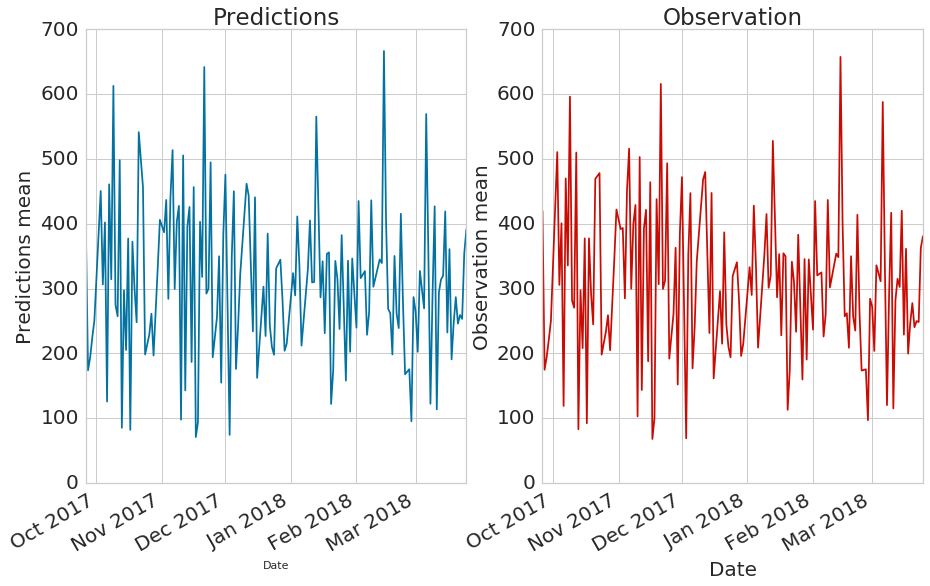

In [106]:

t1=RF_Pred_Data.pivot_table('Predictions', index='Date', aggfunc='mean')

#plt.subplot(122)
t2=RF_Pred_Data.pivot_table('Observation', index='Date', aggfunc='mean')
t1= t1.squeeze()
t2= t2.squeeze()
fig = plt.figure(figsize=(15,9))

ax1 = fig.add_subplot(121)
plt.ylabel('Predictions mean',size=20)
plt.rcParams['axes.labelsize'] =20
plt.title("Predictions",size=23)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
t1.plot()

ax2 = fig.add_subplot(122)

plt.ylabel('Observation mean',size=20)
plt.rcParams['axes.labelsize'] =20
plt.title("Observation",size=23)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
t2.plot(color='r')
plt.savefig('Compare_Prediction_and_Observation.png')


# Predicted and observed using RF

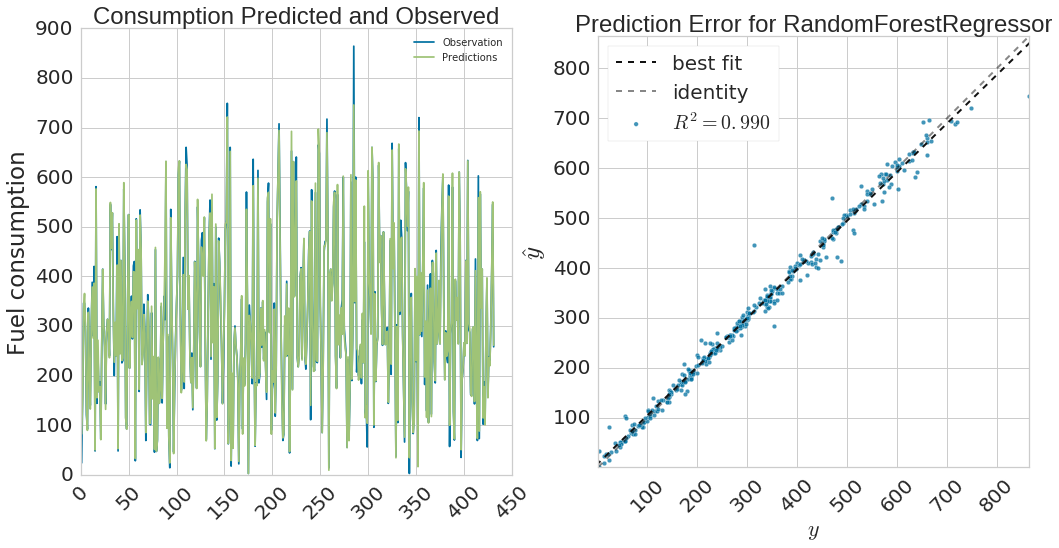

In [107]:
from yellowbrick.regressor import PredictionError
#plt.figure(figsize=(17,8))
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(121)
#plt.subplot(1,2,1)
plt.plot(RF_Pred_Data['Observation'])
plt.plot(RF_Pred_Data['Predictions'])
plt.ylabel('Fuel consumption',size=23)
#plt.xlabel('Observation',size=20)
plt.title('Consumption Predicted and Observed',size=24)

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
plt.legend()

#plt.subplot(1,2,2)
ax = fig.add_subplot(122)
RF= RandomForestRegressor(bootstrap=False,max_depth=40, max_features='sqrt',
                              min_samples_leaf=1,
 min_samples_split=2, n_estimators= 340, random_state = 42)
ax.set_ylabel('Predicted', fontsize=25)
ax.set_xlabel('Actual', fontsize=22)
visualizer = PredictionError(RF,ax=ax)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

plt.rcParams['axes.titlesize'] = 24
# plt.rcParams['xtick.labelsize'] = 23
# plt.rcParams['ytick.labelsize'] = 23
plt.rcParams['legend.fontsize']=20
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
g = visualizer.poof()
plt.savefig('RF_Pred_vs_Obs_and_Prediction_Error.png')

In [ ]:
# Load the data
# df = load_data('concrete')
# feature_names = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
# target_name = 'strength'
# # Get the X and y data from the DataFrame
# X = df[feature_names].as_matrix()
# y = df[target_name].as_matrix()
# # Create the train and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Instantiate the linear model and visualizer
from yellowbrick.regressor import PredictionError
RF= RandomForestRegressor(bootstrap=False,max_depth=40, max_features='sqrt',
                              min_samples_leaf=1,
 min_samples_split=2, n_estimators= 340, random_state = 42)
visualizer = PredictionError(RF)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

# Predicted and observed using GB

In [108]:
clus=Clusters['Cluster'][l].values
date=list(Clusters['EFFECTIVE DATE OF VISIT'][l].values)
#Clusters['DATE DE VISITE PRECEDENTE']
pred=list(GB_predictions)
obs=list(y_test)
#date=Clusters['DATE EFFECTIVE DE LA VISITE'][l].values
GB_Predict_Data = pd.DataFrame(
    {'Cluster': clus,
     'Predictions': pred,
     'Observation': obs,
     'Date':date
    })
GB_Pred_Data=GB_Predict_Data.sort_index()
GB_Pred_Data.head()

Cluster       Date  Observation  Predictions
0  YAGOUA 2017-09-30        143.0   145.106762
1  MAKARY 2017-11-20         24.0    19.325118
2  YAGOUA 2017-10-03        157.3   168.794733
3  MOKOLO 2017-11-27        346.0   331.520581
4  MAKARY 2018-01-11        345.6   347.751641

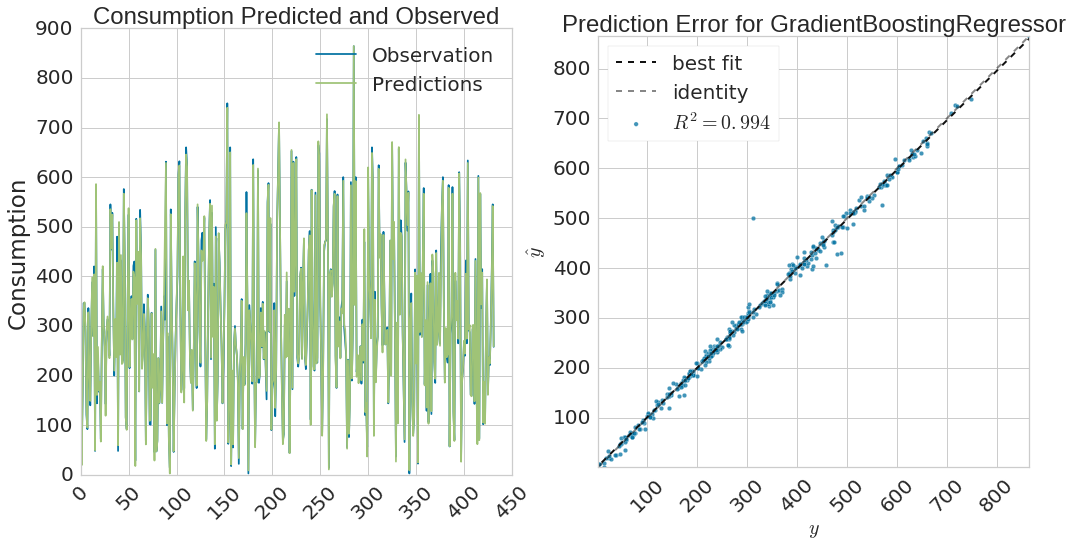

In [109]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)

plt.plot(GB_Pred_Data['Observation'])
plt.plot(GB_Pred_Data['Predictions'])
plt.ylabel('Consumption',size=23)
#plt.xlabel('Observation',size=20)
plt.title('Consumption Predicted and Observed',size=24)

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
plt.legend()

plt.subplot(1,2,2)

GB =GradientBoostingRegressor(max_depth=2,min_samples_leaf=3,n_estimators=600,random_state = 42)
visualizer = PredictionError(GB)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.rcParams['axes.titlesize'] = 24      
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
#pyplot.legend(loc=2, fontsize = 'medium')
plt.rcParams['legend.fontsize']=20
# plt.rcParams['ytick.labelsize'] = 20
g = visualizer.poof()
plt.savefig('GB_Pred_vs_Obs_and_Prediction_Error.png')

# Predicted and observed using MLP

In [110]:
clus=Clusters['Cluster'][l].values
date=list(Clusters['EFFECTIVE DATE OF VISIT'][l].values)
#Clusters['DATE DE VISITE PRECEDENTE']
pred=list(MLP_predictions)
obs=list(y_test)
#date=Clusters['DATE EFFECTIVE DE LA VISITE'][l].values
MLP_Predict_Data = pd.DataFrame(
    {'Cluster': clus,
     'Predictions': pred,
     'Observation': obs,
     'Date':date
    })
MLP_Pred_Data=MLP_Predict_Data.sort_index()
MLP_Pred_Data.head()

Cluster       Date  Observation  Predictions
0  YAGOUA 2017-09-30        143.0   147.596031
1  MAKARY 2017-11-20         24.0    45.827464
2  YAGOUA 2017-10-03        157.3   156.496534
3  MOKOLO 2017-11-27        346.0   315.539245
4  MAKARY 2018-01-11        345.6   375.806338

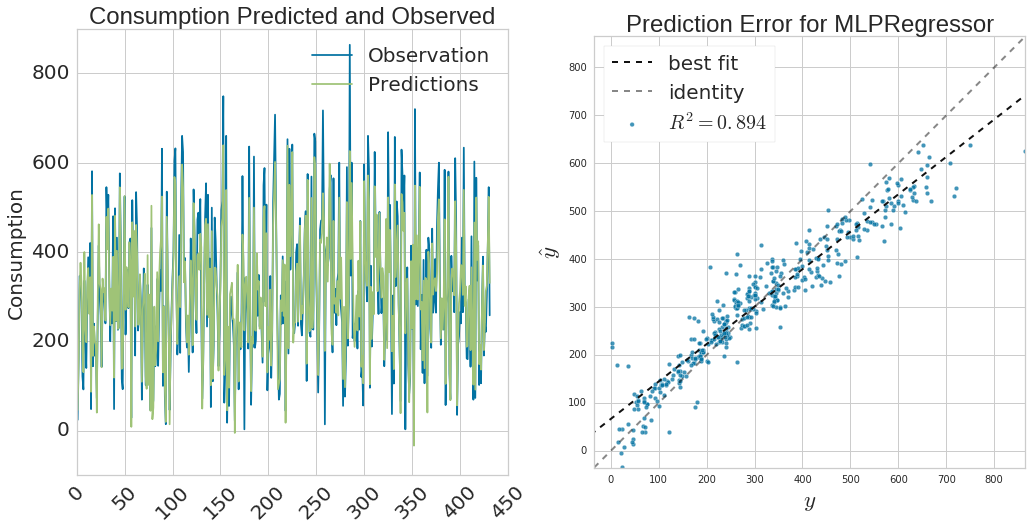

In [111]:
#plt.figure(figsize=(10,8))
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)


plt.plot(MLP_Pred_Data['Observation'])
plt.plot(MLP_Pred_Data['Predictions'])
plt.ylabel('Consumption',size=20)
#plt.xlabel('Observation',size=20)
plt.title('Consumption Predicted and Observed',size=24)
plt.rcParams['axes.labelsize'] = 23
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
plt.legend()


plt.subplot(1,2,2)

GB =GradientBoostingRegressor(max_depth=2,min_samples_leaf=3,n_estimators=600,random_state = 42)
visualizer = PredictionError(MLP)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize']=20
g = visualizer.poof()
plt.savefig('MLP_Pred_vs_Obs_and_Prediction_Error.png')
#plt.savefig('MLP_Pred_vs_Obs.png')

In [112]:
RandomForestRegressor?

# Predicted and observed using Lossa

In [113]:
clus=Clusters['Cluster'][l].values
date=list(Clusters['EFFECTIVE DATE OF VISIT'][l].values)
#Clusters['DATE DE VISITE PRECEDENTE']
pred=list(las_predictions)
obs=list(y_test)
#date=Clusters['DATE EFFECTIVE DE LA VISITE'][l].values
las_Predict_Data = pd.DataFrame(
    {'Cluster': clus,
     'Predictions': pred,
     'Observation': obs,
     'Date':date
    })
las_Pred_Data=las_Predict_Data.sort_index()
las_Pred_Data.head()

Cluster       Date  Observation  Predictions
0  YAGOUA 2017-09-30        143.0    89.542357
1  MAKARY 2017-11-20         24.0   -71.360188
2  YAGOUA 2017-10-03        157.3   104.812049
3  MOKOLO 2017-11-27        346.0   327.805202
4  MAKARY 2018-01-11        345.6   356.731227

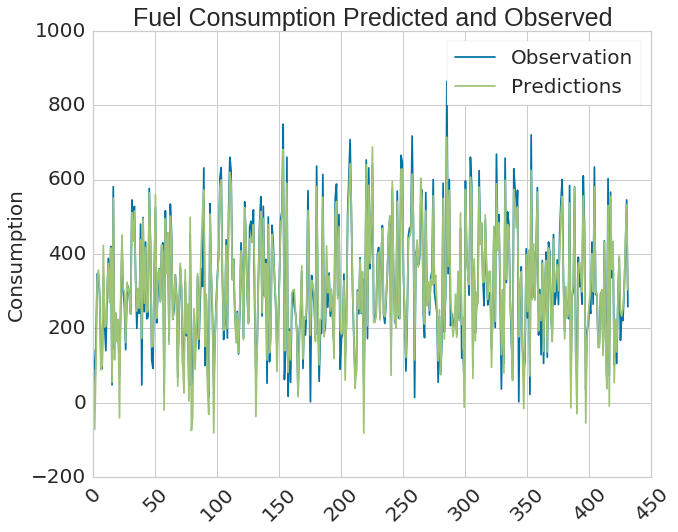

In [114]:
plt.figure(figsize=(10,8))
#plt.rcParams['font.size'] = 50
plt.plot(las_Pred_Data['Observation'])
plt.plot(las_Pred_Data['Predictions'])
plt.ylabel('Consumption',size=20)
#plt.xlabel('Observation',size=20)
plt.title('Fuel Consumption Predicted and Observed',size=25)
#plt.legend(loc='up right',fontsize=100)
plt.rcParams['axes.labelsize'] = 23
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
plt.rcParams['legend.frameon'] =True
plt.legend()
plt.savefig('las_Pred_vs_Obs.png')

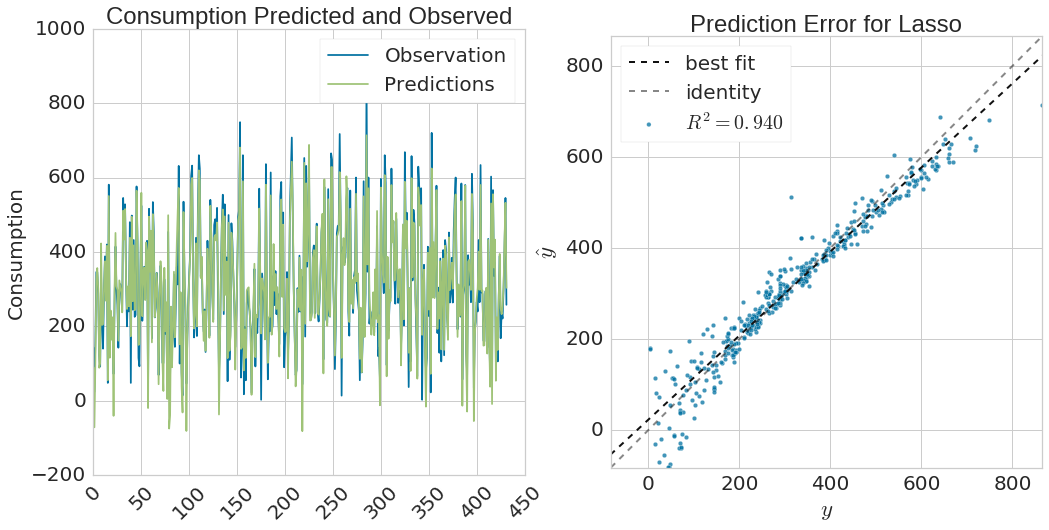

In [115]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)


plt.plot(las_Pred_Data['Observation'])
plt.plot(las_Pred_Data['Predictions'])
plt.ylabel('Consumption',size=20)
#plt.xlabel('Observation',size=20)
plt.title('Consumption Predicted and Observed',size=24)
plt.rcParams['axes.labelsize'] = 23
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=None)
plt.legend()


plt.subplot(1,2,2)

las =Lasso(alpha=0.1,max_iter=600,tol=0.01,random_state = 42)
visualizer = PredictionError(las)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['legend.fontsize']=20
g = visualizer.poof()
plt.savefig('Lasso_Pred_vs_Obs_and_Prediction_Error.png')

AttributeError: 'AxesSubplot' object has no attribute 'set_facecolor'

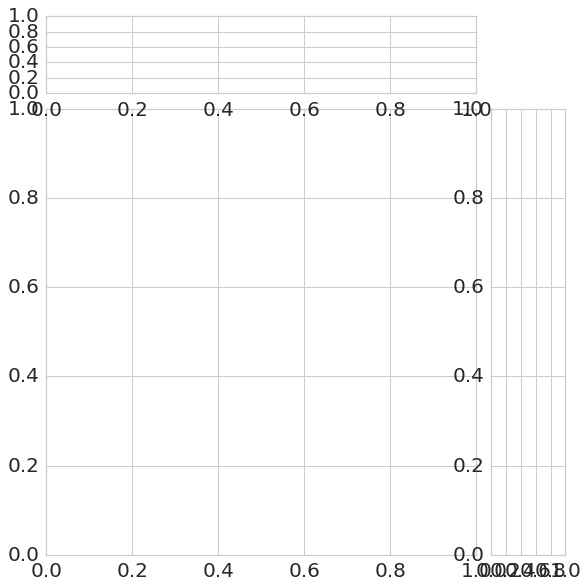

In [120]:
from yellowbrick.features import JointPlotVisualizer

plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
visualizer = JointPlotVisualizer(feature='Observation', target='Predictions')
visualizer.fit(RF_Pred_Data['Observation'],RF_Pred_Data['Predictions'])
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)

visualizer.poof()

In [117]:
#plt.rcParams?

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GradientBoostingRegressor?

In [122]:
XX_train=X_train
XX_test=X_test
yy_train=y_train
yy_test=y_test

# Residuals Plot
* Random Forest Residual plot

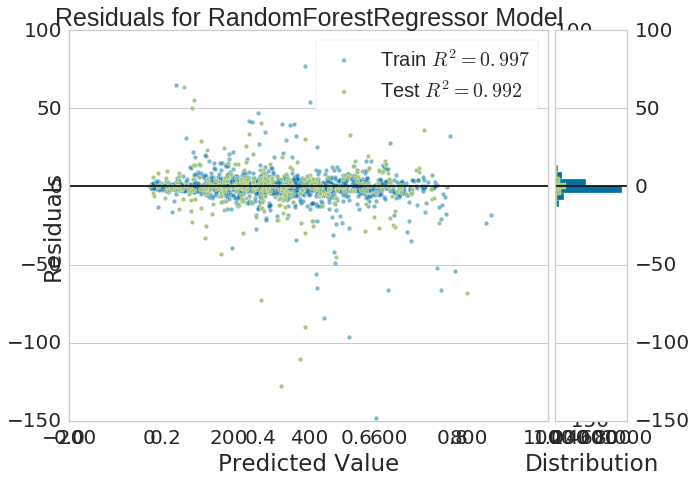

In [123]:
#from yellowbrick.regressor import ResidualsPlot
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import train_test_split
# plt.rcParams['figure.figsize'] = (10, 7)
# plt.rcParams['axes.labelsize'] = 23
# plt.rcParams['xtick.labelsize'] = 18
# plt.rcParams['ytick.labelsize'] = 18
# plt.rcParams['axes.titlesize'] = 24
#plt.rcParams['legend.fontsize']=20


plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['axes.labelsize'] = 23
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['legend.fontsize']=20

#plt.xticks(fontsize=20, rotation=45)
visualizer = ResidualsPlot(RandomForestRegressor(bootstrap=False,max_depth=None, max_features='sqrt'
                                                 , min_samples_leaf=1,
 min_samples_split=2, n_estimators= 120, random_state = 42))

visualizer = ResidualsPlot(RandomForestRegressor(random_state = 42))

visualizer.fit(XX_train, yy_train)
visualizer.score(XX_test, yy_test)
visualizer.poof()
plt.savefig('RF_Residuals.png')

In this plot each point is one day, where the prediction made by the model is on the x-axis, and the accuracy of the prediction is on the y-axis. The distance from the line at 0 is how bad the prediction was for that value.
Since…
Residual = Observed – Predicted
…positive values for the residual (on the y-axis) mean the prediction was too low, and negative values mean the prediction was too high; 0 means the guess was exactly correct.

* Gradient Boosting Residual plot

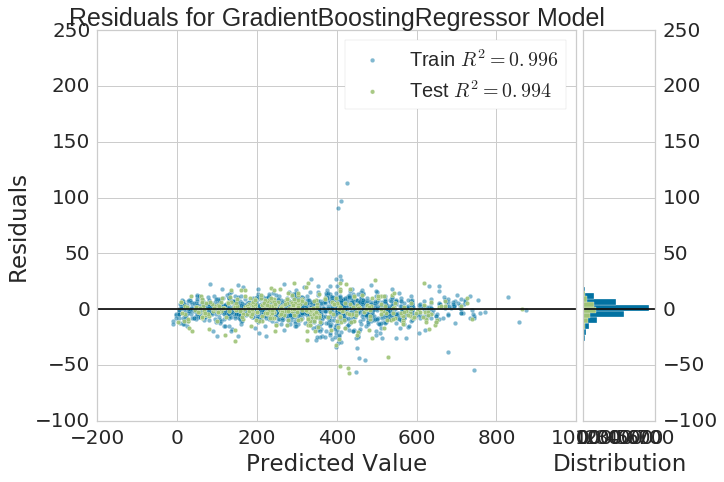

--This code take 0.017348019282023112 minute(s) to run--


In [124]:
import time
start_time = time.time()
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['axes.labelsize'] = 23
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['legend.fontsize']=20
visualizer = ResidualsPlot(GradientBoostingRegressor(max_depth=2,min_samples_leaf=3,
                                                     n_estimators=600,random_state = 42))
visualizer.fit(XX_train, yy_train)
visualizer.score(XX_test, yy_test)
visualizer.poof()
plt.savefig('GB_Residuals.png')
print("--This code take %s minute(s) to run--" % ((time.time() - start_time)/60))

















* Neural Network Residual

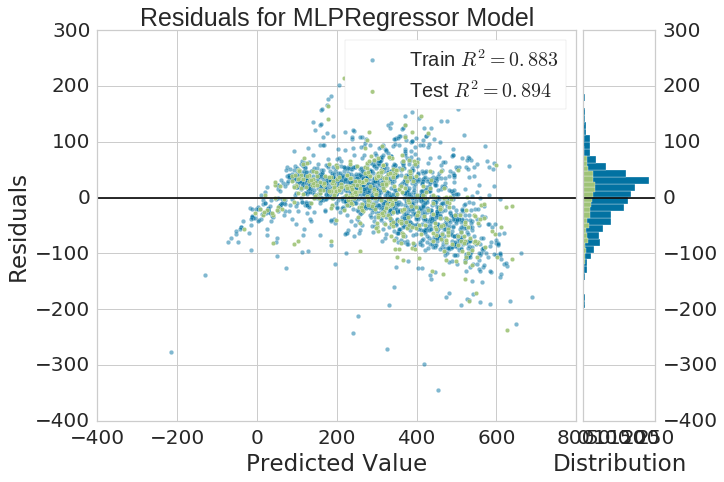

--This code take 0.016011397043863933 minute(s) to run--


In [125]:
import time
start_time = time.time()
from yellowbrick.regressor import ResidualsPlot
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['axes.labelsize'] = 23
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['legend.fontsize']=20
visualizer = ResidualsPlot(MLPRegressor(activation='identity',alpha=0.0001,early_stopping=False,hidden_layer_sizes=1,
                 learning_rate='invscaling',
 learning_rate_init=0.01,max_iter=500,random_state = 42))
visualizer.fit(XX_train, yy_train)
visualizer.score(XX_test, yy_test)

for label in visualizer.ax.texts:
    label.set_size(40)

visualizer.poof()
print("--This code take %s minute(s) to run--" % ((time.time() - start_time)/60))
plt.savefig('MLP_Residuals.png')

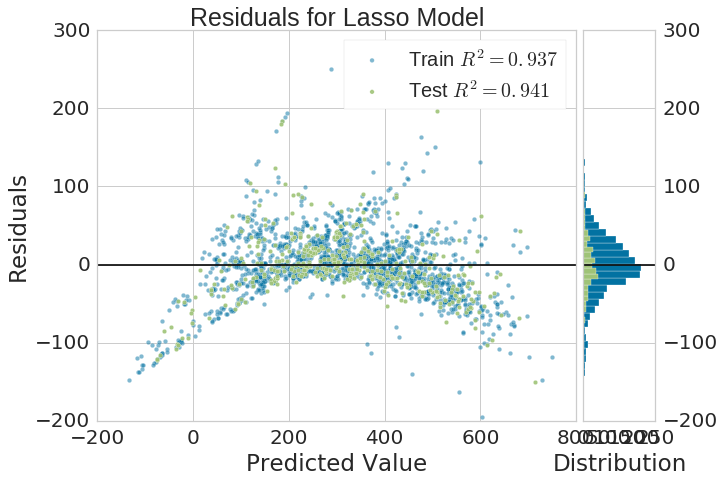

--This code take 0.00924665927886963 minute(s) to run--


In [126]:
import time
start_time = time.time()
from yellowbrick.regressor import ResidualsPlot
# from sklearn.neural_network import MLPRegressor
#from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['axes.labelsize'] = 23
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25
visualizer = ResidualsPlot(Lasso())
visualizer.fit(XX_train, yy_train)
visualizer.score(XX_test, yy_test)

for label in visualizer.ax.texts:
    label.set_size(40)

visualizer.poof()
print("--This code take %s minute(s) to run--" % ((time.time() - start_time)/60))
plt.savefig('Lasso_Residuals.png')

# Learning Curve

We use the visualization to typically see the following:
* How much the estimator benefits from more data 
* If the estimator is more sensitive to error due to variance vs. error due to bias.

* Learning Curve with Random Forest

In [ ]:

import time
start_time = time.time()


from yellowbrick.model_selection import LearningCurve
from sklearn.ensemble import RandomForestRegressor


plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 23
sizes = np.linspace(0.3, 1.0, 10)

# Create the learning curve visualizer, fit and poof
viz = LearningCurve(RandomForestRegressor(), train_sizes=sizes, scoring='r2')
viz.fit(X, Y)
viz.poof()



print("--This code take %s minute(s) to run--" % ((time.time() - start_time)/60))
plt.savefig('Distribution_of_Fuel_per_period.png')

# From the learning curve we understand that the models would benefit from more data since the between 800 and 1600 instances is decreasing

* Learning Curve with Gradient Boosting

In [ ]:
import time
start_time = time.time()


from yellowbrick.model_selection import LearningCurve
from sklearn.ensemble import GradientBoostingRegressor
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 23 
sizes = np.linspace(0.3, 1.0, 10)

# Create the learning curve visualizer, fit and poof
viz = LearningCurve(GradientBoostingRegressor(), train_sizes=sizes, scoring='r2')
viz.fit(X, Y)
viz.poof()



print("--This code take %s minute(s) to run--" % ((time.time() - start_time)/60))

In [ ]:
import time
start_time = time.time()

#from sklearn.neural_network import MLPRegressor
from yellowbrick.model_selection import LearningCurve

plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 23
sizes = np.linspace(0.3, 1.0, 10)

# Create the learning curve visualizer, fit and poof
viz = LearningCurve(MLPRegressor(), train_sizes=sizes, scoring='r2')
viz.fit(X, Y)
viz.poof()



print("--This code take %s minute(s) to run--" % ((time.time() - start_time)/60))

In [ ]:
import time
start_time = time.time()

#from sklearn.neural_network import MLPRegressor
from yellowbrick.model_selection import LearningCurve

plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 23

sizes = np.linspace(0.3, 1.0, 10)

# Create the learning curve visualizer, fit and poof
viz = LearningCurve(Lasso(), train_sizes=sizes, scoring='r2')
viz.fit(X, Y)
viz.poof()



print("--This code take %s minute(s) to run--" % ((time.time() - start_time)/60))

In [ ]:
Errors=Pred_Data['Predictions']-Pred_Data['Observation']
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 23
plt.plot(Errors)

In [ ]:
from yellowbrick.regressor import PredictionError
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 23
model = PredictionError(RandomForestRegressor())
model.fit(XX_train, yy_train)
model.score(XX_test, yy_test)
model.poof()

In [ ]:

from yellowbrick.regressor import PredictionError
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 23
model = PredictionError(GradientBoostingRegressor())
model.fit(XX_train, yy_train)
model.score(XX_test, yy_test)
model.poof()

In [ ]:
from yellowbrick.regressor import PredictionError
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 23
model = PredictionError(MLPRegressor())
model.fit(XX_train, yy_train)
model.score(XX_test, yy_test)
model.poof()

In [ ]:
from yellowbrick.regressor import PredictionError
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 23
model = PredictionError(Lasso())
model.fit(XX_train, yy_train)
model.score(XX_test, yy_test)
model.poof()

In [ ]:
from sklearn.model_selection import KFold
X=Data
Y=features['CONSUMPTION HIS']
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]
K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)

for alpha in alphas:
    train_errors = []
    validation_errors = []
    for train_index, val_index in kf.split(X, Y):
        
        # split data
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = Y[train_index], Y[val_index]

        # instantiate model
        lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=77)
        
        #calculate errors
        train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, lasso)
        
        # append to appropriate list
        train_errors.append(train_error)
        validation_errors.append(val_error)
    
    # generate report
    print('alpha: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
          format(alpha,
                 round(np.mean(train_errors),4),
                 round(np.mean(validation_errors),4)))